# Machine Learning for Time Series Data in Python

Time series data is ubiquitous. Whether it be stock market fluctuations, sensor data recording climate change, or activity in the brain, any signal that changes over time can be described as a time series. Machine learning has emerged as a powerful method for leveraging complexity in data in order to generate predictions and insights into the problem one is trying to solve. This course is an intersection between these two worlds of machine learning and time series data, and covers feature engineering, spectograms, and other advanced techniques in order to classify heartbeat sounds and predict stock prices.

## Table of Contents

- [Introduction](#intro)
- [ML Basics](#ml)
- [Datasets for the course](#data)
- [Classication and feature engineering](#class)
- [Predicting data over time](#pred)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/dc30/"

---
<a id='intro'></a>

<img src="images/ts4_001.png" alt="" style="width: 800px;"/>

<img src="images/ts4_002.png" alt="" style="width: 800px;"/>

<img src="images/ts4_003.png" alt="" style="width: 800px;"/>

<img src="images/ts4_004.png" alt="" style="width: 800px;"/>

## Plotting a time series (I)

In this exercise, you'll practice plotting the values of two time series without the time component.

Two DataFrames, `data` and `data2` are available in your workspace.

Unless otherwise noted, assume that all required packages are loaded with their common aliases throughout this course.

In [2]:
data = pd.read_csv(path+'data.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data.head()

,data_values
0,214.009998
1,214.379993
2,210.969995
3,210.580000
4,211.980005


In [3]:
data2 = pd.read_csv(path+'data2.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data2.head()

,data_values
0,-0.006928
1,-0.007929
2,-0.008900
3,-0.009815
4,-0.010653


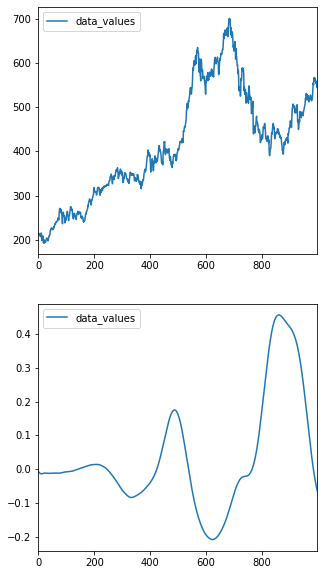

In [4]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y='data_values', ax=axs[0])
data2.iloc[:1000].plot(y='data_values', ax=axs[1])
plt.show();

## Plotting a time series (II)

You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called "time"). Let's see if this gives you some more context for understanding each time series data.

In [5]:
data = pd.read_csv(path+'data_t.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data.head()

,time,data_values
0,2010-01-04,214.009998
1,2010-01-05,214.379993
2,2010-01-06,210.969995
3,2010-01-07,210.580000
4,2010-01-08,211.980005


In [6]:
data2 = pd.read_csv(path+'data2_t.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data2.head()

,data_values,time
0,-0.006928,0.000000
1,-0.007929,0.000045
2,-0.008900,0.000091
3,-0.009815,0.000136
4,-0.010653,0.000181


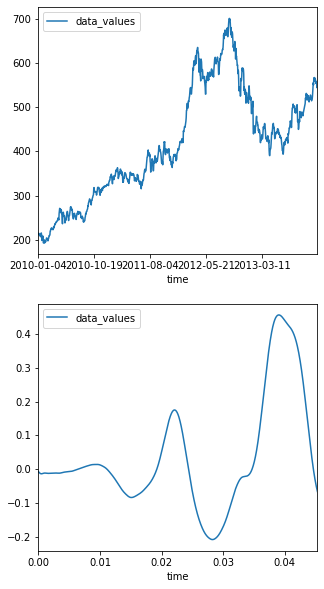

In [7]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(x='time', y='data_values', ax=axs[0])
data2.iloc[:1000].plot(x='time', y='data_values', ax=axs[1])
plt.show();

As you can now see, each time series has a very different sampling frequency (the amount of time between samples). The first is daily stock market data, and the second is an audio waveform.

---
<a id='ml'></a>

## ML Basics

<img src="images/ts4_005.png" alt="" style="width: 800px;"/>

<img src="images/ts4_006.png" alt="" style="width: 800px;"/>

## Fitting a simple model: classification
In this exercise, you'll use the iris dataset (representing petal characteristics of a number of flowers) to practice using the scikit-learn API to fit a classification model. You can see a sample plot of the data to the right.

In [8]:
data = pd.read_csv(path+'iris.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
from sklearn.svm import LinearSVC

# Construct data for the model
X = data[['petal length (cm)', 'petal width (cm)']]
y = data[['target']]

# Fit the model
model = LinearSVC()
model.fit(X, y)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

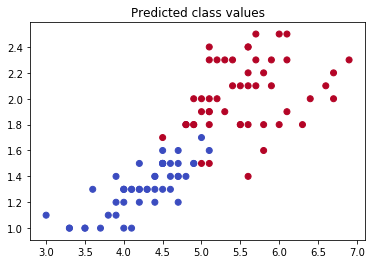

In [10]:
plt.scatter(X['petal length (cm)'], X['petal width (cm)'],
            c=y['target'], cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show;

## Predicting using a classification model

Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some newly-collected flowers.

Information about petal width and length for several new flowers is stored in the variable `targets`. Using the classifier you fit, you'll predict the type of each flower.

In [11]:
targets = pd.read_csv(path+'iris_test.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
targets.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
116,6.5,3.0,5.5,1.8,2
142,5.8,2.7,5.1,1.9,2
148,6.2,3.4,5.4,2.3,2
67,5.8,2.7,4.1,1.0,1
133,6.3,2.8,5.1,1.5,2


[2 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 2 1 2 2]


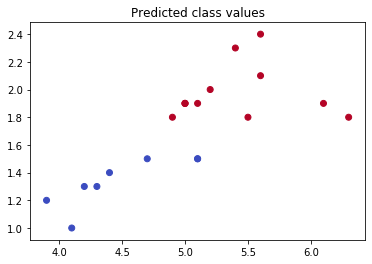

In [12]:
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show;

Note that the output of your predictions are all integers, representing that datapoint's predicted class.

## Fitting a simple model: regression

In this exercise, you'll practice fitting a regression model using data from the Boston housing market. A DataFrame called `boston` is available in your workspace. It contains many variables of data (stored as columns). Can you find a relationship between the following two variables?

- "AGE": proportion of owner-occupied units built prior to 1940
- "RM" : average number of rooms per dwelling

Todo:
- Prepare X and y DataFrames using the data in boston.
- X should be the proportion of houses built prior to 1940, y average number of rooms per dwelling.
- Fit a regression model that uses these variables (remember to shape the variables correctly!).
- Don't forget that each variable must be the correct shape for scikit-learn to use it!

In [13]:
boston = pd.read_csv(path+'boston.csv', 
            index_col='Unnamed: 0',
            parse_dates=True)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
from sklearn import linear_model

# Prepare input and output DataFrames
X = boston[['AGE']]
y = boston[['RM']]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In regression, the output of your model is a continuous array of numbers, not class identity.

## Predicting using a regression model

Now that you've fit a model with the Boston housing data, lets see what predictions it generates on some new data. You can investigate the underlying relationship that the model has found between inputs and outputs by feeding in a range of numbers as inputs and seeing what the model predicts for each input.

A 1-D array `new_inputs` consisting of 100 "new" values for "AGE" (proportion of owner-occupied units built prior to 1940) is available in your workspace along with the model you fit in the previous exercise.

In [15]:
new_inputs = np.array([   2.9       ,    3.88080808,    4.86161616,    5.84242424,
          6.82323232,    7.8040404 ,    8.78484848,    9.76565657,
         10.74646465,   11.72727273,   12.70808081,   13.68888889,
         14.66969697,   15.65050505,   16.63131313,   17.61212121,
         18.59292929,   19.57373737,   20.55454545,   21.53535354,
         22.51616162,   23.4969697 ,   24.47777778,   25.45858586,
         26.43939394,   27.42020202,   28.4010101 ,   29.38181818,
         30.36262626,   31.34343434,   32.32424242,   33.30505051,
         34.28585859,   35.26666667,   36.24747475,   37.22828283,
         38.20909091,   39.18989899,   40.17070707,   41.15151515,
         42.13232323,   43.11313131,   44.09393939,   45.07474747,
         46.05555556,   47.03636364,   48.01717172,   48.9979798 ,
         49.97878788,   50.95959596,   51.94040404,   52.92121212,
         53.9020202 ,   54.88282828,   55.86363636,   56.84444444,
         57.82525253,   58.80606061,   59.78686869,   60.76767677,
         61.74848485,   62.72929293,   63.71010101,   64.69090909,
         65.67171717,   66.65252525,   67.63333333,   68.61414141,
         69.59494949,   70.57575758,   71.55656566,   72.53737374,
         73.51818182,   74.4989899 ,   75.47979798,   76.46060606,
         77.44141414,   78.42222222,   79.4030303 ,   80.38383838,
         81.36464646,   82.34545455,   83.32626263,   84.30707071,
         85.28787879,   86.26868687,   87.24949495,   88.23030303,
         89.21111111,   90.19191919,   91.17272727,   92.15353535,
         93.13434343,   94.11515152,   95.0959596 ,   96.07676768,
         97.05757576,   98.03838384,   99.01919192,  100.        ])

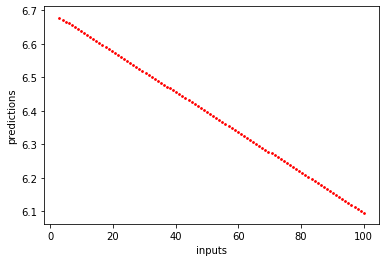

In [16]:
# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs.reshape([-1,1]))

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show();

Here the red line shows the relationship that your model found. As the proportion of pre-1940s houses gets larger, the average number of rooms gets slightly lower.

---
<a id='data'></a>

## Datasets for the course

## Inspecting the classification data

In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.

The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.

As you have labeled data, this dataset is ideal for classification. In fact, it was originally offered as a part of a public [Kaggle competition](https://www.kaggle.com/kinguistics/heartbeat-sounds).

In [17]:
#!pip install librosa

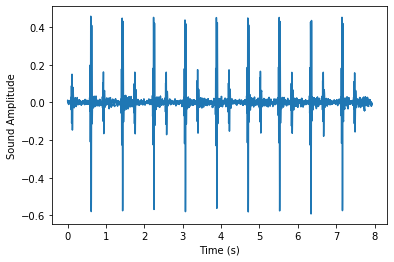

In [18]:
import librosa as lr
from glob import glob

# List all the wav files in the folder
data_dir = path + 'heartbeat-sounds/set_a'
audio_files = glob(data_dir + '/*.wav')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show();

There are several seconds of heartbeat sounds in here, though note that most of this time is silence. A common procedure in machine learning is to separate the datapoints with lots of stuff happening from the ones that don't.

## Inspecting the regression data

The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a public [Kaggle competition](https://www.kaggle.com/dgawlik/nyse).

In this exercise, you'll plot the time series for a number of companies to get an understanding of how they are (or aren't) related to one another.

                  AAPL  FB       NFLX          V        XOM
time                                                       
2010-01-04  214.009998 NaN  53.479999  88.139999  69.150002
2010-01-05  214.379993 NaN  51.510001  87.129997  69.419998
2010-01-06  210.969995 NaN  53.319999  85.959999  70.019997
2010-01-07  210.580000 NaN  52.400001  86.760002  69.800003
2010-01-08  211.980005 NaN  53.300002  87.000000  69.519997


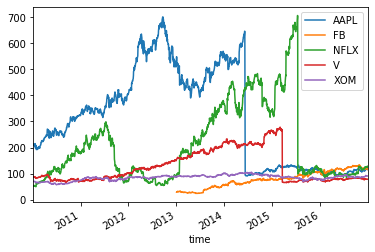

In [19]:
# Read in the data
data = pd.read_csv(path+'prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data.columns:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show();

Note that each company's value is sometimes correlated with others, and sometimes not. Also note there are a lot of 'jumps' in there - what effect do you think these jumps would have on a predictive model?

---
<a id='class'></a>

## Classication and feature engineering

<img src="images/ts4_007.png" alt="" style="width: 800px;"/>

<img src="images/ts4_008.png" alt="" style="width: 800px;"/>

<img src="images/ts4_009.png" alt="" style="width: 800px;"/>

<img src="images/ts4_010.png" alt="" style="width: 800px;"/>

<img src="images/ts4_011.png" alt="" style="width: 800px;"/>

<img src="images/ts4_012.png" alt="" style="width: 800px;"/>

<img src="images/ts4_013.png" alt="" style="width: 800px;"/>

## Many repetitions of sounds

In this exercise, you'll start with perhaps `the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result`.

You'll use the heartbeat data described in the last chapter. Some recordings are normal heartbeat activity, while others are abnormal activity. Let's see if you can spot the difference.

Two DataFrames, normal and abnormal, each with the shape of (n_times_points, n_audio_files) containing the audio for several heartbeats are available in your workspace. Also, the sampling frequency is loaded into a variable called sfreq. A convenience plotting function show_plot_and_make_titles() is also available in your workspace.

- First, create the time array for these audio files (all audios are the same length).
- Then, stack the values of the two DataFrames together (normal and abnormal, in that order) so that you have a single array of shape (n_audio_files, n_times_points).
- Finally, use the code provided to loop through each list item / axis, and plot the audio over time in the corresponding axis object.
- You'll plot normal heartbeats in the left column, and abnormal ones in the right column

In [20]:
normal = pd.read_csv(path+'normal.csv', 
            index_col='time',
            parse_dates=True)
normal.head()

,3,4,6
time,,,
0.000000,-0.000995,0.000281,0.002953
0.000454,-0.003381,0.000381,0.003034
0.000907,-0.000948,0.000063,0.000292
0.001361,-0.000766,0.000026,-0.005916
0.001814,0.000469,-0.000432,-0.005307


In [21]:
abnormal = pd.read_csv(path+'abnormal.csv', 
            index_col='time',
            parse_dates=True)
abnormal.head()

,0,1,2
time,,,
0.000000,-0.024684,-0.024507,0.008254
0.000454,-0.060429,-0.047736,0.014809
0.000907,-0.070080,-0.039938,0.010475
0.001361,-0.084212,-0.041199,0.010272
0.001814,-0.085111,-0.036050,0.008580


In [22]:
sfreq = 2205

In [23]:
#import inspect
#source = inspect.getsource(show_plot_and_make_titles)

def show_plot_and_make_titles():
    axs[0, 0].set(title="Normal Heartbeats")
    axs[0, 1].set(title="Abnormal Heartbeats")
    plt.tight_layout()
    plt.show();  

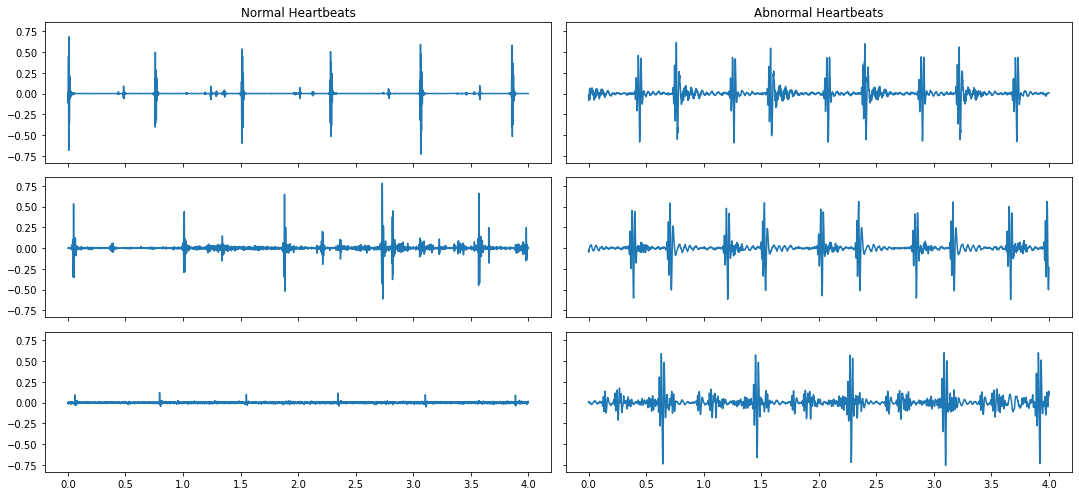

In [24]:
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(normal.shape[0]) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

As you can see there is a lot of variability in the raw data, let's see if you can average out some of that noise to notice a difference.

## Invariance in time

While you should always start by visualizing your raw data, this is often uninformative when it comes to discriminating between two classes of data points. Data is usually noisy or exhibits complex patterns that aren't discoverable by the naked eye.

Another common technique to find simple differences between two sets of data is to average across multiple instances of the same class. This may remove noise and reveal underlying patterns (or, it may not).

In this exercise, you'll average across many instances of each class of heartbeat sound.

The two DataFrames (normal and abnormal) and the time array (time) from the previous exercise are available in your workspace.

- Average across the audio files contained in normal and abnormal, leaving the time dimension.
- Visualize these averages over time.

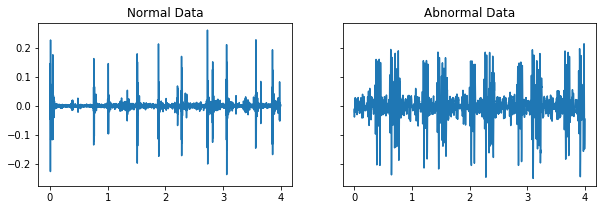

In [25]:
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show();

Do you see a noticeable difference between the two? Maybe, but it's quite noisy. Let's see how you can dig into the data a bit further.

## Build a classification model

While eye-balling differences is a useful way to gain an intuition for the data, let's see if you can operationalize things with a model. In this exercise, you will use each repetition as a datapoint, and each moment in time as a feature to fit a classifier that attempts to predict abnormal vs. normal heartbeats using only the raw data.

We've split the two DataFrames (normal and abnormal) into X_train, X_test, y_train, and y_test.

- Create an instance of the Linear SVC model and fit the model using the training data.
- Use the testing data to generate predictions with the model.
- Score the model using the provided code.

In [26]:
a = abnormal.T
a['target'] = 1
a.head()

time,0.0,0.000453514739229025,0.00090702947845805,0.0013605442176870747,0.0018140589569161,0.002267573696145125,0.002721088435374149,0.0031746031746031746,0.0036281179138322,0.004081632653061225,...,3.9959183673469383,3.996371882086168,3.996825396825397,3.9972789115646257,3.9977324263038554,3.9981859410430842,3.9986394557823126,3.999092970521542,3.9995464852607716,target
0,-0.024684,-0.060429,-0.070080,-0.084212,-0.085111,-0.078485,-0.059435,-0.037479,-0.018771,-0.010869,...,0.006911,0.008975,0.010534,0.010939,0.010513,0.009675,0.007957,0.006445,0.006529,1
1,-0.024507,-0.047736,-0.039938,-0.041199,-0.036050,-0.034257,-0.029402,-0.026873,-0.024032,-0.022241,...,-0.496709,-0.485694,-0.466190,-0.437779,-0.401539,-0.360107,-0.317170,-0.275164,-0.233864,1
2,0.008254,0.014809,0.010475,0.010272,0.008580,0.008634,0.007643,0.008110,0.008904,0.009059,...,0.103080,0.117393,0.128866,0.136350,0.138510,0.134382,0.124178,0.109530,0.090629,1


In [27]:
n = normal.T
n['target'] = 0
n.head()

time,0.0,0.000453514739229025,0.00090702947845805,0.0013605442176870747,0.0018140589569161,0.002267573696145125,0.002721088435374149,0.0031746031746031746,0.0036281179138322,0.004081632653061225,...,3.9959183673469383,3.996371882086168,3.996825396825397,3.9972789115646257,3.9977324263038554,3.9981859410430842,3.9986394557823126,3.999092970521542,3.9995464852607716,target
3,-0.000995,-0.003381,-0.000948,-0.000766,0.000469,0.001511,0.007789,-0.000887,-0.091828,-0.120524,...,0.000034,0.000192,0.000552,0.000232,-0.000089,-0.000112,-0.000233,-0.000103,-0.000367,0
4,0.000281,0.000381,0.000063,0.000026,-0.000432,0.000075,-0.001401,-0.002424,-0.002455,-0.003432,...,-0.010088,-0.006626,-0.004099,-0.002884,-0.005931,-0.004839,-0.000591,-0.001320,0.000652,0
6,0.002953,0.003034,0.000292,-0.005916,-0.005307,-0.003470,-0.010840,-0.010687,-0.016578,-0.014512,...,0.001349,-0.002345,-0.001517,0.004005,0.002474,0.004467,0.016809,0.008762,0.004442,0


In [28]:
audio = a.append(n)
audio.head()

time,0.0,0.000453514739229025,0.00090702947845805,0.0013605442176870747,0.0018140589569161,0.002267573696145125,0.002721088435374149,0.0031746031746031746,0.0036281179138322,0.004081632653061225,...,3.9959183673469383,3.996371882086168,3.996825396825397,3.9972789115646257,3.9977324263038554,3.9981859410430842,3.9986394557823126,3.999092970521542,3.9995464852607716,target
0,-0.024684,-0.060429,-0.070080,-0.084212,-0.085111,-0.078485,-0.059435,-0.037479,-0.018771,-0.010869,...,0.006911,0.008975,0.010534,0.010939,0.010513,0.009675,0.007957,0.006445,0.006529,1
1,-0.024507,-0.047736,-0.039938,-0.041199,-0.036050,-0.034257,-0.029402,-0.026873,-0.024032,-0.022241,...,-0.496709,-0.485694,-0.466190,-0.437779,-0.401539,-0.360107,-0.317170,-0.275164,-0.233864,1
2,0.008254,0.014809,0.010475,0.010272,0.008580,0.008634,0.007643,0.008110,0.008904,0.009059,...,0.103080,0.117393,0.128866,0.136350,0.138510,0.134382,0.124178,0.109530,0.090629,1
3,-0.000995,-0.003381,-0.000948,-0.000766,0.000469,0.001511,0.007789,-0.000887,-0.091828,-0.120524,...,0.000034,0.000192,0.000552,0.000232,-0.000089,-0.000112,-0.000233,-0.000103,-0.000367,0
4,0.000281,0.000381,0.000063,0.000026,-0.000432,0.000075,-0.001401,-0.002424,-0.002455,-0.003432,...,-0.010088,-0.006626,-0.004099,-0.002884,-0.005931,-0.004839,-0.000591,-0.001320,0.000652,0


In [29]:
#audio.drop(columns=['time'], inplace=True)
X = audio.iloc[:,:-1]
y = audio.iloc[:,-1]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
y_train.head()

6    0
2    1
4    0
3    0
Name: target, dtype: int64

In [32]:
X_train.head()

time,0.000000,0.000454,0.000907,0.001361,0.001814,0.002268,0.002721,0.003175,0.003628,0.004082,...,3.995465,3.995918,3.996372,3.996825,3.997279,3.997732,3.998186,3.998639,3.999093,3.999546
6,0.002953,0.003034,0.000292,-0.005916,-0.005307,-0.003470,-0.010840,-0.010687,-0.016578,-0.014512,...,-0.001623,0.001349,-0.002345,-0.001517,0.004005,0.002474,0.004467,0.016809,0.008762,0.004442
2,0.008254,0.014809,0.010475,0.010272,0.008580,0.008634,0.007643,0.008110,0.008904,0.009059,...,0.087628,0.103080,0.117393,0.128866,0.136350,0.138510,0.134382,0.124178,0.109530,0.090629
4,0.000281,0.000381,0.000063,0.000026,-0.000432,0.000075,-0.001401,-0.002424,-0.002455,-0.003432,...,-0.007169,-0.010088,-0.006626,-0.004099,-0.002884,-0.005931,-0.004839,-0.000591,-0.001320,0.000652
3,-0.000995,-0.003381,-0.000948,-0.000766,0.000469,0.001511,0.007789,-0.000887,-0.091828,-0.120524,...,-0.000034,0.000034,0.000192,0.000552,0.000232,-0.000089,-0.000112,-0.000233,-0.000103,-0.000367


In [33]:
from sklearn.svm import LinearSVC

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))

0.0


in course (on more samples): `0.555555555556`

Note that your predictions didn't do so well. That's because the features you're using as inputs to the model (raw data) aren't very good at differentiating classes. Next, you'll explore how to calculate some more complex features that may improve the results.

## Improving features for classification

<img src="images/ts4_014.png" alt="" style="width: 800px;"/>

<img src="images/ts4_015.png" alt="" style="width: 800px;"/>

<img src="images/ts4_016.png" alt="" style="width: 800px;"/>

<img src="images/ts4_017.png" alt="" style="width: 800px;"/>

<img src="images/ts4_018.png" alt="" style="width: 800px;"/>

<img src="images/ts4_019.png" alt="" style="width: 800px;"/>

<img src="images/ts4_020.png" alt="" style="width: 800px;"/>

<img src="images/ts4_021.png" alt="" style="width: 800px;"/>

<img src="images/ts4_022.png" alt="" style="width: 800px;"/>

<img src="images/ts4_023.png" alt="" style="width: 800px;"/>

<img src="images/ts4_024.png" alt="" style="width: 800px;"/>

<img src="images/ts4_025.png" alt="" style="width: 800px;"/>

<img src="images/ts4_026.png" alt="" style="width: 800px;"/>

<img src="images/ts4_027.png" alt="" style="width: 800px;"/>

## Calculating the envelope of sound
One of the ways you can improve the features available to your model is to remove some of the noise present in the data. In audio data, a common way to do this is to `smooth` the data and then `rectify` it so that the total amount of sound energy over time is more distinguishable. You'll do this in the current exercise.

A heartbeat file is available in the variable `audio`.

- Visualize the raw audio you'll use to calculate the envelope.

In [70]:
audio = pd.read_csv(path+'audio.csv',
                    header=None,
            index_col=0
            #parse_dates=True
                   )
audio.head()

,1
0,
0.000000,-0.024684
0.000454,-0.060429
0.000907,-0.070080
0.001361,-0.084212
0.001814,-0.085111


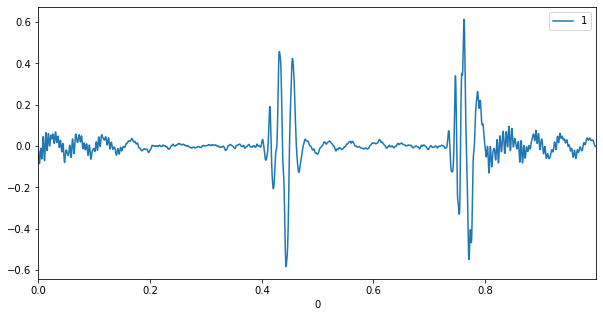

In [71]:
# Plot the raw data first
audio.plot(figsize=(10, 5))
plt.show();

- Rectify the audio.
- Plot the result.

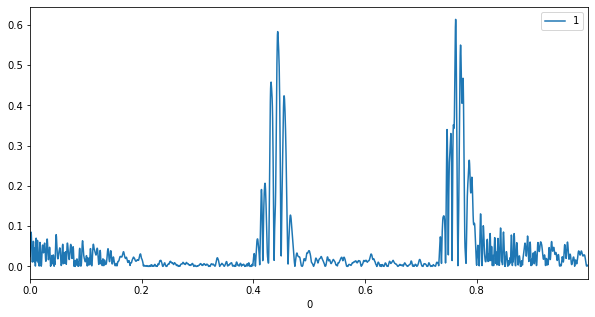

In [72]:
# Rectify the audio signal
audio_rectified = audio.apply(np.abs)

# Plot the result
audio_rectified.plot(figsize=(10, 5))
plt.show();

- Smooth the audio file by applying a rolling mean.
- Plot the result.

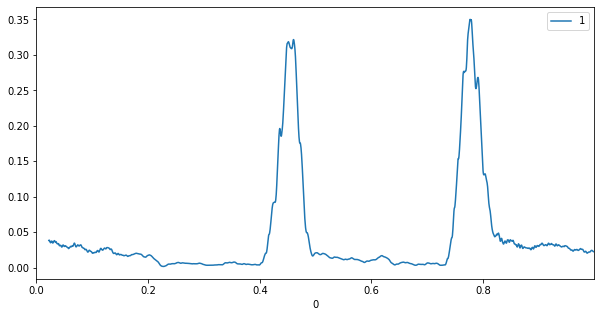

In [73]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show();

By calculating the envelope of each sound and smoothing it, you've eliminated much of the noise and have a cleaner signal to tell you when a heartbeat is happening.

## Calculating features from the envelope

Now that you've removed some of the noisier fluctuations in the audio, let's see if this improves your ability to classify.

`audio_rectified_smooth` from the previous exercise is available in your workspace.

- Calculate the mean, standard deviation, and maximum value for each heartbeat sound.
- Column stack these stats in the same order.
- Use cross-validation to fit a model on each CV iteration.

In [80]:
audio_rectified_smooth = pd.read_csv(path+'audio_rectified_smooth.csv',
                    index_col='time'
            #parse_dates=True
                   )
audio_rectified_smooth.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
time,,,,,,,,,,,,,,,,,,,,,
0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.001361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.001814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
labels = np.array(['murmur', 'murmur', 'murmur', 'normal', 'normal', 'murmur',
       'normal', 'normal', 'murmur', 'murmur', 'normal', 'murmur',
       'normal', 'murmur', 'murmur', 'normal', 'normal', 'normal',
       'normal', 'murmur', 'normal', 'normal', 'murmur', 'murmur',
       'normal', 'normal', 'normal', 'normal', 'murmur', 'murmur',
       'murmur', 'normal', 'normal', 'normal', 'normal', 'murmur',
       'murmur', 'murmur', 'normal', 'normal', 'normal', 'murmur',
       'murmur', 'normal', 'murmur', 'murmur', 'murmur', 'murmur',
       'normal', 'normal', 'murmur', 'normal', 'normal', 'murmur',
       'murmur', 'normal', 'murmur', 'murmur', 'murmur', 'murmur'], dtype=object)

In [81]:
# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
#X = X.transpose()
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

0.7142191142191142


/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ksatola/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

This model is both simpler (only 3 features) and more understandable (features are simple summary statistics of the data).

## Derivative features: The tempogram

One benefit of cleaning up your data is that it lets you compute more sophisticated features. For example, the `envelope calculation` you performed is a common technique in computing tempo and rhythm features. In this exercise, you'll use `librosa` to compute some tempo and rhythm features for heartbeat data, and fit a model once more.

Note that `librosa` functions tend to only operate on numpy arrays instead of DataFrames, so we'll access our Pandas data as a Numpy array with the `.values` attribute.

- Use librosa to calculate a tempogram of each heartbeat audio.
- Calculate the mean, standard deviation, and maximum of each tempogram (this time using DataFrame methods)

In [82]:
# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))

# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/librosa/filters.py:222: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


- Column stack these tempo features (mean, standard deviation, and maximum) in the same order.
- Score the classifier with cross-validation.

In [83]:
# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 60 and the array at index 3 has size 1

Note that your predictive power may not have gone up (because this dataset is quite small), but you now have a more rich feature representation of audio that your model can use!

## Spectrogram

<img src="images/ts4_028.png" alt="" style="width: 800px;"/>

<img src="images/ts4_029.png" alt="" style="width: 800px;"/>

<img src="images/ts4_030.png" alt="" style="width: 800px;"/>

<img src="images/ts4_031.png" alt="" style="width: 800px;"/>

<img src="images/ts4_032.png" alt="" style="width: 800px;"/>

<img src="images/ts4_033.png" alt="" style="width: 800px;"/>

<img src="images/ts4_034.png" alt="" style="width: 800px;"/>

<img src="images/ts4_035.png" alt="" style="width: 800px;"/>

<img src="images/ts4_036.png" alt="" style="width: 800px;"/>

## Spectrograms of heartbeat audio

`Spectral engineering` is one of the most common techniques in machine learning for time series data. The first step in this process is to calculate a spectrogram of sound. This describes what spectral content (e.g., low and high pitches) are present in the sound over time. In this exercise, you'll calculate a spectrogram of a heartbeat audio file.

We've loaded a single heartbeat sound in the variable `audio`.

- Import the short-time fourier transform (stft) function from librosa.core.
- Calculate the spectral content (using the short-time fourier transform function) of audio.

In [84]:
audio = np.array([-0.024684468284249306, -0.06042899191379547, -0.07008005678653717, -0.08421209454536438, -0.08511082828044891, -0.07848527282476425, -0.05943469703197479, -0.03747866675257683, -0.018771115690469742, -0.010868973098695278, -0.016086526215076447, -0.03180798143148422, -0.0508565790951252, -0.0623905323445797, -0.0600249208509922, -0.041530340909957886, -0.01135513000190258, 0.020566709339618683, 0.04139154031872749, 0.045732878148555756, 0.03031333163380623, 0.000978629570454359, -0.03349566087126732, -0.06045594811439514, -0.07026002556085587, -0.057435113936662674, -0.02583434246480465, 0.013586553744971752, 0.04700207710266113, 0.0647946149110794, 0.0625375285744667, 0.043294236063957214, 0.016402283683419228, -0.00868307612836361, -0.022200439125299454, -0.019014179706573486, -0.000997860450297594, 0.0244582612067461, 0.047400809824466705, 0.05967891588807106, 0.0580279603600502, 0.04462957754731178, 0.02568778395652771, 0.008433650247752666, 0.0006667522829957306, 0.00379370991140604, 0.015396383590996265, 0.03087756037712097, 0.044830113649368286, 0.052820902317762375, 0.05311933532357216, 0.047233179211616516, 0.03875600919127464, 0.03383124619722366, 0.03618435561656952, 0.04468270391225815, 0.05306793749332428, 0.0578421950340271, 0.057674311101436615, 0.049020376056432724, 0.03422344848513603, 0.020509276539087296, 0.012781359255313873, 0.013500703498721123, 0.023185133934020996, 0.04001108929514885, 0.05735884606838226, 0.06794419139623642, 0.06772567331790924, 0.05785612016916275, 0.042570341378450394, 0.027355600148439407, 0.017501646652817726, 0.01678466610610485, 0.02479371801018715, 0.03540591150522232, 0.04417155310511589, 0.04761357232928276, 0.04265168309211731, 0.029369229450821877, 0.012974315322935581, -0.0005317047471180558, -0.0070977527648210526, -0.004956603050231934, 0.004462278913706541, 0.016493555158376694, 0.025616860017180443, 0.027368266135454178, 0.020313121378421783, 0.006744732614606619, -0.009938105009496212, -0.02323918603360653, -0.028521576896309853, -0.025199346244335175, -0.014624020084738731, -0.000571981247048825, 0.009868930093944073, 0.012043973430991173, 0.004699494689702988, -0.012543116696178913, -0.03523457422852516, -0.05665375292301178, -0.07268556952476501, -0.0789647325873375, -0.07469288259744644, -0.06379126757383347, -0.04934060946106911, -0.03628777340054512, -0.025840619578957558, -0.019870702177286148, -0.018883295357227325, -0.02118823304772377, -0.02649580128490925, -0.03197770193219185, -0.03586309403181076, -0.038945522159338, -0.04338952153921127, -0.046110283583402634, -0.045839108526706696, -0.04216977208852768, -0.03375891596078873, -0.02056913822889328, -0.0066878898069262505, 0.0023223108146339655, 0.0040258439257740974, -0.005728359334170818, -0.022169888019561768, -0.038760848343372345, -0.05166365206241608, -0.05508954077959061, -0.047592632472515106, -0.030337324365973473, -0.006801035720854998, 0.01618802174925804, 0.031445834785699844, 0.03407226875424385, 0.02517528086900711, 0.008545992895960808, -0.011185873299837112, -0.027710597962141037, -0.03673061355948448, -0.03477752208709717, -0.02336818538606167, -0.005443693604320288, 0.01565445587038994, 0.03502405434846878, 0.05008649453520775, 0.057772278785705566, 0.05774252861738205, 0.052237458527088165, 0.04404455050826073, 0.03461411967873573, 0.026222383603453636, 0.0206155925989151, 0.01724052056670189, 0.017409633845090866, 0.022146379575133324, 0.029724936932325363, 0.03917655348777771, 0.04843746870756149, 0.05421198904514313, 0.054765958338975906, 0.04954364150762558, 0.04058321937918663, 0.029811818152666092, 0.0217617005109787, 0.019671833142638206, 0.02393488399684429, 0.03346851468086243, 0.04375636205077171, 0.04893183335661888, 0.044495709240436554, 0.031750671565532684, 0.015118936076760292, -0.00033151410752907395, -0.010055319406092167, -0.013092048466205597, -0.009025157429277897, -2.317867438250687e-05, 0.009538398124277592, 0.015064384788274765, 0.013974407687783241, 0.007368811406195164, -0.0036717208568006754, -0.014121830463409424, -0.018824055790901184, -0.01702188327908516, -0.010512246750295162, -0.0011226802598685026, 0.007460242602974176, 0.010883084498345852, 0.008329080417752266, -0.0007223674328997731, -0.015454147011041641, -0.029950739815831184, -0.04116206616163254, -0.04502590000629425, -0.03947624936699867, -0.028410740196704865, -0.013707184232771397, -0.0011106833117082715, 0.004759874660521746, 0.0018348874291405082, -0.00940434169024229, -0.026069993153214455, -0.04295257106423378, -0.056604739278554916, -0.06375891715288162, -0.06258007884025574, -0.05514097586274147, -0.04478943720459938, -0.03503873571753502, -0.027290333062410355, -0.02281554788351059, -0.020259207114577293, -0.01790442131459713, -0.015627063810825348, -0.013400662690401077, -0.011583290062844753, -0.012552750296890736, -0.01571190543472767, -0.020777078345417976, -0.025714430958032608, -0.026902588084340096, -0.02256164327263832, -0.012365139089524746, 0.0011579371057450771, 0.01321855653077364, 0.020770279690623283, 0.020047977566719055, 0.00986378826200962, -0.0035769410897046328, -0.015069695189595222, -0.020540937781333923, -0.01736730895936489, -0.004317427985370159, 0.014812230132520199, 0.032587505877017975, 0.04354572668671608, 0.044267892837524414, 0.03440290689468384, 0.01928780972957611, 0.005178398918360472, -0.0023862887173891068, -0.0015778912929818034, 0.007261086720973253, 0.02040790021419525, 0.033180542290210724, 0.04509151726961136, 0.05280493572354317, 0.05519711971282959, 0.053137488663196564, 0.048395298421382904, 0.04416808858513832, 0.04189639538526535, 0.039847347885370255, 0.038173068314790726, 0.03563488647341728, 0.03253738209605217, 0.03047661855816841, 0.02836405485868454, 0.0286231879144907, 0.03188297152519226, 0.03631431609392166, 0.04152803495526314, 0.045318253338336945, 0.04431105777621269, 0.0393296480178833, 0.029955634847283363, 0.019483590498566628, 0.010628816671669483, 0.005145831033587456, 0.00565841281786561, 0.011017804965376854, 0.020380128175020218, 0.030055388808250427, 0.03733456879854202, 0.03980154171586037, 0.03402595967054367, 0.02116462029516697, 0.0069419206120073795, -0.005847068969160318, -0.0137257669121027, -0.013748354278504848, -0.0072606392204761505, 0.002152165398001671, 0.011220565997064114, 0.017826177179813385, 0.018993843346834183, 0.01483907550573349, 0.006708650849759579, -0.0019197415094822645, -0.008905848488211632, -0.0142144113779068, -0.016028795391321182, -0.014570686966180801, -0.011459186673164368, -0.00776214525103569, -0.005361445713788271, -0.004961397964507341, -0.005528882145881653, -0.006870734971016645, -0.010306858457624912, -0.015833240002393723, -0.022627849131822586, -0.030901726335287094, -0.0380735918879509, -0.042582686990499496, -0.04406444728374481, -0.041462406516075134, -0.03561604395508766, -0.027006519958376884, -0.018649540841579437, -0.013827519491314888, -0.011989411897957325, -0.014932530000805855, -0.023274129256606102, -0.03225283324718475, -0.038159433752298355, -0.03907572850584984, -0.03516425937414169, -0.02763674035668373, -0.018517697229981422, -0.010885347612202168, -0.006314083933830261, -0.006449813023209572, -0.010849704965949059, -0.016231350600719452, -0.0212327241897583, -0.023569641634821892, -0.02164383977651596, -0.01793782040476799, -0.01350944023579359, -0.008641188964247704, -0.005182584282010794, -0.0029885279946029186, -0.0018801153637468815, -0.002011503791436553, -0.0039997221902012825, -0.006885417737066746, -0.0074448795057833195, -0.006952720228582621, -0.00471355440095067, -0.001390123157761991, 0.002598067279905081, 0.007058892399072647, 0.010308651253581047, 0.012394542805850506, 0.012235276401042938, 0.012619111686944962, 0.01359793171286583, 0.014396199025213718, 0.016640465706586838, 0.01957736536860466, 0.02226036787033081, 0.02396484836935997, 0.024831075221300125, 0.024887392297387123, 0.024289671331644058, 0.024234872311353683, 0.024219604209065437, 0.02354196459054947, 0.02323123998939991, 0.0244457945227623, 0.026337677612900734, 0.028065737336874008, 0.03074435517191887, 0.033509511500597, 0.03570668399333954, 0.0366179421544075, 0.03576887026429176, 0.03330517187714577, 0.03000587224960327, 0.02677770145237446, 0.023531533777713776, 0.021987391635775566, 0.02071971446275711, 0.01974913850426674, 0.020164787769317627, 0.021510934457182884, 0.02293437346816063, 0.02250269614160061, 0.019800305366516113, 0.016297096386551857, 0.013931394554674625, 0.011798672378063202, 0.010076477192342281, 0.010111629962921143, 0.011513741686940193, 0.013097588904201984, 0.014393466524779797, 0.014317197725176811, 0.012113235890865326, 0.008487205021083355, 0.003394371597096324, -0.002491855062544346, -0.006686580367386341, -0.00802666787058115, -0.00840673130005598, -0.008726810105144978, -0.008784615434706211, -0.010297749191522598, -0.013467162847518921, -0.015289435163140297, -0.016937976703047752, -0.018648143857717514, -0.019620267674326897, -0.02122100070118904, -0.02271544374525547, -0.023150304332375526, -0.02203175611793995, -0.02105431631207466, -0.020501231774687767, -0.019240738824009895, -0.017173077911138535, -0.015597887337207794, -0.0145705696195364, -0.013247126713395119, -0.013302735053002834, -0.01395030040293932, -0.013636820018291473, -0.014273107051849365, -0.015722516924142838, -0.016531040892004967, -0.016146067529916763, -0.015400362201035023, -0.015876341611146927, -0.01581900380551815, -0.015163415111601353, -0.016072316095232964, -0.01884925365447998, -0.022005265578627586, -0.025340164080262184, -0.0283943023532629, -0.029836077243089676, -0.030607519671320915, -0.03118087351322174, -0.029920309782028198, -0.02677028439939022, -0.023040734231472015, -0.020050952211022377, -0.019068652763962746, -0.017935816198587418, -0.01618841290473938, -0.013880855403840542, -0.011533564887940884, -0.008397568017244339, -0.003550170687958598, 0.001008922583423555, 0.003274048212915659, 0.0030687893740832806, 0.002864125184714794, 0.0019220252288505435, 0.0008894617785699666, 0.0010749927023425698, 0.001404495327733457, 0.0014513455098494887, 0.0018690639408305287, 0.0017170477658510208, 0.0005028869491070509, -0.001143756089732051, -0.002005981048569083, -0.001862571109086275, -0.0010911986464634538, 0.0005749163683503866, 0.0005600319127552211, -5.506336947291857e-06, 0.0006743735284544528, 0.0002047382586169988, 0.0002795695618260652, 0.0006928104558028281, 3.198495687684044e-05, -0.0009107652585953474, -0.0021564257331192493, -0.001061521004885435, 0.00021088052017148584, 0.0017850379226729274, 0.003036793088540435, 0.003972329664975405, 0.004350587259978056, 0.002302345121279359, 0.0007187812007032335, -0.0008686575456522405, -0.0017915248172357678, -0.00268820789642632, -0.002577009378001094, -0.0011001687962561846, -0.0008294067811220884, -0.0013319568242877722, -0.0008033007034100592, 0.0012365446891635656, 0.0037545785307884216, 0.004725071135908365, 0.005197172053158283, 0.004169621504843235, 0.0019691509660333395, 0.0011549292830750346, 0.0006773911882191896, 0.0008320172200910747, 0.00018928447389043868, 0.0008687411900609732, 0.0016798216383904219, 0.000300009036436677, -0.0017659950535744429, -0.0037476953584700823, -0.005600620061159134, -0.006853748112916946, -0.005243251100182533, -0.004305304028093815, -0.0059125907719135284, -0.00864267349243164, -0.01156251598149538, -0.013218393549323082, -0.014510969631373882, -0.014298321679234505, -0.014156229794025421, -0.01519038062542677, -0.014658021740615368, -0.01322498545050621, -0.011358517222106457, -0.009611738845705986, -0.007173521444201469, -0.0038408502005040646, -0.0014025717973709106, 0.00024253599985968322, 0.0003364441217854619, 0.0007048858096823096, 0.0025427709333598614, 0.004330211319029331, 0.0059898667968809605, 0.007246481254696846, 0.008855332620441914, 0.008979357779026031, 0.006428051739931107, 0.0050336457788944244, 0.004087198060005903, 0.0018112852703779936, 0.0002347568515688181, -0.0002550180070102215, 0.0001827535597840324, 0.0003181788488291204, 0.0007126455311663449, 0.0027005779556930065, 0.0039643156342208385, 0.004747402388602495, 0.005513645708560944, 0.005774227436631918, 0.005721597000956535, 0.005143569316715002, 0.006208529230207205, 0.00848353374749422, 0.01004756148904562, 0.011587027460336685, 0.012389024719595909, 0.012750851921737194, 0.01251976191997528, 0.011049320921301842, 0.009797350503504276, 0.009153039194643497, 0.009830656461417675, 0.009589491412043571, 0.008888411335647106, 0.009068084880709648, 0.00803527981042862, 0.006962341256439686, 0.00644983584061265, 0.00568659882992506, 0.004736198112368584, 0.005754415411502123, 0.007940017618238926, 0.009252946823835373, 0.009133698418736458, 0.008389713242650032, 0.008041860535740852, 0.007191788870841265, 0.006342087872326374, 0.00548343313857913, 0.0035225749015808105, 0.002289361087605357, 0.0032124475110322237, 0.0037420312874019146, 0.003799010068178177, 0.00361958728171885, 0.0032889661379158497, 0.001529485802166164, -0.00013051296991761774, -0.0005208609509281814, -0.0008662967011332512, 0.0004143210535403341, 0.0013578684302046895, 0.001521606114692986, 0.0005513712530955672, -0.0005551992799155414, -0.0023675214033573866, -0.004140086937695742, -0.004490443039685488, -0.0056169056333601475, -0.006173313595354557, -0.006280588451772928, -0.006192523054778576, -0.0060291294939816, -0.006470050197094679, -0.0077913557179272175, -0.00960787758231163, -0.010189106687903404, -0.009910760447382927, -0.00861910916864872, -0.006939626298844814, -0.007041120436042547, -0.007347144652158022, -0.006519558373838663, -0.005640878342092037, -0.005450357683002949, -0.004915560130029917, -0.005173454061150551, -0.006533028092235327, -0.00801020860671997, -0.009713368490338326, -0.009931209497153759, -0.008662107400596142, -0.007898258045315742, -0.007364234421402216, -0.006779384333640337, -0.006952382158488035, -0.007018493488430977, -0.006265281233936548, -0.005115161649882793, -0.004211026709526777, -0.003829470369964838, -0.003278265241533518, -0.002658132929354906, -0.003724937094375491, -0.0035552536137402058, -0.002745739184319973, -0.002734919311478734, -0.0026005576364696026, -0.0039393100887537, -0.004814249463379383, -0.0056718457490205765, -0.006741449702531099, -0.006939359474927187, -0.007443622220307589, -0.007191035896539688, -0.005683776456862688, -0.003899403614923358, -0.0022456084843724966, -0.0010850674007087946, -9.714951738715172e-05, 0.0013066671090200543, 0.002457596594467759, 0.00288098375312984, 0.0029957075603306293, 0.002320055151358247, 0.0014775230083614588, 0.0005397540517151356, -0.0002648330118972808, -0.00022095897293183953, -1.3405756362772081e-05, 0.00022380007430911064, 0.0008228716906160116, 0.0015225025126710534, 0.0013215250801295042, 0.0006843553273938596, 0.0011496554361656308, 0.001435396377928555, 0.0016404441557824612, 0.002675931202247739, 0.002724866382777691, 0.002865042071789503, 0.004110667854547501, 0.005228381138294935, 0.005542606581002474, 0.005123160779476166, 0.0060967132449150085, 0.0072001926600933075, 0.006264594383537769, 0.005266191903501749, 0.0042417049407958984, 0.0033563401084393263, 0.002788349287584424, 0.0029496352653950453, 0.00299670547246933, 0.002559279790148139, 0.0032274082768708467, 0.0047635543160140514, 0.006136602256447077, 0.005800733342766762, 0.005125613883137703, 0.0056901127099990845, 0.0063085658475756645, 0.005671846214681864, 0.004742809571325779, 0.0036463593132793903, 0.0029359948821365833, 0.0031237152870744467, 0.003412279300391674, 0.003560122800990939, 0.004253116901963949, 0.005745457485318184, 0.005690619349479675, 0.004763612989336252, 0.004234919790178537, 0.003816939890384674, 0.0036507071927189827, 0.0022605815902352333, -0.00015426149184349924, -0.001231946749612689, -0.0014765403466299176, -0.0010254888329654932, -0.0003964414063375443, -0.0003578929463401437, -0.00017489399760961533, -0.0010245180455967784, -0.003305636113509536, -0.005195497069507837, -0.005828144494444132, -0.006398581434041262, -0.006528210826218128, -0.006136118434369564, -0.005202528554946184, -0.004464882891625166, -0.004345546010881662, -0.004612131975591183, -0.005638041067868471, -0.005712825804948807, -0.004779933951795101, -0.0036847759038209915, -0.0029373844154179096, -0.0025061918422579765, -0.0012566307559609413, -0.0005764802917838097, -0.0010091110598295927, -0.002189717488363385, -0.004866305738687515, -0.007870412431657314, -0.010928607545793056, -0.014382008463144302, -0.017632432281970978, -0.019912216812372208, -0.021314600482583046, -0.021496890112757683, -0.020486654713749886, -0.01895223930478096, -0.017254067584872246, -0.015615771524608135, -0.012775587849318981, -0.009159536100924015, -0.006143688224256039, -0.0027974138502031565, 0.00014340058260131627, 0.001433796831406653, 0.002015270758420229, 0.0029717914294451475, 0.00376066192984581, 0.004125645849853754, 0.005196332465857267, 0.006137109827250242, 0.007555899675935507, 0.007647814229130745, 0.006378309801220894, 0.005882214289158583, 0.005405035801231861, 0.00509529048576951, 0.0038882673252373934, 0.002370287897065282, 0.0010077914921566844, 0.0007362619508057833, 0.00036954073584638536, -0.0009411974460817873, -0.0021639063488692045, -0.003333768807351589, -0.004891646094620228, -0.007040708791464567, -0.008376635611057281, -0.010254434309899807, -0.011797964572906494, -0.012088210321962833, -0.011373263783752918, -0.008920112624764442, -0.005379819311201572, -0.0014795439783483744, 0.0011211002711206675, 0.0018824934959411621, 0.002730757463723421, 0.003531360998749733, 0.0038845762610435486, 0.0043950751423835754, 0.0038804304786026478, 0.004302047658711672, 0.006448318716138601, 0.006975761614739895, 0.006779497489333153, 0.007737901993095875, 0.008294359780848026, 0.008408148773014545, 0.009138855151832104, 0.009118162095546722, 0.0074499244801700115, 0.004946125205606222, 0.0028269945178180933, 0.0009733593906275928, -0.001003592973574996, -0.0020317796152085066, -0.0025262453127652407, -0.0026470341254025698, -0.0019770751241594553, -0.0012660325737670064, 0.00018943383474834263, 0.0015002923319116235, 0.0024299228098243475, 0.003274445654824376, 0.0024404970463365316, -0.0003530482645146549, -0.004864103626459837, -0.008614124730229378, -0.01069884654134512, -0.010914048179984093, -0.00983916874974966, -0.008155244402587414, -0.006017617415636778, -0.00393044576048851, -0.002640558872371912, -0.0025999939534813166, -0.002529834397137165, -0.0025684053543955088, -0.0014838037313893437, 0.0010738034034147859, 0.00347084179520607, 0.004834020044654608, 0.006064143963158131, 0.00727979838848114, 0.00779969384893775, 0.007196381222456694, 0.005809484515339136, 0.004024968482553959, 0.0007305071339942515, -0.0026324677746742964, -0.004160142969340086, -0.0044671944342553616, -0.004375163000077009, -0.003823164151981473, -0.003985638730227947, -0.004684022627770901, -0.005474803503602743, -0.005234229378402233, -0.004225588403642178, -0.003584539983421564, -0.0018309629522264004, 0.00019982906815130264, 0.0017454433254897594, 0.0025427897926419973, 0.0018733959877863526, 0.0012036667903885245, 0.0012118687154725194, -0.0011126721510663629, -0.004319322295486927, -0.005640089977532625, -0.006399696227163076, -0.006086092907935381, -0.004195446148514748, -0.0010840182658284903, 0.0025962097570300102, 0.00595673406496644, 0.008325349539518356, 0.009083427488803864, 0.00764026353135705, 0.0046483478508889675, 0.0018951465608552098, 0.00026383233489468694, 6.754014611942694e-05, 0.00047947707935236394, 0.0016136092599481344, 0.00185470562428236, -8.05401723482646e-05, -0.0020504905842244625, -0.0033029653131961823, -0.00451995711773634, -0.005213196389377117, -0.004345497582107782, -0.0013474109582602978, 0.00365843391045928, 0.010108351707458496, 0.017507754266262054, 0.024019381031394005, 0.029058514162898064, 0.031890690326690674, 0.03034755401313305, 0.025153502821922302, 0.01741836592555046, 0.008972587063908577, 0.0007512941956520081, -0.009634601883590221, -0.02094818465411663, -0.03247327730059624, -0.044871676713228226, -0.05543911084532738, -0.06250537186861038, -0.06662636995315552, -0.06855593621730804, -0.06775958091020584, -0.06386950612068176, -0.058175668120384216, -0.05176909640431404, -0.04488380253314972, -0.037842556834220886, -0.028702789917588234, -0.014671375043690205, 0.004279546905308962, 0.02921445481479168, 0.05998023599386215, 0.0946502611041069, 0.13027755916118622, 0.16195537149906158, 0.18401415646076202, 0.19109484553337097, 0.18126271665096283, 0.15456649661064148, 0.11440236121416092, 0.06587947905063629, 0.014386811293661594, -0.03375009447336197, -0.07546348869800568, -0.1113331988453865, -0.14164261519908905, -0.16600826382637024, -0.18398937582969666, -0.1973198652267456, -0.20524896681308746, -0.20656906068325043, -0.20242640376091003, -0.19152821600437164, -0.17471298575401306, -0.15367481112480164, -0.1296670287847519, -0.10303917527198792, -0.07542052119970322, -0.0510551854968071, -0.03424502909183502, -0.024100109934806824, -0.019032547250390053, -0.015918424353003502, -0.008278596214950085, 0.008616487495601177, 0.04156775027513504, 0.09164926409721375, 0.15433301031589508, 0.22533933818340302, 0.2969772517681122, 0.3597431182861328, 0.4089414179325104, 0.441175252199173, 0.45628970861434937, 0.45772767066955566, 0.4508080780506134, 0.4414193630218506, 0.43126189708709717, 0.41813740134239197, 0.39822712540626526, 0.3685229420661926, 0.3232859969139099, 0.2638280689716339, 0.1939939707517624, 0.11868318170309067, 0.046442918479442596, -0.015145432204008102, -0.06151747703552246, -0.09344512969255447, -0.11426190286874771, -0.13178397715091705, -0.15388505160808563, -0.18803544342517853, -0.23728013038635254, -0.3002794682979584, -0.3716961145401001, -0.44241464138031006, -0.5037379860877991, -0.5484533905982971, -0.5747166872024536, -0.583229124546051, -0.5780316591262817, -0.5660802721977234, -0.5518242120742798, -0.5369962453842163, -0.5194662809371948, -0.4954955577850342, -0.4611717462539673, -0.4127599000930786, -0.35019803047180176, -0.2762182354927063, -0.1957985758781433, -0.11529777199029922, -0.03977694734930992, 0.026128454133868217, 0.0819873958826065, 0.12943828105926514, 0.17083807289600372, 0.21058395504951477, 0.24966377019882202, 0.28866130113601685, 0.3287203311920166, 0.36630189418792725, 0.3954668343067169, 0.41475969552993774, 0.4237692356109619, 0.42270466685295105, 0.4147573411464691, 0.40127789974212646, 0.38358062505722046, 0.36303961277008057, 0.3390130400657654, 0.31134137511253357, 0.2794804275035858, 0.24372799694538116, 0.20447435975074768, 0.1635897308588028, 0.12283754348754883, 0.08434247225522995, 0.05059380456805229, 0.02069399692118168, -0.0059626405127346516, -0.028903523460030556, -0.048203591257333755, -0.06473800539970398, -0.07901234179735184, -0.09216377139091492, -0.1046140044927597, -0.11607051640748978, -0.12422008812427521, -0.12761107087135315, -0.12705770134925842, -0.12375127524137497, -0.11801382154226303, -0.10962413996458054, -0.10050012916326523, -0.0922112911939621, -0.08441071212291718, -0.07649307698011398, -0.0694597139954567, -0.06221046671271324, -0.05366338789463043, -0.04422680288553238, -0.03463199362158775, -0.026215996593236923, -0.01787801831960678, -0.010630457662045956, -0.005755335092544556, -0.0003979427565354854, 0.006119924131780863, 0.011584480293095112, 0.016126180067658424, 0.021220199763774872, 0.026163235306739807, 0.030001144856214523, 0.03255930542945862, 0.033425044268369675, 0.0321764312684536, 0.02897394262254238, 0.026651768013834953, 0.026072783395648003, 0.0253619272261858, 0.025163661688566208, 0.024397753179073334, 0.023554453626275063, 0.023807426914572716, 0.023767944425344467, 0.02293902076780796, 0.020910443738102913, 0.017241474241018295, 0.01244015246629715, 0.008551112376153469, 0.005553482566028833, 0.0028861300088465214, 0.0010702464496716857, 0.0008986759930849075, 0.0009449432836845517, -0.00024377483350690454, -0.0010890573030337691, -0.002217266010120511, -0.00480454508215189, -0.00842104759067297, -0.011396978981792927, -0.014960267581045628, -0.018768755719065666, -0.019382571801543236, -0.018636727705597878, -0.01762375421822071, -0.015655584633350372, -0.014170321635901928, -0.014567564241588116, -0.017291348427534103, -0.020935559645295143, -0.02496374025940895, -0.02949013188481331, -0.032532382756471634, -0.03393429517745972, -0.03338533639907837, -0.03276795521378517, -0.034124232828617096, -0.03558364883065224, -0.037080299109220505, -0.03879564628005028, -0.0392175130546093, -0.03843843191862106, -0.03861157223582268, -0.037101540714502335, -0.03392033278942108, -0.03221028670668602, -0.029353322461247444, -0.02565716579556465, -0.020950309932231903, -0.015546631067991257, -0.011730651371181011, -0.009550216607749462, -0.00893358513712883, -0.008342176675796509, -0.007536524441093206, -0.005865483079105616, -0.0046652015298604965, -0.0033003664575517178, -0.0012765576830133796, 0.000294508965453133, 0.00196988508105278, 0.0031436679419130087, 0.004963618703186512, 0.00685561029240489, 0.00918711256235838, 0.012602109462022781, 0.016362011432647705, 0.019541475921869278, 0.020827921107411385, 0.02014133706688881, 0.018834583461284637, 0.018011929467320442, 0.016776200383901596, 0.014433766715228558, 0.012266443111002445, 0.010555685497820377, 0.00859951414167881, 0.009798001497983932, 0.012940633110702038, 0.014796881005167961, 0.016655538231134415, 0.018023092299699783, 0.018992388620972633, 0.019551511853933334, 0.019902391359210014, 0.02031809464097023, 0.02103305235505104, 0.022869635373353958, 0.024187615141272545, 0.02463931404054165, 0.02383282780647278, 0.021905556321144104, 0.02025936357676983, 0.018625082448124886, 0.01704029180109501, 0.015583415515720844, 0.014663388021290302, 0.013132426887750626, 0.011871647089719772, 0.010432958602905273, 0.00816262699663639, 0.0070007676258683205, 0.005094639956951141, 0.0018322388641536236, -0.000666230043862015, -0.00047529287985526025, -0.0008247931837104261, -0.0019661206752061844, -0.004062311723828316, -0.007344185374677181, -0.01031411811709404, -0.015170254744589329, -0.019753849133849144, -0.023008642718195915, -0.023782948032021523, -0.022234223783016205, -0.019746117293834686, -0.017000356689095497, -0.014571504667401314, -0.013869999907910824, -0.015172730199992657, -0.016685275360941887, -0.017112132161855698, -0.015586703084409237, -0.013884022831916809, -0.01174649316817522, -0.009236783720552921, -0.007614951115101576, -0.007094244938343763, -0.007638211827725172, -0.008782696910202503, -0.009898630902171135, -0.011711323633790016, -0.012983846478164196, -0.013812294229865074, -0.015635784715414047, -0.01692883111536503, -0.017357617616653442, -0.016423285007476807, -0.01534892339259386, -0.014544334262609482, -0.013411353342235088, -0.012505043298006058, -0.0115785738453269, -0.010248660109937191, -0.00782284326851368, -0.005343541502952576, -0.0036680344492197037, -0.003913796041160822, -0.004450439941138029, -0.0034997465554624796, -0.0027337870560586452, -0.0016015464207157493, 0.001349489321000874, 0.005094611551612616, 0.008081397041678429, 0.009301543235778809, 0.00903516635298729, 0.008914770558476448, 0.009158102795481682, 0.010515034198760986, 0.012578317895531654, 0.01405328419059515, 0.014782760292291641, 0.0161488838493824, 0.018474789336323738, 0.01977762021124363, 0.020565086975693703, 0.021909764036536217, 0.02252218872308731, 0.022740952670574188, 0.02210058458149433, 0.019413456320762634, 0.01651075668632984, 0.01430624071508646, 0.01460813358426094, 0.017311803996562958, 0.019878588616847992, 0.021677520126104355, 0.022975603118538857, 0.02254212275147438, 0.021088724955916405, 0.0198257714509964, 0.017585674300789833, 0.014843557961285114, 0.01218495611101389, 0.009449345991015434, 0.006137664429843426, 0.003609308274462819, 0.0010411764960736036, -0.0004115327319595963, 0.00021415288210846484, 0.0009732070029713213, 0.0009129071841016412, -2.5991896109189838e-05, -0.000862171349581331, -0.002689436310902238, -0.00430293008685112, -0.0048762354999780655, -0.004887332208454609, -0.0050380052998661995, -0.0049146851524710655, -0.00422773789614439, -0.004091124981641769, -0.0037241876125335693, -0.0031916226726025343, -0.002711148699745536, -0.0027564920019358397, -0.003901161951944232, -0.00524887116625905, -0.006892471108585596, -0.008229691535234451, -0.008940523490309715, -0.008973030373454094, -0.008476979099214077, -0.00946871843189001, -0.010562721639871597, -0.010605639778077602, -0.010512224398553371, -0.010958143509924412, -0.012240460142493248, -0.012506389059126377, -0.01213881652802229, -0.011717763729393482, -0.012923600152134895, -0.013848340138792992, -0.013223898597061634, -0.013181585818529129, -0.01189345121383667, -0.01062209252268076, -0.00928199477493763, -0.00892405305057764, -0.00950328353792429, -0.010028328746557236, -0.011679577641189098, -0.013812022283673286, -0.014561611227691174, -0.014079813845455647, -0.014120308682322502, -0.014035724103450775, -0.013983507640659809, -0.013745647855103016, -0.013014283031225204, -0.010598919354379177, -0.007323354482650757, -0.005081419367343187, -0.002923599211499095, -0.0004110668087378144, 0.0014098885003477335, 0.0021726982668042183, 0.002814334351569414, 0.004052529577165842, 0.005337139125913382, 0.006835788954049349, 0.008613240905106068, 0.010730069130659103, 0.013525712303817272, 0.014840700663626194, 0.014899901114404202, 0.014139772392809391, 0.012677210383117199, 0.01225164532661438, 0.012845693156123161, 0.013356983661651611, 0.01435772143304348, 0.01531888172030449, 0.015273663215339184, 0.014883414842188358, 0.013465008698403835, 0.012238217517733574, 0.011241767555475235, 0.010406244546175003, 0.011197992600500584, 0.01208430901169777, 0.012655992992222309, 0.013719627633690834, 0.013867843896150589, 0.013781070709228516, 0.014336813241243362, 0.016018565744161606, 0.017936555668711662, 0.02041635289788246, 0.023988526314496994, 0.02614307962357998, 0.02777772769331932, 0.029821543022990227, 0.03103378787636757, 0.030271826311945915, 0.029453806579113007, 0.027718793600797653, 0.024268968030810356, 0.020596478134393692, 0.01874343305826187, 0.01793563738465309, 0.017101110890507698, 0.01818467676639557, 0.019192203879356384, 0.01856955699622631, 0.016849813982844353, 0.015496252104640007, 0.013198629021644592, 0.011840758845210075, 0.011395367793738842, 0.008716920390725136, 0.006235615815967321, 0.005084948148578405, 0.00412872526794672, 0.002205820521339774, 0.0010893874568864703, -1.5657324183848687e-05, -0.0025092177093029022, -0.004874895792454481, -0.006987074855715036, -0.009059191681444645, -0.010590726509690285, -0.010450847446918488, -0.009469329379498959, -0.008014014922082424, -0.006224887445569038, -0.003461814485490322, -0.0018138678278774023, -0.0020474684424698353, -0.000932549883145839, 0.0012057801941409707, 0.003485411172732711, 0.00441753352060914, 0.0027521082665771246, 5.8083598560187966e-05, -0.001401092391461134, -0.002816535998135805, -0.0040556900203228, -0.0046478030271828175, -0.0038636012468487024, -0.002095553558319807, -0.0009098824230022728, 0.0006080862949602306, 0.0010881619527935982, 0.0001783797488315031, -0.0014838605420663953, -0.003592449938878417, -0.005766425747424364, -0.0074142711237072945, -0.008604012429714203, -0.008580628782510757, -0.007279783021658659, -0.0067003569565713406, -0.00517917750403285, -0.0023175664246082306, -0.0008148861234076321, -0.0006677567726001143, -0.001150609226897359, -0.0015524356858804822, -0.0013605306157842278, -0.00020010894513688982, 0.002672856207937002, 0.0060729640536010265, 0.008211992681026459, 0.009510081261396408, 0.011632867157459259, 0.012950784526765347, 0.012155070900917053, 0.011180778034031391, 0.009806091897189617, 0.007831542752683163, 0.007446318864822388, 0.009028240106999874, 0.00949839036911726, 0.009360289201140404, 0.010665002278983593, 0.01130396593362093, 0.011743376031517982, 0.012814422138035297, 0.014331859536468983, 0.015159131959080696, 0.013898682780563831, 0.012498173862695694, 0.01140663307160139, 0.010529481805860996, 0.009079239331185818, 0.007902772165834904, 0.007383718155324459, 0.007070437539368868, 0.007049208506941795, 0.006334771402180195, 0.005642676260322332, 0.00542221637442708, 0.00556958420202136, 0.004441400058567524, 0.0030752927996218204, 0.002163266995921731, 0.0013636654475703835, 0.00035094315535388887, -0.00019822950707748532, 0.000608006666880101, 0.0012153777061030269, 0.0014622324379161, 0.0023621038999408484, 0.0035549988970160484, 0.003608998144045472, 0.0044913445599377155, 0.005221618805080652, 0.004427765030413866, 0.0033690386917442083, 0.0033418580424040556, 0.003889682237058878, 0.00336277112364769, 0.002903955290094018, 0.002534938510507345, 0.0019462092313915491, 0.0022565920371562243, 0.0035612189676612616, 0.003735701786354184, 0.0024764169938862324, 0.0006379177211783826, -0.001964936498552561, -0.004385572858154774, -0.005779428407549858, -0.007197933737188578, -0.008354336023330688, -0.008911101147532463, -0.008256838656961918, -0.006690118461847305, -0.006049297284334898, -0.0049227639101445675, -0.0037648468278348446, -0.0033085958566516638, -0.002345703775063157, -0.0017107120947912335, -0.002099616453051567, -0.0010137396166101098, 0.00030601207981817424, -0.00040766492020338774, -0.0009284783154726028, -0.0016249099280685186, -0.002619611332193017, -0.003299822797998786, -0.0038749773520976305, -0.004160493612289429, -0.0044699255377054214, -0.004648622125387192, -0.005509275011718273, -0.006915674544870853, -0.008415628224611282, -0.011605129577219486, -0.013529828749597073, -0.013351968489587307, -0.012165623717010021, -0.009102416224777699, -0.00572338979691267, -0.0021278115455061197, 0.0009026527986861765, 0.0030214462894946337, 0.003830015193670988, 0.0022489731200039387, -0.0006523438496515155, -0.0013805184280499816, -0.0005843943217769265, 0.0010673629585653543, 0.002729938831180334, 0.0035837641917169094, 0.005096818320453167, 0.005385665688663721, 0.00435595354065299, 0.003831468988209963, 0.0038424988742917776, 0.002433544024825096, 0.00044110656017437577, -0.0014865637058392167, -0.0017884877743199468, -0.0013242823770269752, -0.002581527456641197, -0.004265724215656519, -0.005797178018838167, -0.007878746837377548, -0.010538621805608273, -0.013231649994850159, -0.01555112935602665, -0.016782784834504128, -0.017327003180980682, -0.01696988381445408, -0.015364696271717548, -0.013850707560777664, -0.011570658534765244, -0.008349820040166378, -0.006117860320955515, -0.0038720821030437946, -0.0023106432054191828, -0.0009140048059634864, 0.0012709933798760176, 0.002035750774666667, 0.0011430433951318264, -0.0001149945383076556, -0.001500398269854486, -0.0032954930793493986, -0.005494086071848869, -0.006634785793721676, -0.006580906920135021, -0.006716606672853231, -0.00683866860345006, -0.00680739339441061, -0.00611614715307951, -0.005527348257601261, -0.0052545564249157906, -0.004582393914461136, -0.0036745588295161724, -0.0019952734000980854, -0.0004979016957804561, -0.0006743062986060977, -0.00019988011626992375, 0.0002526142925489694, -0.0004403087659738958, -0.0021060360595583916, -0.00486973999068141, -0.007362718228250742, -0.0090794051066041, -0.008771544322371483, -0.0073184180073440075, -0.0054254475980997086, -0.004128019325435162, -0.0027670464478433132, -0.001390828751027584, -0.00024872348876670003, 0.00014208792708814144, -0.0010962927481159568, -0.0016961321234703064, -0.00157842505723238, -0.0010233665816485882, -0.0001830900291679427, 0.0007456036983057857, 0.0017286055954173207, 0.002615943318232894, 0.0039353868924081326, 0.004599137231707573, 0.003253179369494319, 0.0017749768448993564, 0.001628207741305232, 0.0018194224685430527, 0.001950350240804255, 0.0018585764337331057, 0.0010545140830799937, 0.00037403468741104007, -0.0015321632381528616, -0.004211750812828541, -0.006241095717996359, -0.008514314889907837, -0.009955269284546375, -0.010481946170330048, -0.010369507595896721, -0.009268725290894508, -0.008787237107753754, -0.008994851261377335, -0.008068198338150978, -0.0046477653086185455, 0.0018787524895742536, 0.01070405077189207, 0.022559814155101776, 0.03662500157952309, 0.051679302006959915, 0.06518256664276123, 0.07318813353776932, 0.07354927808046341, 0.0652213990688324, 0.04769914969801903, 0.021772237494587898, -0.007559127174317837, -0.03757655248045921, -0.0652279183268547, -0.08700212091207504, -0.10288413614034653, -0.11465200781822205, -0.12148800492286682, -0.12344197928905487, -0.12490290403366089, -0.12578991055488586, -0.12501493096351624, -0.122299425303936, -0.11543121933937073, -0.10346630960702896, -0.08367954194545746, -0.05233265087008476, -0.008646463043987751, 0.049174822866916656, 0.11941035091876984, 0.19570037722587585, 0.2663068473339081, 0.31865763664245605, 0.34000590443611145, 0.32214897871017456, 0.2659987509250641, 0.1787227988243103, 0.07547532767057419, -0.028796469792723656, -0.11896593868732452, -0.18737566471099854, -0.23280690610408783, -0.2584993541240692, -0.2721683084964752, -0.2803654074668884, -0.29061341285705566, -0.3052671551704407, -0.3204271197319031, -0.33018001914024353, -0.3242962062358856, -0.29134801030158997, -0.22586098313331604, -0.13093513250350952, -0.014582961797714233, 0.10667247325181961, 0.21170563995838165, 0.28878673911094666, 0.3340405225753784, 0.3517020344734192, 0.350111186504364, 0.3428080976009369, 0.3470601439476013, 0.37263616919517517, 0.4200502336025238, 0.4824211895465851, 0.545988142490387, 0.5943263173103333, 0.6136173605918884, 0.596940279006958, 0.5459952354431152, 0.4699799418449402, 0.3790411949157715, 0.28335967659950256, 0.19461096823215485, 0.1167108491063118, 0.05301521345973015, 0.0019290023483335972, -0.04371444135904312, -0.08872096985578537, -0.13921555876731873, -0.19919747114181519, -0.2670931816101074, -0.3391789495944977, -0.4117920398712158, -0.4768149256706238, -0.5246235132217407, -0.5497490763664246, -0.5488005876541138, -0.5227634906768799, -0.48205962777137756, -0.44102051854133606, -0.4134142994880676, -0.40528571605682373, -0.4168935716152191, -0.43927815556526184, -0.45983222126960754, -0.4673706591129303, -0.45104464888572693, -0.408746600151062, -0.3423145115375519, -0.26246505975723267, -0.18416067957878113, -0.11820817738771439, -0.07233797013759613, -0.04679429903626442, -0.033743247389793396, -0.024794360622763634, -0.012035742402076721, 0.007688677404075861, 0.035026051104068756, 0.07118170708417892, 0.11067818850278854, 0.14633385837078094, 0.17373673617839813, 0.192178413271904, 0.20449917018413544, 0.21497665345668793, 0.22670802474021912, 0.2408725768327713, 0.2549954354763031, 0.263518363237381, 0.2636371850967407, 0.2544362246990204, 0.23700229823589325, 0.2159155011177063, 0.19695289433002472, 0.18498079478740692, 0.18249689042568207, 0.19034601747989655, 0.2040552943944931, 0.21653997898101807, 0.221623495221138, 0.21422821283340454, 0.19668443500995636, 0.17426295578479767, 0.14918296039104462, 0.12655700743198395, 0.11129064857959747, 0.1040068045258522, 0.10348490625619888, 0.10586736351251602, 0.10725995898246765, 0.10465002804994583, 0.09483988583087921, 0.07919555902481079, 0.06194746494293213, 0.04375277832150459, 0.027722839266061783, 0.016210447996854782, 0.006403415463864803, -0.0029684470500797033, -0.014079688116908073, -0.02737329714000225, -0.04056428372859955, -0.049980539828538895, -0.052590567618608475, -0.04589569941163063, -0.03141888231039047, -0.015081413090229034, -0.0028558422345668077, -0.0016454453580081463, -0.015017330646514893, -0.04324718937277794, -0.07874530553817749, -0.11133109778165817, -0.13051961362361908, -0.12991869449615479, -0.11104228347539902, -0.07814333587884903, -0.04132576286792755, -0.013191286474466324, -0.0021876536775380373, -0.01111575122922659, -0.034617047756910324, -0.06278039515018463, -0.0878002867102623, -0.101010262966156, -0.0983804240822792, -0.08464810252189636, -0.06529515236616135, -0.04638328030705452, -0.032256945967674255, -0.02321784943342209, -0.017618654295802116, -0.013505850918591022, -0.01180950365960598, -0.011642764322459698, -0.014653479680418968, -0.02321338653564453, -0.03614107146859169, -0.05123104900121689, -0.06385958194732666, -0.06736093014478683, -0.059197962284088135, -0.039995722472667694, -0.012388939969241619, 0.014352205209434032, 0.030745306983590126, 0.03089728020131588, 0.01454941276460886, -0.014107657596468925, -0.04701758176088333, -0.07265093177556992, -0.08176612108945847, -0.07304944843053818, -0.04876517131924629, -0.014463631436228752, 0.01854494959115982, 0.041517484933137894, 0.049525074660778046, 0.042331576347351074, 0.02412719838321209, 0.0021570746321231127, -0.015917982906103134, -0.026075968518853188, -0.027396775782108307, -0.019101284444332123, -0.0021556662395596504, 0.019660107791423798, 0.04278875142335892, 0.061516549438238144, 0.07150009274482727, 0.0706348791718483, 0.05773574113845825, 0.03481156751513481, 0.00795521680265665, -0.015408597886562347, -0.031471509486436844, -0.035539403557777405, -0.024657033383846283, -0.0035478556528687477, 0.022029217332601547, 0.04736478999257088, 0.06501153856515884, 0.06961631774902344, 0.06102974712848663, 0.04258977249264717, 0.020669247955083847, 0.00292064412496984, -0.0042816875502467155, 0.0036666500382125378, 0.02548988349735737, 0.053898461163043976, 0.08033036440610886, 0.09541482478380203, 0.09476732462644577, 0.07613252848386765, 0.04520592465996742, 0.013204378075897694, -0.011776996776461601, -0.02240808494389057, -0.016224617138504982, 0.004509462974965572, 0.03366130590438843, 0.06183253228664398, 0.08040780574083328, 0.0854443684220314, 0.07591843605041504, 0.05647900700569153, 0.03410205990076065, 0.014469753950834274, 0.0009449300705455244, -0.00405635591596365, 0.00015788465680088848, 0.010164841078221798, 0.021535705775022507, 0.03162113204598427, 0.03666611760854721, 0.036052405834198, 0.031365763396024704, 0.0232271458953619, 0.015230277553200722, 0.007500074803829193, -0.0006265477859415114, -0.007704323623329401, -0.012364724650979042, -0.01429618801921606, -0.011823688633739948, -0.005391743034124374, 0.003977878950536251, 0.013967398554086685, 0.02132769115269184, 0.02098250575363636, 0.008712876588106155, -0.0136147765442729, -0.04030313342809677, -0.06404519081115723, -0.07793277502059937, -0.07464467734098434, -0.05603865534067154, -0.027986763045191765, 0.0023158006370067596, 0.023465316742658615, 0.02641841024160385, 0.011168302036821842, -0.017143143340945244, -0.04916177690029144, -0.07277567684650421, -0.08157336711883545, -0.07369327545166016, -0.052909135818481445, -0.02783176302909851, -0.007151186000555754, 0.00223412923514843, -0.0017375407041981816, -0.015252895653247833, -0.03386105224490166, -0.05019684135913849, -0.05908660218119621, -0.05815300717949867, -0.047595251351594925, -0.03177274391055107, -0.016215672716498375, -0.006103833205997944, -0.003593001514673233, -0.007789100985974073, -0.01518681924790144, -0.022095950320363045, -0.02605939470231533, -0.02617335133254528, -0.02134707383811474, -0.013991531915962696, -0.006533097010105848, 8.081794658210129e-05, 0.0026058240327984095, 0.0004540475201793015, -0.004602782893925905, -0.01126703992486, -0.014216801151633263, -0.012132772244513035, -0.005904905963689089, 0.003553764196112752, 0.012518740259110928, 0.020023668184876442, 0.02550228126347065, 0.030201807618141174, 0.03470323979854584, 0.0391167588531971, 0.04493818059563637, 0.05153961107134819, 0.055939823389053345, 0.057950105518102646, 0.05579276382923126, 0.04769666865468025, 0.0372287780046463, 0.028282485902309418, 0.025670742616057396, 0.031529176980257034, 0.04387517273426056, 0.05950416997075081, 0.07201138138771057, 0.07553817331790924, 0.07002636790275574, 0.055997733026742935, 0.037179604172706604, 0.020446116104722023, 0.012335504405200481, 0.014051929116249084, 0.024079211056232452, 0.040170904248952866, 0.054359231144189835, 0.06056375801563263, 0.055528927594423294, 0.04193633794784546, 0.02239423617720604, 0.0021024905145168304, -0.011797931045293808, -0.017515577375888824, -0.014139077626168728, -0.0036894662771373987, 0.0084837032482028, 0.019991623237729073, 0.028550347313284874, 0.03305845335125923, 0.03362578898668289, 0.028054697439074516, 0.01899392530322075, 0.006669983733445406, -0.007542869076132774, -0.02195470593869686, -0.032869286835193634, -0.03733834624290466, -0.03614002466201782, -0.028597859665751457, -0.017680959776043892, -0.007665165700018406, -0.0022448094096034765, -0.003571720328181982, -0.012983675114810467, -0.02758500538766384, -0.043788716197013855, -0.05569346249103546, -0.05943918600678444, -0.05774692818522453, -0.05235693231225014, -0.04435082525014877, -0.03867266699671745, -0.037110988050699234, -0.03831927105784416, -0.04386404901742935, -0.050953853875398636, -0.057085778564214706, -0.06065703183412552, -0.06102175638079643, -0.05995195358991623, -0.0581500381231308, -0.055686015635728836, -0.05295801907777786, -0.04831048101186752, -0.04258975014090538, -0.03687582165002823, -0.02931513451039791, -0.022653207182884216, -0.01888258382678032, -0.01771922968327999, -0.018898341804742813, -0.02294289506971836, -0.027286425232887268, -0.028672918677330017, -0.026424596086144447, -0.020353898406028748, -0.010062790475785732, 0.0023021020460873842, 0.012079876847565174, 0.018302634358406067, 0.019855346530675888, 0.01568770967423916, 0.007232093717902899, -0.0034586184192448854, -0.013274308294057846, -0.017590627074241638, -0.015117867849767208, -0.004533315543085337, 0.011016462929546833, 0.026969078928232193, 0.04034310579299927, 0.046834785491228104, 0.04461202397942543, 0.033946119248867035, 0.023076053708791733, 0.017057184129953384, 0.01743321865797043, 0.025016741827130318, 0.03753703460097313, 0.050703708082437515, 0.05953867360949516, 0.06182851642370224, 0.05754266306757927, 0.04966287314891815, 0.041960254311561584, 0.037947721779346466, 0.03867302089929581, 0.04252999648451805, 0.045820195227861404, 0.047520507127046585, 0.04690778627991676, 0.04314975067973137, 0.03803344815969467, 0.033073145896196365, 0.030069870874285698, 0.02998020313680172, 0.03255261108279228, 0.03439875692129135, 0.03463970869779587, 0.033018551766872406, 0.028652671724557877, 0.022848015651106834, 0.017267487943172455, 0.014852526597678661, 0.016290735453367233, 0.020493458956480026, 0.025637079030275345, 0.029275482520461082, 0.029476091265678406, 0.026178475469350815, 0.01907120645046234, 0.009712480008602142, 0.002442931057885289, -0.0009941039606928825, -0.0008430955349467695, 0.0016634316416457295, 0.004442943260073662, 0.0050444575026631355, 0.00243854196742177, -0.0018422935390844941, -0.00780891627073288, -0.015547312796115875, -0.02180914580821991, -0.02406402863562107, -0.021976426243782043, -0.017259463667869568, -0.01275516115128994, -0.010869339108467102, -0.013717555440962315, -0.021005915477871895, -0.031805478036403656, -0.043536070734262466, -0.051685139536857605, -0.05418790131807327, -0.05015558376908302, -0.041939616203308105, -0.032418377697467804, -0.02390698902308941, -0.0199392382055521, -0.022779783234000206, -0.03163019195199013, -0.04225298389792442, -0.05263610556721687, -0.05975516512989998, -0.060479335486888885, -0.05589640513062477, -0.046199627220630646, -0.03329980745911598, -0.023046793416142464, -0.018409699201583862, -0.017763929441571236, -0.02028854377567768, -0.025222046300768852, -0.029369520023465157, -0.030561860650777817, -0.029216689988970757, -0.025652961805462837, -0.01869756355881691, -0.011419089511036873, -0.00694319698959589, -0.004550314974039793, -0.004992648959159851, -0.007116969674825668, -0.010857033543288708, -0.015561921522021294, -0.018839873373508453, -0.021270545199513435, -0.023070484399795532, -0.0234014093875885, -0.021117405965924263, -0.016299722716212273, -0.009234399534761906, -0.0006100644823163748, 0.00657874159514904, 0.011881651356816292, 0.015536744147539139, 0.01619754545390606, 0.014564873650670052, 0.011579214595258236, 0.008323507383465767, 0.006483287084847689, 0.00820705946534872, 0.012517769820988178, 0.016717474907636642, 0.022466938942670822, 0.028867119923233986, 0.03386532887816429, 0.037362489849328995, 0.03861040249466896, 0.03767940774559975, 0.0356905460357666, 0.033324725925922394, 0.030910281464457512, 0.0283826757222414, 0.02838079445064068, 0.03106680139899254, 0.03352968394756317, 0.036836933344602585, 0.038470592349767685, 0.03801757097244263, 0.0361938513815403, 0.03347601741552353, 0.03078349493443966, 0.02782062254846096, 0.026291992515325546, 0.02597697451710701, 0.02627001889050007, 0.027107559144496918, 0.02830198034644127, 0.028750915080308914, 0.02873183973133564, 0.02853824570775032, 0.02679992839694023, 0.023529311642050743, 0.019667983055114746, 0.015215539373457432, 0.010792494751513004, 0.006528936792165041, 0.0032430083956569433, 0.0009372965432703495, -0.0013365763006731868, -0.0021368968300521374, -0.0017814760794863105, -0.0016563220415264368, -0.0026237762067466974, -0.0034881180617958307, -0.004824204836040735, -0.006309473887085915, -0.007797403261065483, -0.010155679658055305, -0.01149679720401764, -0.012414637953042984, -0.012936781160533428, -0.01311501394957304, -0.012497893534600735, -0.011398658156394958, -0.011001565493643284, -0.010665365494787693, -0.010828879661858082, -0.011843564920127392, -0.01289141084998846, -0.014251036569476128, -0.015383901074528694, -0.016279932111501694, -0.016858752816915512, -0.016958169639110565, -0.01623467542231083, -0.013947442173957825, -0.011674085631966591, -0.009060858748853207, -0.0068011656403541565, -0.0059259203262627125, -0.00545962480828166, -0.005009824875742197, -0.006951706949621439, -0.011448626406490803, -0.015758661553263664, -0.017765957862138748, -0.018315846100449562, -0.018760178238153458, -0.019052449613809586, -0.017959507182240486, -0.016200736165046692, -0.01500761229544878, -0.012626983225345612, -0.011835303157567978, -0.011390725150704384, -0.009022025391459465, -0.005802725907415152, -0.0032956721261143684, -0.0012798258103430271, 0.00048069912008941174, 0.0019755749963223934, 0.005259356461465359, 0.007907960563898087, 0.010497585870325565, 0.012817497365176678, 0.013753124512732029, 0.014613090083003044, 0.013525005429983139, 0.011864827945828438, 0.01120752189308405, 0.010653482750058174, 0.010394619777798653, 0.011129518039524555, 0.012212404049932957, 0.012184113264083862, 0.012129436247050762, 0.011426105163991451, 0.010202672332525253, 0.00855794083327055, 0.00561297032982111, 0.002308529568836093, -0.0013967090053483844, -0.0046239495277404785, -0.006942784413695335, -0.007135821506381035, -0.006405593361705542, -0.005290474742650986, -0.0025744750164449215, -0.0004881259810645133, 0.0012515350244939327, 0.0012694076867774129, 0.00048496847739443183, 0.0005837622447870672, -0.00027780886739492416, -0.00010222481796517968, 0.0011813879245892167, 0.002060036640614271, 0.00195765751414001, 0.0018042994197458029, 0.00190670695155859, 0.0016409477684646845, 0.0004915344761684537, -0.0017096999799832702, -0.004424131941050291, -0.00782667938619852, -0.010041343979537487, -0.012232878245413303, -0.013743608258664608, -0.012420025654137135, -0.009730343706905842, -0.007962139323353767, -0.008932259865105152, -0.0108031639829278, -0.012207877822220325, -0.012772978283464909, -0.013131149113178253, -0.013820994645357132, -0.014682102017104626, -0.014867555350065231, -0.014467372559010983, -0.014813459478318691, -0.01617618463933468, -0.017181480303406715, -0.017551228404045105, -0.018268579617142677, -0.01732979528605938, -0.016416385769844055, -0.015949230641126633, -0.0155706238001585, -0.014789361506700516, -0.014231846667826176, -0.014172016642987728, -0.012460187077522278, -0.010773744434118271, -0.008688736706972122, -0.007938562892377377, -0.008131948299705982, -0.007123698014765978, -0.005456028040498495, -0.0033070628996938467, -0.0009281160891987383, 0.0015977323055267334, 0.004926026798784733, 0.008478011004626751, 0.010539447888731956, 0.011738409288227558, 0.012937157414853573, 0.01380921807140112, 0.013692350126802921, 0.012334153987467289, 0.01074977871030569, 0.010425101965665817, 0.010227148421108723, 0.01041171420365572, 0.010569049045443535, 0.010452521033585072, 0.010231208056211472, 0.009535269811749458, 0.009021910838782787, 0.008796095848083496, 0.009032133966684341, 0.009820804931223392, 0.011309759691357613, 0.012296970002353191, 0.013503189198672771, 0.014928932301700115, 0.01447893213480711, 0.013906611129641533, 0.015554727055132389, 0.018412241712212563, 0.02146865613758564, 0.024035925045609474, 0.026019981130957603, 0.028382614254951477, 0.03047969564795494, 0.030321791768074036, 0.02958839200437069, 0.027757175266742706, 0.024153809994459152, 0.021044407039880753, 0.019077572971582413, 0.017843836918473244, 0.01670061983168125, 0.01588110625743866, 0.01461371872574091, 0.012257900089025497, 0.008379455655813217, 0.0051749818958342075, 0.0025046016089618206, 0.0007235351949930191, 0.0005612627719528973, 0.0015677710762247443, 0.0032342281192541122, 0.004846771713346243, 0.005163891240954399, 0.0038181436248123646, 0.001990156015381217, 9.083282202482224e-05, -5.846910426043905e-05, 0.00023001332010608166, 0.00025617293431423604, -0.0012318961089476943, -0.002736675553023815, -0.00344782299362123, -0.0050000986084342, -0.006598905194550753, -0.007366494741290808, -0.00849122554063797, -0.01038685068488121, -0.012276358902454376, -0.013529617339372635, -0.0120210787281394, -0.010713078081607819, -0.01155025139451027, -0.01255872007459402, -0.013530334457755089, -0.01510683074593544, -0.01628296636044979, -0.017592959105968475, -0.018527859821915627, -0.01804276928305626, -0.016859982162714005, -0.015624077059328556, -0.015353192575275898, -0.014922264032065868, -0.013899851590394974, -0.013035483658313751, -0.012992450967431068, -0.012639378197491169, -0.012772229500114918, -0.013201075606048107, -0.014473873190581799, -0.016998259350657463, -0.018411405384540558, -0.019865866750478745, -0.020596934482455254, -0.020916905254125595, -0.021226145327091217, -0.021489718928933144, -0.021503865718841553, -0.021495630964636803, -0.022141728550195694, -0.022382130846381187, -0.022417688742280006, -0.022825438529253006, -0.02243060991168022, -0.021493561565876007, -0.02080310322344303, -0.01891225203871727, -0.016554327681660652, -0.015044372528791428, -0.013847985304892063, -0.011736358515918255, -0.0105371605604887, -0.00975637324154377, -0.008019167929887772, -0.0072755091823637486, -0.007314285263419151, -0.007400191389024258, -0.006053979974240065, -0.0031995961908251047, 0.0003267862484790385, 0.0038677153643220663, 0.006486185360699892, 0.00865632388740778, 0.010321367532014847, 0.010925774462521076, 0.010407252237200737, 0.00945736002177, 0.009564442560076714, 0.009514465928077698, 0.009655086323618889, 0.011921487748622894, 0.013788809068500996, 0.014300254173576832, 0.014321579597890377, 0.013986184261739254, 0.01292887981981039, 0.013202433474361897, 0.014325054362416267, 0.013896896503865719, 0.012861847877502441, 0.01180275622755289, 0.011001870036125183, 0.010837920010089874, 0.010285057127475739, 0.008709042333066463, 0.008147748187184334, 0.009015293791890144, 0.00991369690746069, 0.010824769735336304, 0.01281097810715437, 0.014551211148500443, 0.015627721324563026, 0.016754785552620888, 0.016887366771697998, 0.016781983897089958, 0.01718595251441002, 0.017046649008989334, 0.016992907971143723, 0.01839129813015461, 0.02019280008971691, 0.02104303427040577, 0.021136578172445297, 0.02054794505238533, 0.018731482326984406, 0.015980763360857964, 0.013144521974027157, 0.011674978770315647, 0.01189336832612753, 0.010955815203487873, 0.008671884424984455, 0.0068521942012012005, 0.005526148248463869, 0.00436956575140357, 0.0036553069949150085, 0.0036940379068255424, 0.003001704579219222, 0.001636074623093009, 0.00023978711396921426, -0.0001575212081661448, -7.796811405569315e-05, -0.0003537644224707037, -0.0014096323866397142, -0.0031081591732800007, -0.004312841221690178, -0.005207687616348267, -0.005827764049172401, -0.006547426339238882, -0.006905797403305769, -0.008106501772999763, -0.008374524302780628, -0.006783300545066595, -0.005063454154878855, -0.004416017793118954, -0.004832993261516094, -0.004186163190752268, -0.00343182566575706, -0.0019538304768502712, -0.00030508529744111, -4.5931883505545557e-05, 3.7056774999655318e-06, 0.000749490107409656, 0.0013565244153141975, 0.0004971892922185361, -0.0010744676692411304, -0.0022093530278652906, -0.0031180884689092636, -0.005569500382989645, -0.00843771081417799, -0.011078275740146637, -0.013932550325989723, -0.015659814700484276, -0.016560539603233337, -0.01668078824877739, -0.01600542850792408, -0.015592765994369984, -0.016265610232949257, -0.016889404505491257, -0.016996221616864204, -0.017368396744132042, -0.019098613411188126, -0.02131100557744503, -0.022950155660510063, -0.02462209202349186, -0.02413180097937584, -0.022434476763010025, -0.0204347874969244, -0.017366444692015648, -0.013689314015209675, -0.010370917618274689, -0.008309965021908283, -0.006408040411770344, -0.0037674710620194674, -0.000666677369736135, 0.0014503845013678074, 0.0037013934925198555, 0.006595620419830084, 0.008276719599962234, 0.008266840130090714, 0.006840479094535112, 0.003929267171770334, 0.0009006115724332631, -0.0015945624327287078, -0.003616339061409235, -0.005663087125867605, -0.007690655533224344, -0.008916360326111317, -0.010031825862824917, -0.009844329208135605, -0.007471037562936544, -0.003726167604327202, -0.0003146561502944678, 0.002770598977804184, 0.0050797006115317345, 0.00597213814035058, 0.00596538046374917, 0.005158512853085995, 0.004032261669635773, 0.004459901712834835, 0.0077123623341321945, 0.01029251143336296, 0.011476789601147175, 0.012479117140173912, 0.01391940750181675, 0.015262315049767494, 0.013804487884044647, 0.01065113302320242, 0.008344736881554127, 0.005738735664635897, 0.003966554068028927, 0.004128277767449617, 0.004617420025169849, 0.005287892650812864, 0.004912726581096649, 0.005669430363923311, 0.007005620282143354, 0.007198570761829615, 0.007247751113027334, 0.00741500174626708, 0.0075584230944514275, 0.006303760688751936, 0.006076626013964415, 0.007231571711599827, 0.007800060324370861, 0.007678401190787554, 0.008247009478509426, 0.010100453160703182, 0.012041944079101086, 0.014422543346881866, 0.0162061657756567, 0.015883425250649452, 0.014728676527738571, 0.013385915197432041, 0.010921918787062168, 0.008520740084350109, 0.007749480661004782, 0.007532401010394096, 0.007448937278240919, 0.008145722560584545, 0.007657207548618317, 0.006999453995376825, 0.006055336911231279, 0.0038168523460626602, 0.0023066620342433453, 0.0005831405287608504, -0.001082699396647513, -0.0014059068635106087, -0.0011254185810685158, -0.0018718007486313581, -0.0015321883838623762, 0.0009213563171215355, 0.002516999142244458, 0.004889946896582842, 0.007805393543094397, 0.009357224218547344, 0.009782407432794571, 0.007501181680709124, 0.003689476754516363, 0.0004144424165133387, -0.002564706141129136, -0.003944783005863428, -0.004196364898234606, -0.004067727830260992, -0.003721904708072543, -0.0035490463487803936, -0.0026364559307694435, -0.002721632830798626, -0.003199344500899315, -0.00449027493596077, -0.006129299756139517, -0.008199498057365417, -0.01015553530305624, -0.009849511086940765, -0.008388238959014416, -0.005417912732809782, -0.001766648725606501, 0.0017216234700754285, 0.003794885240495205, 0.004407918080687523, 0.003190153744071722, 0.0008610828081145883, -0.0030976177658885717, -0.007684515789151192, -0.010016757994890213, -0.012130947783589363, -0.014039917849004269, -0.015112591907382011, -0.015579198487102985, -0.015476102940738201, -0.014080524444580078, -0.011506302282214165, -0.007625851314514875, -0.0023265897762030363, 0.003501015016809106, 0.009172220714390278, 0.013878967612981796, 0.017121262848377228, 0.019353142008185387, 0.022031499072909355, 0.02459985762834549, 0.026935821399092674, 0.02770976535975933, 0.026430988684296608, 0.02229926362633705, 0.014616184867918491, 0.004452525172382593, -0.008250308223068714, -0.021086435765028, -0.03213709220290184, -0.04107584431767464, -0.04742737486958504, -0.05090748518705368, -0.05292936787009239, -0.05310540273785591, -0.051112812012434006, -0.04802478849887848, -0.044742975383996964, -0.041410695761442184, -0.03840510547161102, -0.033536456525325775, -0.02352289855480194, -0.006888017524033785, 0.0183973778039217, 0.05060378462076187, 0.08797978609800339, 0.12552493810653687, 0.1584417074918747, 0.18009702861309052, 0.18651530146598816, 0.1777467280626297, 0.1521821916103363, 0.11316803097724915, 0.06607717275619507, 0.01646188646554947, -0.03258401155471802, -0.07709663361310959, -0.11526353657245636, -0.1466401070356369, -0.17061901092529297, -0.18827715516090393, -0.2000330090522766, -0.20702838897705078, -0.20841535925865173, -0.20115616917610168, -0.1865837275981903, -0.16730569303035736, -0.14368951320648193, -0.11800950765609741, -0.0928245261311531, -0.06858138740062714, -0.04775699973106384, -0.03328875079751015, -0.024673204869031906, -0.0201531071215868, -0.01462360005825758, -0.004944577347487211, 0.014510155655443668, 0.04712562635540962, 0.09333322942256927, 0.15364208817481995, 0.2212461680173874, 0.28897830843925476, 0.3477765619754791, 0.3922085762023926, 0.42087283730506897, 0.4336704909801483, 0.4339205324649811, 0.4262715280056, 0.415239542722702, 0.40300509333610535, 0.38910070061683655, 0.3680950999259949, 0.33555346727371216, 0.289794385433197, 0.23074272274971008, 0.16214288771152496, 0.09093714505434036, 0.02480235882103443, -0.030671406537294388, -0.07236581295728683, -0.10150928050279617, -0.12166771292686462, -0.13959214091300964, -0.1633490025997162, -0.19976350665092468, -0.25109976530075073, -0.315004825592041, -0.38609546422958374, -0.45474889874458313, -0.5141883492469788, -0.5590371489524841, -0.5848842263221741, -0.592206597328186, -0.5863009691238403, -0.5732704401016235, -0.5574907064437866, -0.541820228099823, -0.5240863561630249, -0.5006036162376404, -0.46648821234703064, -0.41844478249549866, -0.35737136006355286, -0.28453028202056885, -0.20320163667201996, -0.120884470641613, -0.044281281530857086, 0.023860305547714233, 0.08125410228967667, 0.1294693648815155, 0.17230850458145142, 0.21297816932201385, 0.252431720495224, 0.2917177975177765, 0.3296297788619995, 0.3629770278930664, 0.3902919292449951, 0.4088986814022064, 0.4180389642715454, 0.41762617230415344, 0.4104113280773163, 0.398542195558548, 0.3819533884525299, 0.362921804189682, 0.3412107527256012, 0.31398022174835205, 0.28180786967277527, 0.2465648055076599, 0.20829088985919952, 0.1697273552417755, 0.13283534348011017, 0.09720253199338913, 0.06561359763145447, 0.03870784863829613, 0.015055463649332523, -0.005365104880183935, -0.02510581910610199, -0.04382040724158287, -0.059847310185432434, -0.07394395023584366, -0.08586043119430542, -0.09601738303899765, -0.10300382226705551, -0.10635052621364594, -0.10674409568309784, -0.1051725521683693, -0.10196584463119507, -0.09654715657234192, -0.09164948016405106, -0.08638601750135422, -0.08036162704229355, -0.0751044973731041, -0.07045415043830872, -0.06449009478092194, -0.056366611272096634, -0.04736548289656639, -0.03731191158294678, -0.026981808245182037, -0.01769893430173397, -0.010853895917534828, -0.005323019810020924, -2.64196078205714e-05, 0.004728422500193119, 0.008263877592980862, 0.010463017039000988, 0.011446203105151653, 0.01206179615110159, 0.013228137977421284, 0.01505515817552805, 0.017924971878528595, 0.01922130025923252, 0.018000010401010513, 0.015592657029628754, 0.013069896958768368, 0.011076167225837708, 0.00935413595288992, 0.009304954670369625, 0.010315518826246262, 0.010674403049051762, 0.010990612208843231, 0.010581780225038528, 0.00847915094345808, 0.005443969741463661, 0.001571101020090282, -0.00287356018088758, -0.007215296849608421, -0.011525002308189869, -0.01639092154800892, -0.020572703331708908, -0.022925082594156265, -0.026384703814983368, -0.02918570674955845, -0.03098619543015957, -0.03412912040948868, -0.03628154844045639, -0.0373365692794323, -0.03746214136481285, -0.037279509007930756, -0.03680591285228729, -0.034952204674482346, -0.033025313168764114, -0.03160679712891579, -0.030006201937794685, -0.027828732505440712, -0.02678479067981243, -0.026202669367194176, -0.02593017742037773, -0.025827011093497276, -0.025000005960464478, -0.024892086163163185, -0.02421874739229679, -0.022939883172512054, -0.020579930394887924, -0.01919245347380638, -0.018899619579315186, -0.018173011019825935, -0.019408483058214188, -0.02076735347509384, -0.02104281820356846, -0.021451981738209724, -0.02141842059791088, -0.020100286230444908, -0.019003508612513542, -0.019448181614279747, -0.020285723730921745, -0.02008456364274025, -0.018668366596102715, -0.017047123983502388, -0.014685793779790401, -0.01086377538740635, -0.006789561361074448, -0.0025427434593439102, 0.003940009046345949, 0.01138621848076582, 0.017404451966285706, 0.023117803037166595, 0.027893168851733208, 0.03095007687807083, 0.03232210874557495, 0.03214636445045471, 0.03144959360361099, 0.031002242118120193, 0.03155483677983284, 0.03275677189230919, 0.03381996974349022, 0.03458258509635925, 0.033587634563446045, 0.0318177193403244, 0.03199576586484909, 0.03234181925654411, 0.0326213464140892, 0.033128149807453156, 0.0322384275496006, 0.031173447147011757, 0.03176688775420189, 0.03200266510248184, 0.031241143122315407, 0.031249400228261948, 0.030539026483893394, 0.029472652822732925, 0.0288850124925375, 0.027597350999712944, 0.0264180488884449, 0.025549592450261116, 0.024122631177306175, 0.0226276908069849, 0.02089802920818329, 0.018374783918261528, 0.015705503523349762, 0.014892300590872765, 0.015267863869667053, 0.014809790998697281, 0.014827351085841656, 0.01479873713105917, 0.014348087832331657, 0.013150894083082676, 0.01080298237502575, 0.008948884904384613, 0.007827917113900185, 0.007783154491335154, 0.008388214744627476, 0.009381312876939774, 0.009030847810208797, 0.006653554271906614, 0.004521902184933424, 0.002619163366034627, 0.0003593810833990574, -0.0018422266002744436, -0.003732822835445404, -0.0057021393440663815, -0.007928645238280296, -0.010942776687443256, -0.014473279938101768, -0.017087381333112717, -0.018413566052913666, -0.019440051168203354, -0.0194090623408556, -0.018737126141786575, -0.01870911382138729, -0.019020061939954758, -0.019435575231909752, -0.02090306207537651, -0.023032449185848236, -0.02316693775355816, -0.024010369554162025, -0.025225860998034477, -0.025333503261208534, -0.025007208809256554, -0.023514077067375183, -0.0206204392015934, -0.017555398866534233, -0.015598680824041367, -0.01287118997424841, -0.01012546755373478, -0.00858077872544527, -0.008080543950200081, -0.007025703322142363, -0.005837402772158384, -0.005153564736247063, -0.00507475296035409, -0.00599278649315238, -0.007779309991747141, -0.00921190157532692, -0.008527042344212532, -0.007084002252668142, -0.005698276683688164, -0.004070352762937546, -0.002867009025067091, -0.0023621979635208845, -0.0017444408731535077, -0.0006800257251597941, 0.00168128265067935, 0.004532237071543932, 0.008482997305691242, 0.012417479418218136, 0.013995234854519367, 0.014249389991164207, 0.014070806093513966, 0.013267391361296177, 0.01169648114591837, 0.010111535899341106, 0.009921961463987827, 0.010573378764092922, 0.010312738828361034, 0.009065014310181141, 0.007611607201397419, 0.006103815510869026, 0.004233197774738073, 0.0031765650492161512, 0.0036996558774262667, 0.005287894047796726, 0.0068323505111038685, 0.008485757745802402, 0.009454387240111828, 0.00997665710747242, 0.010456329211592674, 0.010574917308986187, 0.009992244653403759, 0.0086470115929842, 0.007998625747859478, 0.00774382846429944, 0.007614782080054283, 0.008393140509724617, 0.008745844475924969, 0.00817991141229868, 0.007416452281177044, 0.005702882073819637, 0.0039889016188681126, 0.0016961460933089256, -0.0004840559558942914, -0.0016652005724608898, -0.0020553949289023876, -0.001641884446144104, -0.0019508161349222064, -0.00298794056288898, -0.004520991817116737, -0.005031396169215441, -0.005384992342442274, -0.006937018129974604, -0.008319336920976639, -0.009775565937161446, -0.011118382215499878, -0.012392738834023476, -0.014753229916095734, -0.016781097277998924, -0.018469547852873802, -0.01998974196612835, -0.020673979073762894, -0.02229483611881733, -0.02363085001707077, -0.024317171424627304, -0.024274950847029686, -0.022278448566794395, -0.020236041396856308, -0.018655121326446533, -0.01763809658586979, -0.018408585339784622, -0.01981467194855213, -0.0206736009567976, -0.020724443718791008, -0.019672704860568047, -0.017897479236125946, -0.015848761424422264, -0.012943943031132221, -0.01010280940681696, -0.009079663082957268, -0.008557593449950218, -0.00806246604770422, -0.007268776651471853, -0.004862562753260136, -0.0028186587151139975, -0.002265949035063386, -0.001729874755255878, -0.0019056213786825538, -0.0017033653566613793, 0.00029977981466799974, 0.00123979477211833, 0.0003085218486376107, -0.0014671720564365387, -0.003020831849426031, -0.0035854519810527563, -0.004560003522783518, -0.005002941004931927, -0.0049043744802474976, -0.005487436428666115, -0.0047053680755198, -0.0033596630673855543, -0.002103633712977171, -0.00041991975740529597, 0.0010407442459836602, 0.0037289229221642017, 0.007451329845935106, 0.010858937166631222, 0.013300548307597637, 0.015878567472100258, 0.018484527245163918, 0.02073749713599682, 0.022176630795001984, 0.021783800795674324, 0.022053614258766174, 0.023120049387216568, 0.024796150624752045, 0.026090020313858986, 0.026510996744036674, 0.02697102352976799, 0.02619016543030739, 0.024782584980130196, 0.02308531664311886, 0.020452363416552544, 0.01783822476863861, 0.015678420662879944, 0.014130882918834686, 0.013202166184782982, 0.012195589020848274, 0.011144009418785572, 0.009705392643809319, 0.008148024789988995, 0.0066421180963516235, 0.005933611653745174, 0.005889545194804668, 0.006112013943493366, 0.006476850714534521, 0.006435253191739321, 0.006216648034751415, 0.0060325260274112225, 0.005606140475720167, 0.004212768282741308, 0.0033086107578128576, 0.002609533490613103, 0.0021215477026998997, 0.0028854559641331434, 0.0030768036376684904, 0.002921458799391985, 0.0034284964203834534, 0.0022690952755510807, 0.00011185053881490603, -0.0003023772151209414, -0.0013679583789780736, -0.0031025242060422897, -0.0020688632503151894, 0.00027753706672228873, 0.0012440569698810577, 0.001928481156937778, 0.0018741809763014317, -0.00020659506844822317, -0.0023243718314915895, -0.00386698916554451, -0.004334991332143545, -0.00318139954470098, -0.003007587743923068, -0.0043308669701218605, -0.005794825963675976, -0.006743459962308407, -0.006897594314068556, -0.006594329606741667, -0.0063997600227594376, -0.00690117385238409, -0.007208026014268398, -0.0068576764315366745, -0.0074429637752473354, -0.009367122314870358, -0.011215695179998875, -0.012507161125540733, -0.012234630063176155, -0.010981383733451366, -0.010192534886300564, -0.009483435191214085, -0.008186601102352142, -0.0066907815635204315, -0.00519768800586462, -0.003722976893186569, -0.002642137696966529, -0.0017732575070112944, -0.0006641896325163543, 1.3433101230475586e-05, -0.0003949781530536711, -2.6727814201876754e-06, 0.00012024077295791358, -0.00019155519839841872, 0.0005662653711624444, 0.002172929933294654, 0.0030271427240222692, 0.002181123709306121, 0.00016633242194075137, -0.0019556968472898006, -0.0028619663789868355, -0.003387053497135639, -0.0038722101598978043, -0.003852809313684702, -0.003471061820164323, -0.0025766498874872923, -7.953360909596086e-05, 0.003139191074296832, 0.005260205361992121, 0.005691222380846739, 0.004742302931845188, 0.003301610006019473, 0.0022189542651176453, 0.00207153195515275, 0.002376075368374586, 0.0018956061685457826, 0.0009449071949347854, 8.929952309699729e-05, 0.0007273470982909203, 0.002441827906295657, 0.002383247949182987, 0.002243085065856576, 0.0024688381236046553, 0.0021216815803200006, 0.0012368952156975865, 0.00043157971231266856, -6.488479266408831e-05, -0.0008401821251027286, -0.001203234656713903, -0.0017184976022690535, -0.002126251347362995, -0.001998130464926362, -0.0012427825713530183, -0.0007059086346998811, -0.00010239935363642871, 0.0011698291637003422, 0.0024803467094898224, 0.004316151607781649, 0.005277874879539013, 0.005243702791631222, 0.005633648484945297, 0.004975481890141964, 0.0034880698658525944, 0.0028057610616087914, 0.0020421005319803953, 0.001238192431628704, 0.0004645434091798961, 3.562922574928962e-05, -0.0002151411899831146, 0.00019527731637936085, 0.001155196106992662, 0.001798531855456531, 0.0018448088085278869, 0.00036811974132433534, -0.0007975135813467205, -0.0004150506865698844, 0.00037502311170101166, -1.4539806215907447e-05, -0.0010052237194031477, -0.0026165286544710398, -0.004688394721597433, -0.006834623869508505, -0.008916293270885944, -0.010249988175928593, -0.011254400946199894, -0.010702269151806831, -0.00864174123853445, -0.006544606760144234, -0.0058938865549862385, -0.0060507082380354404, -0.005205395631492138, -0.0038633388467133045, -0.0033908572513610125, -0.0034290309995412827, -0.002423815429210663, -0.0014054601779207587, 8.239109592977911e-05, 0.0018883761949837208, 0.0027745969127863646, 0.0025261377450078726, 0.001485537621192634, 0.000622255727648735, -0.0003543163475114852, -0.0013251544442027807, -0.003277914598584175, -0.003326931968331337, -0.00169494585134089, -0.00023894599871709943, 0.00198089680634439, 0.0034186113625764847, 0.003673595143482089, 0.0022946749813854694, 0.00019848386000376195, -0.0009767493465915322, -0.0012742718681693077, -0.001358010689727962, -0.002154000336304307, -0.004900037776678801, -0.007304254453629255, -0.009450448676943779, -0.011766832321882248, -0.013363547623157501, -0.013897777535021305, -0.013343136757612228, -0.012158919125795364, -0.00967320241034031, -0.007762952707707882, -0.006619258783757687, -0.006065194960683584, -0.004122804384678602, -0.0009896985720843077, 0.0018838807009160519, 0.004474416840821505, 0.007105166558176279, 0.009223503060638905, 0.009636906906962395, 0.00962310004979372, 0.009118003770709038, 0.008404781110584736, 0.007610266096889973, 0.006550871301442385, 0.00572305778041482, 0.0049632275477051735, 0.003934224136173725, 0.0038121941033750772, 0.003160883206874132, 0.0022396312560886145, 0.001542413723655045, -0.0008275405853055418, -0.0027587278746068478, -0.003593241795897484, -0.005297237541526556, -0.00672947196289897, -0.00706609757617116, -0.006071823183447123, -0.004593278747051954, -0.0038248689379543066, -0.0021549733355641365, -0.0016506125684827566, -0.002724156714975834, -0.0030225447844713926, -0.002562595997005701, -0.0016064172377809882, -0.0001897119655041024, 0.0016640295507386327, 0.0025511065032333136, 0.0033654971048235893, 0.00491493521258235, 0.0063803656958043575, 0.008220018818974495, 0.009383263997733593, 0.01013978198170662, 0.01037889625877142, 0.010753246955573559, 0.011136014945805073, 0.009451016783714294, 0.008207635022699833, 0.007549756672233343, 0.0070649185217916965, 0.007623718585819006, 0.006673922296613455, 0.006241057068109512, 0.007708348333835602, 0.00959552638232708, 0.01105631235986948, 0.011984101496636868, 0.012332628481090069, 0.011347866617143154, 0.010529939085245132, 0.009661005809903145, 0.00824840646237135, 0.006927016191184521, 0.006113708950579166, 0.005498116370290518, 0.0041478481143713, 0.0015716777415946126, -0.0018417586106806993, -0.006185668054968119, -0.009463781490921974, -0.011628871783614159, -0.014464554376900196, -0.01516034547239542, -0.013932115398347378, -0.012151377275586128, -0.010593042708933353, -0.0089369872584939, -0.005177501123398542, -0.001913989894092083, 0.00030133017571642995, 0.0025752463843673468, 0.004696622025221586, 0.006664789281785488, 0.008442017249763012, 0.010217235423624516, 0.010287811979651451, 0.008202318102121353, 0.006157933734357357, 0.004911533556878567, 0.002115133684128523, -0.0010435442673042417, -0.0018304174300283194, -0.0013999572256579995, 0.0006840179557912052, 0.004459776915609837, 0.008749418891966343, 0.014591231942176819, 0.023417195305228233, 0.03373876214027405, 0.044426124542951584, 0.05397340655326843, 0.059387583285570145, 0.05920804291963577, 0.05003593489527702, 0.03218467906117439, 0.008789350278675556, -0.018450014293193817, -0.046989742666482925, -0.074762724339962, -0.09991732984781265, -0.11781501024961472, -0.1286865770816803, -0.13529621064662933, -0.1385589987039566, -0.14091792702674866, -0.14060957729816437, -0.13681887090206146, -0.12926095724105835, -0.11716067790985107, -0.10120105743408203, -0.07837869971990585, -0.045314740389585495, -0.0020990371704101562, 0.05345131456851959, 0.12103518843650818, 0.19342546164989471, 0.2590036690235138, 0.30503371357917786, 0.3223312199115753, 0.30316174030303955, 0.2480279505252838, 0.16455845534801483, 0.06606852263212204, -0.0322660394012928, -0.11968167871236801, -0.19017218053340912, -0.24401360750198364, -0.285423219203949, -0.3159180283546448, -0.33316436409950256, -0.33863162994384766, -0.33162492513656616, -0.31142812967300415, -0.2810359597206116, -0.24241669476032257, -0.19699616730213165, -0.14647023379802704, -0.08908719569444656, -0.02535358816385269, 0.04273678734898567, 0.11478333920240402, 0.18761807680130005, 0.25799548625946045, 0.32050061225891113, 0.37079089879989624, 0.40884968638420105, 0.4374256134033203, 0.4603039026260376, 0.48170435428619385, 0.5031459927558899, 0.5234414339065552, 0.539660632610321, 0.5453763604164124, 0.5341894030570984, 0.5031725168228149, 0.4507318139076233, 0.38088685274124146, 0.301174521446228, 0.2181437611579895, 0.13898025453090668, 0.0674017146229744, 0.003944071941077709, -0.05435602739453316, -0.1118650883436203, -0.17172305285930634, -0.23599523305892944, -0.30359381437301636, -0.3678794503211975, -0.42352455854415894, -0.46840572357177734, -0.4971141815185547, -0.5071398615837097, -0.5022417306900024, -0.48922199010849, -0.47617995738983154, -0.46836990118026733, -0.4686245024204254, -0.47211745381355286, -0.47178736329078674, -0.4621120095252991, -0.43900078535079956, -0.404690682888031, -0.3618721067905426, -0.31732332706451416, -0.2757638096809387, -0.23834361135959625, -0.20452222228050232, -0.1721634417772293, -0.13995365798473358, -0.10492618381977081, -0.06756836175918579, -0.029664352536201477, 0.007565928157418966, 0.040837064385414124, 0.06824880838394165, 0.09153545647859573, 0.11236513406038284, 0.13289575278759003, 0.15466460585594177, 0.1781376749277115, 0.20182941854000092, 0.22187595069408417, 0.2344968616962433, 0.23731954395771027, 0.2332174926996231, 0.2248487025499344, 0.21685101091861725, 0.2155591994524002, 0.223784402012825, 0.24010424315929413, 0.2583143711090088, 0.27113425731658936, 0.27111029624938965, 0.25526002049446106, 0.22503671050071716, 0.18670377135276794, 0.15096347033977509, 0.12526388466358185, 0.11289429664611816, 0.11563465744256973, 0.12817543745040894, 0.1413997858762741, 0.1495186686515808, 0.1475955694913864, 0.13177110254764557, 0.10611880570650101, 0.0784345418214798, 0.05302409455180168, 0.03338688984513283, 0.022217467427253723, 0.02017396129667759, 0.024830514565110207, 0.033308736979961395, 0.040380969643592834, 0.04155349358916283, 0.036462511867284775, 0.02483430504798889, 0.00714452937245369, -0.01348378136754036, -0.03697983920574188, -0.06170254573225975, -0.08125929534435272, -0.09067243337631226, -0.0874456986784935, -0.07222569733858109, -0.047885943204164505, -0.023554719984531403, -0.007142126560211182, -0.004097627941519022, -0.018600618466734886, -0.0486057884991169, -0.08959812670946121, -0.13091416656970978, -0.1592513620853424, -0.16748961806297302, -0.1523134410381317, -0.11666395515203476, -0.07188117504119873, -0.02909293957054615, -0.0005857391515746713, 0.005139807239174843, -0.010564608499407768, -0.04396231099963188, -0.08600936084985733, -0.12333294004201889, -0.14455007016658783, -0.14418964087963104, -0.12464021891355515, -0.0926017090678215, -0.05689966306090355, -0.0267366673797369, -0.009126619435846806, -0.007151748985052109, -0.018175065517425537, -0.03677871823310852, -0.05773913860321045, -0.07530230283737183, -0.08391667902469635, -0.08170357346534729, -0.0689387321472168, -0.048148587346076965, -0.0247575044631958, -0.003594787325710058, 0.01030318345874548, 0.01476929523050785, 0.00824394728988409, -0.009873623959720135, -0.03346903622150421, -0.0548677034676075, -0.06943437457084656, -0.07169439643621445, -0.0606125108897686, -0.03944920748472214, -0.013338995166122913, 0.010007117874920368, 0.025899695232510567, 0.03113638237118721, 0.026665953919291496, 0.015043579041957855, 0.00015994091518223286, -0.012287678197026253, -0.016705896705389023, -0.010412774048745632, 0.0029159546829760075, 0.019599489867687225, 0.03593466430902481, 0.04629611223936081, 0.04578103497624397, 0.034190744161605835, 0.018196674063801765, 0.004308541305363178, -0.0019561084918677807, 0.005478458944708109, 0.025329630821943283, 0.0517028383910656, 0.07618466764688492, 0.08933161944150925, 0.08652286976575851, 0.06773008406162262, 0.03846471384167671, 0.008716724812984467, -0.011523937806487083, -0.015650281682610512, -0.002279148204252124, 0.024133682250976562, 0.056229472160339355, 0.08395329862833023, 0.09837044775485992, 0.09809235483407974, 0.0837850421667099, 0.06115487217903137, 0.037630628794431686, 0.018230760470032692, 0.010019836015999317, 0.014232759363949299, 0.02968129701912403, 0.052742984145879745, 0.075803242623806, 0.0928877517580986, 0.09922725707292557, 0.09148392826318741, 0.07230670005083084, 0.044412095099687576, 0.012240629643201828, -0.014000371098518372, -0.02969883382320404, -0.03134196251630783, -0.020037401467561722, -0.0001311552186962217, 0.023669634014368057, 0.04328235611319542, 0.05466117709875107, 0.05516324192285538, 0.04392753168940544, 0.024685993790626526, 0.0014683104818686843, -0.01998157612979412, -0.03580279275774956, -0.043013252317905426, -0.03700636699795723, -0.021486852318048477, -0.0013574428157880902, 0.01837763376533985, 0.029770225286483765, 0.029613565653562546, 0.016283603385090828, -0.007225443609058857, -0.03478977456688881, -0.06057586893439293, -0.07760483026504517, -0.08467905968427658, -0.08202274888753891, -0.07043836265802383, -0.054366327822208405, -0.038922835141420364, -0.02722191996872425, -0.02162233740091324, -0.022029398009181023, -0.025606146082282066, -0.03260770067572594, -0.040874920785427094, -0.050197165459394455, -0.06290809065103531, -0.07609565556049347, -0.08540239185094833, -0.08921974897384644, -0.08753032982349396, -0.07914566248655319, -0.06458128988742828, -0.047020070254802704, -0.03181097283959389, -0.023227164521813393, -0.02514510601758957, -0.036934539675712585, -0.053471025079488754, -0.07064595818519592, -0.08143631368875504, -0.0803041011095047, -0.0664515420794487, -0.04293910786509514, -0.017362290993332863, 0.0038727608043700457, 0.014978747814893723, 0.011958607472479343, -0.00153220200445503, -0.021761512383818626, -0.04262172430753708, -0.05795026570558548, -0.06207317113876343, -0.05143203213810921, -0.029824664816260338, -0.002848411910235882, 0.02342047728598118, 0.04253077134490013, 0.04933988302946091, 0.045522160828113556, 0.034024376422166824, 0.017831627279520035, 0.0013752132654190063, -0.011799591593444347, -0.017644625157117844, -0.014231093227863312, -0.0032547092996537685, 0.012633739039301872, 0.02950519323348999, 0.04384763166308403, 0.05429571494460106, 0.05945976451039314, 0.05859692767262459, 0.0541069358587265, 0.04707597941160202, 0.04040050134062767, 0.03872540965676308, 0.04178956523537636, 0.0502842515707016, 0.062091585248708725, 0.07445918768644333, 0.08319345116615295, 0.08523175120353699, 0.08080548048019409, 0.06935375928878784, 0.054119084030389786, 0.039564184844493866, 0.029749935492873192, 0.02724825032055378, 0.03212258592247963, 0.042180631309747696, 0.05342189967632294, 0.06100426986813545, 0.06169918552041054, 0.052317265421152115, 0.03558488190174103, 0.017106829211115837, -7.085993274813518e-05, -0.00916132889688015, -0.006378425285220146, 0.005024211946874857, 0.02119825780391693, 0.036033377051353455, 0.04221798852086067, 0.037254899740219116, 0.02026420272886753, -0.0034779750276356936, -0.026828771457076073, -0.04394359141588211, -0.049807749688625336, -0.04340212047100067, -0.027323756366968155, -0.0072678434662520885, 0.00930559728294611, 0.016261762008070946, 0.011374527588486671, -0.0037744410801678896, -0.02286592684686184, -0.04200451076030731, -0.05712800845503807, -0.06311246752738953, -0.06000217795372009, -0.05021261051297188, -0.035683538764715195, -0.021441789343953133, -0.011616171337664127, -0.008601079694926739, -0.012806365266442299, -0.022967563942074776, -0.03751831129193306, -0.05307261645793915, -0.06636159867048264, -0.0736130103468895, -0.07249338924884796, -0.06267283111810684, -0.04683762416243553, -0.028472473844885826, -0.013931662775576115, -0.007808028254657984, -0.010387997142970562, -0.0210675448179245, -0.03673827648162842, -0.051144517958164215, -0.05956616997718811, -0.058285847306251526, -0.04698646813631058, -0.03023059107363224, -0.011920640245079994, 0.002180824289098382, 0.008189099840819836, 0.005149549804627895, -0.0031408246140927076, -0.013642854057252407, -0.021660326048731804, -0.02364357002079487, -0.01969335414469242, -0.00936957634985447, 0.004999650176614523, 0.01950785331428051, 0.029958615079522133, 0.03595208376646042, 0.035911861807107925, 0.031190868467092514, 0.02374204434454441, 0.01626095362007618, 0.01240470539778471, 0.012030943296849728, 0.01487733144313097, 0.019589724019169807, 0.025281084701418877, 0.03095533698797226, 0.035072438418865204, 0.03771970421075821, 0.039271604269742966, 0.040188632905483246, 0.04088624566793442, 0.04143849387764931, 0.0399441197514534, 0.03464391827583313, 0.029299352318048477, 0.025202354416251183, 0.02215152606368065, 0.020509453490376472, 0.020845528692007065, 0.022781746461987495, 0.024922342970967293, 0.027189798653125763, 0.027970900759100914, 0.026244966313242912, 0.021594656631350517, 0.016176272183656693, 0.012142499908804893, 0.010928799398243427, 0.013199168257415295, 0.018611859530210495, 0.025944937020540237, 0.03451327607035637, 0.04171234369277954, 0.043522100895643234, 0.038869887590408325, 0.030172355473041534, 0.019731305539608, 0.008621437475085258, 0.00270893145352602, 0.0019095824100077152, 0.004924464039504528, 0.011447773315012455, 0.01844646781682968, 0.023674100637435913, 0.02594653144478798, 0.02490762621164322, 0.019808512181043625, 0.011658654548227787, -0.0002510281919967383, -0.014006265439093113, -0.025278238579630852, -0.03212364763021469, -0.034673675894737244, -0.034007661044597626, -0.02944490872323513, -0.023176798596978188, -0.018490243703126907, -0.015072121284902096, -0.014201612211763859, -0.017506659030914307, -0.022811084985733032, -0.026778005063533783, -0.02958281897008419, -0.029855774715542793, -0.027415942400693893, -0.023613672703504562, -0.018180018290877342, -0.013685476966202259, -0.010677101090550423, -0.009837358258664608, -0.013408276252448559, -0.01926567032933235, -0.024198610335588455, -0.026954900473356247, -0.026380890980362892, -0.023697400465607643, -0.01911066472530365, -0.013745068572461605, -0.009314442984759808, -0.006838162429630756, -0.008209957741200924, -0.012720734812319279, -0.017315968871116638, -0.020385192707180977, -0.021893037483096123, -0.019338224083185196, -0.01314553339034319, -0.004885626956820488, 0.0031623495742678642, 0.009253635071218014, 0.012904592789709568, 0.012190931476652622, 0.008381340652704239, 0.0036049666814506054, -0.0016765107866376638, -0.003750524017959833, -0.0005483973072841763, 0.005001837387681007, 0.011990766040980816, 0.017972392961382866, 0.02195693552494049, 0.022669853642582893, 0.019609054550528526, 0.01536486018449068, 0.011057536117732525, 0.008467423729598522, 0.009177557192742825, 0.012753618881106377, 0.017571769654750824, 0.024254675954580307, 0.03121184930205345, 0.03684953227639198, 0.03925705701112747, 0.038879964500665665, 0.03721641004085541, 0.03318411856889725, 0.029461532831192017, 0.026398027315735817, 0.02372371219098568, 0.02384640835225582, 0.026363492012023926, 0.029561851173639297, 0.03307240456342697, 0.03540828824043274, 0.03640754520893097, 0.035980693995952606, 0.032403942197561264, 0.025823576375842094, 0.017874442040920258, 0.010129517875611782, 0.004732187371701002, 0.0017076843651011586, 0.0008615244296379387, 0.003223567036911845, 0.007290016394108534, 0.01136854663491249, 0.014239093288779259, 0.015603212639689445, 0.014390847645699978, 0.010495766997337341, 0.004895326215773821, 0.00012137497105868533, -0.0018153174314647913, -0.0015167442616075277, 0.0003561025077942759, 0.0013517646584659815, 0.002226281678304076, 0.003235309384763241, 0.0018040431896224618, -0.001806910033337772, -0.006487926468253136, -0.011971276253461838, -0.0164827611297369, -0.018462151288986206, -0.01864808239042759, -0.017906347289681435, -0.01599094830453396, -0.012088408693671227, -0.008554866537451744, -0.00677435053512454, -0.006910926196724176, -0.009002051316201687, -0.011316235177218914, -0.014321974478662014, -0.01712552085518837, -0.018647214397788048, -0.01881030946969986, -0.01781599596142769, -0.016285786405205727, -0.01494178082793951, -0.013525372371077538, -0.012230899184942245, -0.010640526190400124, -0.009003750048577785, -0.009011688642203808, -0.009655843488872051, -0.012310808524489403, -0.015562665648758411, -0.01808079145848751, -0.020378118380904198, -0.022032707929611206, -0.022479312494397163, -0.02199605666100979, -0.022226396948099136, -0.02192402444779873, -0.021637486293911934, -0.02156086079776287, -0.021132711321115494, -0.020044421777129173, -0.018046250566840172, -0.014992698095738888, -0.011540192179381847, -0.008706086315214634, -0.006027721334248781, -0.00336063327267766, -0.0004863612703047693, 0.0012346165021881461, 0.0019189323065802455, 0.0023288950324058533, 0.0026918286457657814, 0.0034620456863194704, 0.004772711545228958, 0.005372009705752134, 0.005542781203985214, 0.005959397181868553, 0.006734544411301613, 0.007236912380903959, 0.007688701618462801, 0.008115791715681553, 0.007464594207704067, 0.008191236294806004, 0.007918022572994232, 0.007079664152115583, 0.006253666244447231, 0.003981392364948988, 0.0015309114241972566, -0.000526244577486068, -0.0019193284679204226, -0.0033014535438269377, -0.0033275906462222338, -0.0025507532991468906, -0.0021780566312372684, -0.0012581654591485858, -0.0005840212106704712, -0.0014534068759530783, -0.0022768352646380663, -0.0034984524827450514, -0.004832745995372534, -0.005792608950287104, -0.006399937905371189, -0.005071668885648251, -0.0022259007673710585, 0.0010341040324419737, 0.0036042542196810246, 0.00560628529638052, 0.006893564946949482, 0.007213011384010315, 0.0067685870453715324, 0.005979942157864571, 0.004080047365278006, 0.002170359715819359, 5.994412276777439e-05, -0.0027211762499064207, -0.003802795195952058, -0.0043326509185135365, -0.005118869710713625, -0.00470765819773078, -0.004724553786218166, -0.005632314831018448, -0.005788261070847511, -0.006001238711178303, -0.006689082831144333, -0.007823602296411991, -0.00894760899245739, -0.010672890581190586, -0.012553641572594643, -0.0142385708168149, -0.015284267254173756, -0.015609592199325562, -0.014726213179528713, -0.013902515172958374, -0.011535674333572388, -0.007479395251721144, -0.0060241385363042355, -0.004840487148612738, -0.004030906595289707, -0.003314074594527483, -0.0024646837264299393, -0.001115802675485611, 0.0017682051984593272, 0.0038556598592549562, 0.004320978187024593, 0.004414149094372988, 0.004323361441493034, 0.0035505706910043955, 0.0029590530321002007, 0.002664312021806836, 0.0017549311742186546, -0.00044639778207056224, -0.002008205745369196, -0.0020850233267992735, -0.0018134231213480234, -0.0007314743124879897, 0.000785299576818943, 0.002425647806376219, 0.0035788267850875854, 0.004553360864520073, 0.005102831404656172, 0.005248774774372578, 0.005175581201910973, 0.004155829548835754, 0.004400542005896568, 0.005456234328448772, 0.0061125680804252625, 0.006095902994275093, 0.005195739679038525, 0.0036982488818466663, 0.003580355318263173, 0.004466821905225515, 0.0037503240164369345, 0.002513004234060645, 0.0018035501707345247, 0.001113170525059104, 0.0002119780401699245, -0.0007689181948080659, -0.0013435292057693005, 1.247578711627284e-05, 0.0022776133846491575, 0.0035310082603245974, 0.004794397857040167, 0.0064476244151592255, 0.007754493970423937, 0.008908392861485481, 0.0083994772285223, 0.00712013803422451, 0.006068709772080183, 0.005526370368897915, 0.004888997413218021, 0.003464864334091544, 0.002629779512062669, 0.0020400641951709986, 0.002842914080247283, 0.002926691435277462, 0.001966404262930155, 0.0017961269477382302, 0.0007633004570379853, -0.001886269194073975, -0.004543366376310587, -0.005845825653523207, -0.006759543903172016, -0.007003914564847946, -0.0069372025318443775, -0.008071837946772575, -0.008036375977098942, -0.007642753422260284, -0.007951006293296814, -0.007954501546919346, -0.00857289507985115, -0.0095504280179739, -0.010282273404300213, -0.00966347474604845, -0.009389637038111687, -0.010140830650925636, -0.012148075737059116, -0.013023806735873222, -0.01275518536567688, -0.012732264585793018, -0.011371645145118237, -0.010791383683681488, -0.011964394710958004, -0.01314719021320343, -0.01398701686412096, -0.014856826514005661, -0.01504663284868002, -0.015617931261658669, -0.015735045075416565, -0.015657074749469757, -0.016581906005740166, -0.017599372193217278, -0.01845211163163185, -0.018373332917690277, -0.01730227656662464, -0.016682971268892288, -0.014856059104204178, -0.01186212059110403, -0.009691343642771244, -0.00732211722061038, -0.005592845845967531, -0.0046186684630811214, -0.004192729946225882, -0.0028308480978012085, -0.0020869963336735964, -0.002541201887652278, -0.0029373313300311565, -0.005731621291488409, -0.008127358742058277, -0.008937385864555836, -0.009508674964308739, -0.011175015941262245, -0.013749822042882442, -0.014999359846115112, -0.01562302652746439, -0.015910090878605843, -0.015910649672150612, -0.014634075574576855, -0.012782313860952854, -0.011388512328267097, -0.009035204537212849, -0.00754466513171792, -0.005732225254178047, -0.0021072120871394873, 0.0004130326269660145, 0.0018675313331186771, 0.0034207040444016457, 0.004739436320960522, 0.005524507258087397, 0.007411083206534386, 0.009727021679282188, 0.01003228034824133, 0.010391141287982464, 0.012066485360264778, 0.01412772387266159, 0.014957495965063572, 0.014941132627427578, 0.015812883153557777, 0.015766223892569542, 0.014071322046220303, 0.012809614650905132, 0.012449695728719234, 0.011988373473286629, 0.009835406206548214, 0.006475833710283041, 0.005408647004514933, 0.005841362755745649, 0.0071345544420182705, 0.008446183055639267, 0.008877414278686047, 0.0082599688321352, 0.00636084470897913, 0.004549394827336073, 0.003964642528444529, 0.0041245101019740105, 0.0046944343484938145, 0.006004233844578266, 0.007046197075396776, 0.009292807430028915, 0.011433386243879795, 0.012996292673051357, 0.013879078440368176, 0.01461141835898161, 0.014031103812158108, 0.013929974287748337, 0.01576288603246212, 0.015224846079945564, 0.013628009706735611, 0.012767850421369076, 0.013525241054594517, 0.013841848820447922, 0.012790528126060963, 0.010740295983850956, 0.00835227221250534, 0.006309306249022484, 0.00534438993781805, 0.00580785796046257, 0.006831489037722349, 0.007604673970490694, 0.0074764336459338665, 0.007109933067113161, 0.005696190986782312, 0.004295753315091133, 0.0035472463350743055, 0.0015385766746476293, -0.0006720718811266124, -0.002093710470944643, -0.0035347649827599525, -0.004791736602783203, -0.005887811537832022, -0.006272722501307726, -0.0066069383174180984, -0.006995977833867073, -0.0060959625989198685, -0.005287376698106527, -0.005301306489855051, -0.004866452421993017, -0.004283853340893984, -0.0038950294256210327, -0.00316985952667892, -0.001850424217991531, -0.0007104908581823111, -0.00042134226532652974, -0.0003908547223545611, -0.000786645570769906, -0.0016956183826550841, -0.0017795428866520524, 0.0003650158178061247, 0.0024382960982620716, 0.0026722894981503487, 0.001334377913735807, -0.0003894729888997972, -0.0007896804600022733, -0.0009597805328667164, -0.001245542778633535, -0.0026728794910013676, -0.004880139138549566, -0.006514735985547304, -0.007213403005152941, -0.008315716870129108, -0.009462429210543633, -0.009489096701145172, -0.009916520677506924, -0.011219876818358898, -0.012490824796259403, -0.012752139009535313, -0.013350888155400753, -0.013345111161470413, -0.012165612541139126, -0.010326256044209003, -0.008938625454902649, -0.0078050484880805016, -0.0068183536641299725, -0.0060978117398917675, -0.004972638096660376, -0.005088641308248043, -0.005743592977523804, -0.005581955891102552, -0.0048956964164972305, -0.004457435104995966, -0.0028437611181288958, -0.0014752506976947188, -0.0006495729321613908, 0.0007104096584953368, 0.0019907273817807436, 0.002779904054477811, 0.002430276945233345, 0.0012613339349627495, -0.0006069343071430922, -0.000467259727884084, 0.0003248702851124108, 0.0003950989921577275, 0.0013924977974966168, 0.0028165774419903755, 0.0031196940690279007, 0.0024187155067920685, 0.003330907551571727, 0.004757294896990061, 0.005076654255390167, 0.005335381720215082, 0.005445526912808418, 0.0051155490800738335, 0.005450040102005005, 0.0063772681169211864, 0.007388732396066189, 0.008434431627392769, 0.00832370389252901, 0.007668567821383476, 0.008055683225393295, 0.007503468543291092, 0.006732358131557703, 0.007898970507085323, 0.008549620397388935, 0.009119249880313873, 0.010392884723842144, 0.01150716282427311, 0.01164953876286745, 0.011220677755773067, 0.011557245627045631, 0.012604666873812675, 0.013741875998675823, 0.014486750587821007, 0.014542916789650917, 0.013946980237960815, 0.012396340258419514, 0.009593531489372253, 0.007707247976213694, 0.006763497367501259, 0.0071526505053043365, 0.00769538339227438, 0.006845328491181135, 0.005982690490782261, 0.005167155992239714, 0.0036905440501868725, 0.002258386230096221, 0.0016024750657379627, 0.0019464953802525997, 0.0020675950217992067, 0.0021255312021821737, 0.0034463328775018454, 0.004077667836099863, 0.005135623272508383, 0.0055624195374548435, 0.005526408553123474, 0.00594646530225873, 0.004931704606860876, 0.0044554295018315315, 0.0045691500417888165, 0.0033288379199802876, 0.002541088033467531, 0.0028997883200645447, 0.0021524035837501287, 0.00040100133628584445, -0.0016815820708870888, -0.004551168065518141, -0.007865778170526028, -0.010973261669278145, -0.013870379887521267, -0.016870344057679176, -0.018940113484859467, -0.0198170505464077, -0.02002524770796299, -0.017902130261063576, -0.01535923220217228, -0.013912682421505451, -0.012759831734001637, -0.01176814828068018, -0.011134395375847816, -0.010248973965644836, -0.008811919949948788, -0.0078042661771178246, -0.007469732780009508, -0.006470987573266029, -0.00480529572814703, -0.004618431441485882, -0.0045405165292322636, -0.004299772437661886, -0.0038507129065692425, -0.0035931640304625034, -0.004632983822375536, -0.0065175690688192844, -0.0077178687788546085, -0.007902218028903008, -0.008390708826482296, -0.009427528828382492, -0.010999897494912148, -0.011741508729755878, -0.011888070963323116, -0.012926559895277023, -0.015173696912825108, -0.017002848908305168, -0.018478238955140114, -0.019947098568081856, -0.021232668310403824, -0.02230651117861271, -0.021259857341647148, -0.018280837684869766, -0.01554054394364357, -0.012893924489617348, -0.009534443728625774, -0.006016999017447233, -0.002292490564286709, 0.0006918447325006127, 0.002503035357221961, 0.0027864750009030104, 0.0036714065354317427, 0.005254737101495266, 0.007462596986442804, 0.0093575119972229, 0.009877845644950867, 0.012302772141993046, 0.014974118210375309, 0.01899516023695469, 0.024118643254041672, 0.027441563084721565, 0.029157886281609535, 0.028534404933452606, 0.026057180017232895, 0.021012187004089355, 0.012916064821183681, 0.0027102625463157892, -0.008446924388408661, -0.01974560134112835, -0.03069401904940605, -0.039743419736623764, -0.047714341431856155, -0.05387892574071884, -0.0582059770822525, -0.061360105872154236, -0.06108182296156883, -0.05833403766155243, -0.055766258388757706, -0.05330287665128708, -0.04823492094874382, -0.03970598056912422, -0.02571556530892849, -0.00438206922262907, 0.023285305127501488, 0.056969814002513885, 0.09495652467012405, 0.13318273425102234, 0.16502927243709564, 0.18393462896347046, 0.18716982007026672, 0.17232605814933777, 0.1415085792541504, 0.1002800241112709, 0.051230140030384064, 0.0006102951010689139, -0.047161903232336044, -0.08982662856578827, -0.12499626725912094, -0.15270867943763733, -0.17557404935359955, -0.19441872835159302, -0.20754952728748322, -0.21503965556621552, -0.21619275212287903, -0.21089628338813782, -0.19848819077014923, -0.18078847229480743, -0.15896368026733398, -0.1332487314939499, -0.10576476156711578, -0.07957934588193893, -0.05845944210886955, -0.04294281452894211, -0.03417819365859032, -0.03028877265751362, -0.027339816093444824, -0.02149890922009945, -0.004685388877987862, 0.027650583535432816, 0.0781557708978653, 0.1426394134759903, 0.2119019627571106, 0.2802514433860779, 0.3401126265525818, 0.3865165114402771, 0.41717639565467834, 0.4307217597961426, 0.43040400743484497, 0.42212438583374023, 0.411866158246994, 0.4014681279659271, 0.387733519077301, 0.367127001285553, 0.33601266145706177, 0.2909663915634155, 0.23261873424053192, 0.1659696102142334, 0.09446746110916138, 0.025502663105726242, -0.03184111788868904, -0.07644941657781601, -0.10911636054515839, -0.13010728359222412, -0.14814496040344238, -0.1731025129556656, -0.20906835794448853, -0.25891104340553284, -0.32068389654159546, -0.3881087005138397, -0.4545235335826874, -0.5124176144599915, -0.5542201995849609, -0.5776864886283875, -0.5842803716659546, -0.578389585018158, -0.5659729838371277, -0.5509351491928101, -0.5352128148078918, -0.517462968826294, -0.49328285455703735, -0.4576856791973114, -0.40742871165275574, -0.3429947793483734, -0.267407089471817, -0.1859375238418579, -0.10501909255981445, -0.030050436034798622, 0.03490070626139641, 0.09035225212574005, 0.13812947273254395, 0.1802375465631485, 0.22096478939056396, 0.262878954410553, 0.3055548369884491, 0.3463515639305115, 0.382165789604187, 0.40986594557762146, 0.427348792552948, 0.4348313510417938, 0.43331772089004517, 0.4238539934158325, 0.4095032215118408, 0.39281246066093445, 0.37203988432884216, 0.3474116623401642, 0.3198545277118683, 0.28749409317970276, 0.2505302429199219, 0.21063943207263947, 0.17083033919334412, 0.13252076506614685, 0.09673391282558441, 0.065863698720932, 0.038996100425720215, 0.015535367652773857, -0.003537769429385662, -0.019427305087447166, -0.03425564616918564, -0.04953528195619583, -0.0649787113070488, -0.0785280242562294, -0.09003152698278427, -0.0990387573838234, -0.10380375385284424, -0.10502102971076965, -0.10407339781522751, -0.10031227767467499, -0.09610695391893387, -0.09261784702539444, -0.08827695995569229, -0.08415094017982483, -0.07938510924577713, -0.07315900176763535, -0.06656060367822647, -0.058621328324079514, -0.048390377312898636, -0.037453655153512955, -0.02665274776518345, -0.017183315008878708, -0.010261247865855694, -0.005475678015500307, -0.0020376129541546106, 0.0005911505431868136, 0.0024099317379295826, 0.0033363017719238997, 0.0048736887983977795, 0.006377909332513809, 0.008280092850327492, 0.012112701311707497, 0.015264773741364479, 0.017962956801056862, 0.01874733902513981, 0.01913541927933693, 0.019906146451830864, 0.019045870751142502, 0.017420059069991112, 0.015082068741321564, 0.01388566568493843, 0.012787857092916965, 0.01285939384251833, 0.013841803185641766, 0.013918186537921429, 0.013010167516767979, 0.010226648300886154, 0.0072000641375780106, 0.0037479684688150883, 0.00044952204916626215, -0.0025687164161354303, -0.0048418003134429455, -0.005685505922883749, -0.005175744649022818, -0.0037038750015199184, -0.003533839713782072, -0.0030466122552752495, -0.004065210465341806, -0.007382337469607592, -0.011038234457373619, -0.014752539806067944, -0.018029937520623207, -0.020830854773521423, -0.022804122418165207, -0.02425960823893547, -0.025173209607601166, -0.026410777121782303, -0.028157593682408333, -0.03060685284435749, -0.032627593725919724, -0.03361395373940468, -0.03281658887863159, -0.03065786138176918, -0.028121905401349068, -0.024842433631420135, -0.022377142682671547, -0.021981453523039818, -0.02217685990035534, -0.0218973308801651, -0.022705668583512306, -0.023676235228776932, -0.023631377145648003, -0.022435776889324188, -0.02072044648230076, -0.01803082413971424, -0.015607341192662716, -0.015073763206601143, -0.01505697425454855, -0.016225673258304596, -0.016740795224905014, -0.016110500320792198, -0.015063103288412094, -0.01271799486130476, -0.009154054336249828, -0.004089762456715107, 0.0020397664047777653, 0.00756353372707963, 0.010487142950296402, 0.011486496776342392, 0.011993199586868286, 0.012013059109449387, 0.01197647675871849, 0.012496662326157093, 0.01233962643891573, 0.011821165680885315, 0.011742709204554558, 0.012312635779380798, 0.01298905536532402, 0.013249577023088932, 0.013416355475783348, 0.012913779355585575, 0.011688313446938992, 0.01091699954122305, 0.011790650896728039, 0.01324510108679533, 0.015883304178714752, 0.01919606141746044, 0.01984882541000843, 0.019777756184339523, 0.021018575876951218, 0.022353239357471466, 0.023391587659716606, 0.024148190394043922, 0.025243103504180908, 0.025876494124531746, 0.025926051661372185, 0.02663639560341835, 0.026743637397885323, 0.025971196591854095, 0.026128042489290237, 0.02655469998717308, 0.02671271562576294, 0.027019601315259933, 0.02768608368933201, 0.02768680825829506, 0.026600586250424385, 0.025613054633140564, 0.023582864552736282, 0.01926788128912449, 0.01557975634932518, 0.012713366188108921, 0.009562991559505463, 0.006901015527546406, 0.004550784360617399, 0.0027096953708678484, 0.0006075852434150875, 3.004014797625132e-05, -0.000555149803403765, -0.00241885706782341, -0.003426039358600974, -0.0030283676460385323, -0.0010996501659974456, 0.0005835549090988934, 0.0035293991677463055, 0.007199645508080721, 0.008045194670557976, 0.008027185685932636, 0.007707194425165653, 0.00635658809915185, 0.0039632851257920265, 0.0011070040054619312, -0.0010964575922116637, -0.0035429352428764105, -0.005280808079987764, -0.0055664340034127235, -0.005057218484580517, -0.004051097668707371, -0.00422927550971508, -0.005854794755578041, -0.007285453379154205, -0.008442331105470657, -0.00986469630151987, -0.010752402245998383, -0.01147856842726469, -0.013613326475024223, -0.015677977353334427, -0.016945453360676765, -0.01749664545059204, -0.01785981096327305, -0.01830827258527279, -0.019346969202160835, -0.0201973058283329, -0.020675096660852432, -0.0207031462341547, -0.01928434520959854, -0.018224231898784637, -0.017402302473783493, -0.01601172797381878, -0.013776627369225025, -0.011856602504849434, -0.010042532347142696, -0.00935958418995142, -0.008450159803032875, -0.0065572080202400684, -0.005815982352942228, -0.004859771113842726, -0.004013542085886002, -0.002869564574211836, -0.0004943005042150617, 0.0026234067045152187, 0.00527957221493125, 0.0066455756314098835, 0.008855356834828854, 0.011876263655722141, 0.01326546911150217, 0.014337102882564068, 0.014581814408302307, 0.013963989913463593, 0.012781882658600807, 0.010903368704020977, 0.009893417358398438, 0.009963363409042358, 0.009437937289476395, 0.007653427310287952, 0.007415905594825745, 0.007105029188096523, 0.0062224166467785835, 0.005667602177709341, 0.00473342090845108, 0.004299251828342676, 0.0041535114869475365, 0.003805906744673848, 0.0027473594527691603, 0.0001921777438838035, -0.0015701951924711466, -0.002196492161601782, -0.002904008375480771, -0.003430701792240143, -0.003912223968654871, -0.0030642636120319366, -0.0024141347967088223, -0.0016175279160961509, -7.629673200426623e-05, 0.0013098353520035744, 0.0022160783410072327, 0.002512594684958458, 0.002059770282357931, 0.0015945183113217354, 0.0011535653611645103, -0.00045163181493990123, -0.002771601779386401, -0.005132004152983427, -0.006591814570128918, -0.007730521727353334, -0.00958767719566822, -0.011431822553277016, -0.013494647108018398, -0.014838412404060364, -0.013878568075597286, -0.01335686631500721, -0.013253273442387581, -0.013977251946926117, -0.01579718291759491, -0.017685776576399803, -0.01794278807938099, -0.016484197229146957, -0.014781861566007137, -0.012408836744725704, -0.01054693479090929, -0.009229683317244053, -0.010282343253493309, -0.011745571158826351, -0.012325315736234188, -0.013644344173371792, -0.01445835828781128, -0.014193021692335606, -0.013766325078904629, -0.013575050048530102, -0.012566613964736462, -0.011609957553446293, -0.011826075613498688, -0.011603064835071564, -0.00995995756238699, -0.008692367002367973, -0.007235618773847818, -0.005794736556708813, -0.005112230312079191, -0.004172352142632008, -0.0022119402419775724, -1.8716509657679126e-05, 0.0014723112108185887, 0.002073846058920026, 0.0010960493236780167, 0.00021012355864513665, 5.7153392845066264e-05, 6.20948922005482e-05, 0.0010476225288584828, 0.00452310498803854, 0.007073741871863604, 0.007808493450284004, 0.009314339607954025, 0.00987160112708807, 0.008812853135168552, 0.008392085321247578, 0.009495740756392479, 0.01082852203398943, 0.01178084034472704, 0.010916839353740215, 0.0095602972432971, 0.007930764928460121, 0.007523156702518463, 0.008815381675958633, 0.010248919017612934, 0.011311335489153862, 0.011641978286206722, 0.01197909563779831, 0.011673959903419018, 0.011014648713171482, 0.01006371434777975, 0.009144252166152, 0.009715608321130276, 0.011601625010371208, 0.012550302781164646, 0.013029062189161777, 0.012191376648843288, 0.010664816945791245, 0.010134565643966198, 0.009838354773819447, 0.010627705603837967, 0.01216095220297575, 0.012991268187761307, 0.013123455457389355, 0.013685397803783417, 0.01547014620155096, 0.017449894919991493, 0.019594119861721992, 0.021961800754070282, 0.023741623386740685, 0.024835366755723953, 0.0251272302120924, 0.025276528671383858, 0.02475900948047638, 0.023682119324803352, 0.021815676242113113, 0.020256171002984047, 0.018593670800328255, 0.015453390777111053, 0.012684373185038567, 0.011329852975904942, 0.011410514824092388, 0.011327508836984634, 0.00940457358956337, 0.006759921554476023, 0.0036326670087873936, -0.0010053155710920691, -0.004736975766718388, -0.007050535641610622, -0.009293561801314354, -0.010183600708842278, -0.008992924354970455, -0.00825472828000784, -0.008155329152941704, -0.00663477648049593, -0.004424141254276037, -0.0027781822718679905, -0.001447490882128477, 0.00021177677263040096, 0.001405262271873653, 0.0018452056683599949, 0.0013159719528630376, 0.00017196898988913745, -0.0005681919283233583, -0.00027250757557339966, 0.00011962734424741939, 0.000440862582763657, 0.0013381735188886523, 0.0019984787795692682, 0.0006372171337716281, -0.001939967623911798, -0.004312258213758469, -0.00785844400525093, -0.011166771873831749, -0.013554621487855911, -0.015564837493002415, -0.01835605502128601, -0.020433079451322556, -0.02101304940879345, -0.02124211937189102, -0.021823536604642868, -0.02342790924012661, -0.024470539763569832, -0.025501128286123276, -0.026247195899486542, -0.02682875469326973, -0.02672932669520378, -0.0257632527500391, -0.0253961943089962, -0.02512148581445217, -0.02444433607161045, -0.02420956827700138, -0.022724008187651634, -0.02068905346095562, -0.020637571811676025, -0.02105368860065937, -0.021176526322960854, -0.022051604464650154, -0.022747229784727097, -0.021851904690265656, -0.021791832521557808, -0.020978065207600594, -0.01918947324156761, -0.016791848465800285, -0.013136718422174454, -0.010275101289153099, -0.00715986080467701, -0.004463372752070427, -0.0028751695062965155, -0.0036003824789077044, -0.006455652881413698, -0.00850652251392603, -0.008904817514121532, -0.009001750499010086, -0.00852934643626213, -0.006343836430460215, -0.0037930442485958338, -0.002445369027554989, -0.002088107168674469, -0.0018718383507803082, -0.002516009146347642, -0.0029765302315354347, -0.002561307745054364, -0.0019362898310646415, -0.0020930045284330845, -0.0017151546198874712, -0.0009263107203878462, 0.0004010767152067274, 0.0022115884348750114, 0.0024589132517576218, 0.004059659317135811, 0.005810925737023354, 0.006593574304133654, 0.007204247638583183, 0.007104679010808468, 0.007567055989056826, 0.009103587828576565, 0.0111563540995121, 0.013794922269880772, 0.016185838729143143, 0.017992276698350906, 0.019885599613189697, 0.020298650488257408, 0.020593617111444473, 0.020695174112915993, 0.019199037924408913, 0.016564389690756798, 0.012369837611913681, 0.00762523990124464, 0.00433858297765255, 0.0012136336881667376, -0.0006296479259617627, 0.00029041888774372637, 0.0015544939087703824, 0.0030428795143961906, 0.003985287621617317, 0.00362031115218997, 0.002709673484787345, 0.0025751744396984577, 0.002793773077428341, 0.0027297879569232464, 0.0029073073528707027, 0.0035383333452045918, 0.004250191152095795, 0.004234743304550648, 0.0036941596772521734, 0.0034948806278407574, 0.003966690972447395, 0.004430381115525961, 0.003810278605669737, 0.0016400719759985805, -0.0005934833316132426, -0.0016548751154914498, -0.0016871150583028793, -0.0011244501220062375, 0.00035155366640537977, 0.0029311850666999817, 0.003336144844070077, 0.00216276990249753, 0.00041942164534702897, -0.002177522284910083, -0.004504864104092121, -0.006429503206163645, -0.007185786031186581, -0.007060034200549126, -0.004798412788659334, -0.002881539287045598, -0.0023774486035108566, -0.0014052331680431962, -0.0006337976665236056, -0.00037319777766242623, 0.0004297847335692495, 0.0014156254474073648, 0.0019048855174332857, 0.0019509311532601714, 0.0028829986695200205, 0.004574140068143606, 0.0035340276081115007, 0.002285553142428398, 0.001650216756388545, 0.0011579953134059906, 0.001571494503878057, 0.0010999228106811643, 0.0004306851769797504, 0.0007449063123203814, -0.0007167126168496907, -0.0023752031847834587, -0.0035306091886013746, -0.0061578694730997086, -0.008104944601655006, -0.009016485884785652, -0.008785927668213844, -0.00899119209498167, -0.0084160678088665, -0.005886701866984367, -0.0020306159276515245, 0.00043786337482742965, 0.0015835650265216827, 0.002384672174230218, 0.002883989131078124, 0.004129129461944103, 0.004359608981758356, 0.004381322767585516, 0.004605012480169535, 0.004708179272711277, 0.0036714274901896715, 0.002021725755184889, 0.00023424549726769328, -0.0013573002070188522, -0.0022395497653633356, -0.0018981441389769316, -0.00020946918812114745, 0.001634105108678341, 0.003150238422676921, 0.004721706733107567, 0.006107930094003677, 0.006887300871312618, 0.007787438575178385, 0.008986951783299446, 0.009589300490915775, 0.009190196171402931, 0.008256219327449799, 0.006716063711792231, 0.004345041699707508, 0.0007083952659741044, -0.001966230571269989, -0.0039039296098053455, -0.005683587398380041, -0.006446982268244028, -0.006526666227728128, -0.005291613284498453, -0.0037406841292977333, -0.0024512303061783314, -0.001091478276066482, 0.0006807817262597382, 0.002081245416775346, 0.003550496883690357, 0.005207476206123829, 0.006473774090409279, 0.008181171491742134, 0.008988889865577221, 0.009855176322162151, 0.01080449391156435, 0.010093674063682556, 0.00800322461873293, 0.00488636177033186, 0.0020738779567182064, -0.0004026165697723627, -0.001102845068089664, 0.000479417503811419, 0.002617125166580081, 0.005419317167252302, 0.007755623664706945, 0.0071485694497823715, 0.004397349897772074, 0.001345180906355381, -0.0020409428980201483, -0.005460118409246206, -0.0077784680761396885, -0.008498730137944221, -0.009429261088371277, -0.009421555325388908, -0.008542919531464577, -0.008841147646307945, -0.009160377085208893, -0.009631543420255184, -0.010356725193560123, -0.010317054577171803, -0.009215941652655602, -0.006720628123730421, -0.0032263726461678743, 0.00032772700069472194, 0.004958164878189564, 0.010716372169554234, 0.017357423901557922, 0.025891579687595367, 0.036157768219709396, 0.047884251922369, 0.060860052704811096, 0.0709778293967247, 0.07381297647953033, 0.06871949136257172, 0.05567777901887894, 0.034173157066106796, 0.006407799199223518, -0.023038145154714584, -0.051069606095552444, -0.07547507435083389, -0.09426991641521454, -0.10733196139335632, -0.11798707395792007, -0.12639865279197693, -0.13113513588905334, -0.13397231698036194, -0.1353246569633484, -0.1345411241054535, -0.13122081756591797, -0.12410621345043182, -0.10984774678945541, -0.08672823756933212, -0.054633233696222305, -0.009428371675312519, 0.04999637231230736, 0.12091104686260223, 0.19917236268520355, 0.2717927098274231, 0.3238857686519623, 0.3439728021621704, 0.32472196221351624, 0.2656933069229126, 0.17435021698474884, 0.06572206318378448, -0.044368501752614975, -0.14259400963783264, -0.21989719569683075, -0.2712596654891968, -0.2970898151397705, -0.30135369300842285, -0.2933030128479004, -0.284586638212204, -0.28047266602516174, -0.28238412737846375, -0.28755539655685425, -0.2865179479122162, -0.26638102531433105, -0.2173868715763092, -0.13594111800193787, -0.028674490749835968, 0.09047787636518478, 0.20358705520629883, 0.2944224774837494, 0.3534010648727417, 0.37806087732315063, 0.3763660490512848, 0.365334689617157, 0.3621513247489929, 0.3783523738384247, 0.41838568449020386, 0.47567465901374817, 0.5362657308578491, 0.5816761255264282, 0.5975369811058044, 0.5759612917900085, 0.518898606300354, 0.43855953216552734, 0.3479938209056854, 0.2609507739543915, 0.1866942048072815, 0.12573125958442688, 0.0725286677479744, 0.01870785281062126, -0.04406425729393959, -0.11847689747810364, -0.1992015689611435, -0.27607595920562744, -0.33957740664482117, -0.38442960381507874, -0.41209322214126587, -0.42692750692367554, -0.4378271698951721, -0.4529428780078888, -0.4747580587863922, -0.5024557113647461, -0.530257523059845, -0.5506051182746887, -0.5547143220901489, -0.5390645265579224, -0.5071198344230652, -0.46576035022735596, -0.41955801844596863, -0.3740417957305908, -0.3335956335067749, -0.2985075116157532, -0.26682621240615845, -0.23568792641162872, -0.20351579785346985, -0.16934993863105774, -0.13575105369091034, -0.10398366302251816, -0.07375165820121765, -0.04262962192296982, -0.007130583748221397, 0.0340987928211689, 0.08115062862634659, 0.128274604678154, 0.1674468219280243, 0.19245369732379913, 0.19802863895893097, 0.18678978085517883, 0.1662452220916748, 0.146969273686409, 0.13966284692287445, 0.15095111727714539, 0.18268871307373047, 0.2279442399740219, 0.2745760977268219, 0.3089531660079956, 0.3197096288204193, 0.3032985329627991, 0.2645515203475952, 0.21608135104179382, 0.17208640277385712, 0.1428951770067215, 0.13470271229743958, 0.14525720477104187, 0.16761966049671173, 0.19354353845119476, 0.21448639035224915, 0.2226032018661499, 0.21449139714241028, 0.19156773388385773, 0.1583428829908371, 0.12134555727243423, 0.08772291988134384, 0.06200428307056427, 0.04457544907927513, 0.03618577867746353, 0.03504408150911331, 0.03852412849664688, 0.04403761401772499, 0.047875311225652695, 0.047917094081640244, 0.04202680662274361, 0.02932838536798954, 0.012550955638289452, -0.006907391361892223, -0.02702014520764351, -0.04381561651825905, -0.05493400618433952, -0.059411242604255676, -0.05687761679291725, -0.04951181635260582, -0.04215671122074127, -0.038463518023490906, -0.04249555245041847, -0.055292412638664246, -0.07362295687198639, -0.092617467045784, -0.10668426752090454, -0.11275240778923035, -0.10870350152254105, -0.09609407186508179, -0.07860307395458221, -0.06144258752465248, -0.050589825958013535, -0.047323547303676605, -0.05191926285624504, -0.061343297362327576, -0.07015343010425568, -0.07581355422735214, -0.07729168236255646, -0.076303631067276, -0.07435855269432068, -0.07189293950796127, -0.06923389434814453, -0.06514257937669754, -0.05938078835606575, -0.050894640386104584, -0.03835589438676834, -0.023843402042984962, -0.014260679483413696, -0.013226102106273174, -0.022170333191752434, -0.04144711047410965, -0.06387809664011002, -0.08210662007331848, -0.08943793922662735, -0.0829450711607933, -0.06431520730257034, -0.039188385009765625, -0.016797242686152458, -0.0035096181090921164, -0.0038417906034737825, -0.016749996691942215, -0.03592505306005478, -0.05312435328960419, -0.060086026787757874, -0.05407966673374176, -0.0359141007065773, -0.010402970016002655, 0.014590619131922722, 0.03192206844687462, 0.036381278187036514, 0.02810019999742508, 0.010799232870340347, -0.008846583776175976, -0.02413081005215645, -0.029621919617056847, -0.022252162918448448, -0.00519943842664361, 0.015486504882574081, 0.03368377685546875, 0.045476049184799194, 0.047534309327602386, 0.039114318788051605, 0.024779148399829865, 0.008883343078196049, -0.004157532472163439, -0.009884048253297806, -0.007985361851751804, -0.0007854879950173199, 0.008922828361392021, 0.01831938326358795, 0.025118142366409302, 0.03192949295043945, 0.0395362451672554, 0.04664669558405876, 0.0539383664727211, 0.05740957334637642, 0.054509226232767105, 0.04419127479195595, 0.027908582240343094, 0.010545057244598866, -0.0029168708715587854, -0.007791915442794561, -0.0007438964676111937, 0.017079612240195274, 0.03971211984753609, 0.059889476746320724, 0.06996342539787292, 0.06690417975187302, 0.051926981657743454, 0.02968979813158512, 0.010211441665887833, -3.3418473321944475e-05, 0.0025450370740145445, 0.01855137199163437, 0.042239949107170105, 0.06508246809244156, 0.07707364112138748, 0.07255067676305771, 0.052568469196558, 0.023022323846817017, -0.008585874922573566, -0.0317116379737854, -0.03898558393120766, -0.02957960031926632, -0.005736979190260172, 0.022455301135778427, 0.042879618704319, 0.04934404045343399, 0.038353532552719116, 0.013920024037361145, -0.012250116094946861, -0.030285779386758804, -0.03291497379541397, -0.02023404650390148, 0.0004310654476284981, 0.020140057429671288, 0.030716218054294586, 0.02768881991505623, 0.01160536427050829, -0.012525243684649467, -0.03730827569961548, -0.055741265416145325, -0.06265208125114441, -0.05665561184287071, -0.04219379648566246, -0.022990934550762177, -0.00535295344889164, 0.005756571423262358, 0.010676784440875053, 0.008440295234322548, -0.0018576168222352862, -0.017274754121899605, -0.035085197538137436, -0.052448589354753494, -0.06480033695697784, -0.07214001566171646, -0.07220606505870819, -0.06467771530151367, -0.05285140499472618, -0.03763200342655182, -0.02308763936161995, -0.012897688895463943, -0.006930679548531771, -0.008691837079823017, -0.018611781299114227, -0.03433315083384514, -0.052398256957530975, -0.06622248142957687, -0.07126056402921677, -0.0653296485543251, -0.04890163987874985, -0.025273695588111877, -0.000505677075125277, 0.01737292669713497, 0.02218232862651348, 0.01383226364850998, -0.005674255546182394, -0.031678274273872375, -0.055996373295784, -0.07173042744398117, -0.07484432309865952, -0.06376910954713821, -0.04126167669892311, -0.011823021806776524, 0.017717042937874794, 0.040471527725458145, 0.05104979872703552, 0.04718342050909996, 0.03152347728610039, 0.008358425460755825, -0.01465637143701315, -0.03207014128565788, -0.039492275565862656, -0.03403879702091217, -0.016605546697974205, 0.00874380860477686, 0.035774115473032, 0.0588374026119709, 0.07285948842763901, 0.07494186609983444, 0.06544428318738937, 0.047626741230487823, 0.02453686110675335, 0.0012582489289343357, -0.016459640115499496, -0.02403400093317032, -0.01669556088745594, 0.004938669037073851, 0.03290582448244095, 0.05996004119515419, 0.07946101576089859, 0.08609502762556076, 0.07853832840919495, 0.058008890599012375, 0.02957177348434925, 0.0031624895054847, -0.011971600353717804, -0.01226655300706625, 0.0020329218823462725, 0.024866728112101555, 0.04820976033806801, 0.06357541680335999, 0.06576933711767197, 0.05523663014173508, 0.037087541073560715, 0.018215801566839218, 0.0032798873726278543, -0.0032127327285706997, -0.0009895269758999348, 0.005853812210261822, 0.013527036644518375, 0.018676860257983208, 0.018084073439240456, 0.01221998780965805, 0.004306551069021225, -0.0038095677737146616, -0.008920570835471153, -0.009992088191211224, -0.00914771482348442, -0.006973160896450281, -0.0061010741628706455, -0.009510247968137264, -0.015178311616182327, -0.019526418298482895, -0.022598594427108765, -0.023735415190458298, -0.021559372544288635, -0.01696685142815113, -0.012774195522069931, -0.010744692757725716, -0.011214389465749264, -0.015449540689587593, -0.022633951157331467, -0.03087329864501953, -0.03812781348824501, -0.04467198625206947, -0.04983179271221161, -0.051218949258327484, -0.04744797199964523, -0.040922146290540695, -0.03419863060116768, -0.028270887210965157, -0.02517170086503029, -0.023369576781988144, -0.023223083466291428, -0.023863090202212334, -0.02463848516345024, -0.025670351460576057, -0.026026232168078423, -0.026159169152379036, -0.026401331648230553, -0.028147786855697632, -0.02989819273352623, -0.028538214042782784, -0.02390054054558277, -0.016113752499222755, -0.005532437935471535, 0.004899019841104746, 0.01188472006469965, 0.0124933747574687, 0.006927597336471081, -0.0033315226901322603, -0.014935118146240711, -0.023045625537633896, -0.02397157810628414, -0.018045805394649506, -0.007705922704190016, 0.006034924183040857, 0.01866772025823593, 0.02587410993874073, 0.026515552774071693, 0.02282687835395336, 0.017574185505509377, 0.013865395449101925, 0.013923742808401585, 0.016938352957367897, 0.022282036021351814, 0.029637597501277924, 0.036211784929037094, 0.04104594886302948, 0.043737106025218964, 0.045309603214263916, 0.04753059893846512, 0.049278948456048965, 0.049815524369478226, 0.04686468467116356, 0.041554536670446396, 0.03423714637756348, 0.026069752871990204, 0.0169149748980999, 0.010527445934712887, 0.011129229329526424, 0.01718262769281864, 0.02714194916188717, 0.037545450031757355, 0.04609940946102142, 0.04973739758133888, 0.047537438571453094, 0.03986768051981926, 0.029973214492201805, 0.020087921991944313, 0.012153680436313152, 0.007940518669784069, 0.007870548404753208, 0.010871917009353638, 0.017903348430991173, 0.027438899502158165, 0.03650316968560219, 0.043969642370939255, 0.044667042791843414, 0.0396234504878521, 0.03109728917479515, 0.020753605291247368, 0.011466423980891705, 0.006100120954215527, 0.004527517594397068, 0.007281445898115635, 0.014913314022123814, 0.02449025586247444, 0.03300342336297035, 0.036842700093984604, 0.03536463528871536, 0.029045023024082184, 0.01853109896183014, 0.005064222030341625, -0.007661766838282347, -0.015829961746931076, -0.019244441762566566, -0.0181865394115448, -0.012764165177941322, -0.005652621854096651, 0.0003217293706256896, 0.0034671095199882984, 0.0009115759748965502, -0.006753460969775915, -0.016644779592752457, -0.027598917484283447, -0.036150794476270676, -0.03916670009493828, -0.0357389822602272, -0.027165863662958145, -0.01761428825557232, -0.010327347554266453, -0.007496615406125784, -0.009145831689238548, -0.013684475794434547, -0.02055893838405609, -0.028571581467986107, -0.03357783704996109, -0.03279882296919823, -0.026788340881466866, -0.01723456010222435, -0.007879653945565224, -0.0008896536892279983, 0.0031067158561199903, 0.002926765475422144, 7.140960224205628e-05, -0.003404234768822789, -0.006985523272305727, -0.00976716447621584, -0.010529661551117897, -0.01013594027608633, -0.010595898143947124, -0.01083170622587204, -0.01007250789552927, -0.00942827109247446, -0.008445559069514275, -0.0076009719632565975, -0.006328183226287365, -0.004504838027060032, -0.0030313595198094845, -0.002178905764594674, -0.003351727733388543, -0.004601678811013699, -0.0033423665445297956, -0.0016494209412485361, 0.0006711495807394385, 0.0044424342922866344, 0.008244192227721214, 0.011090739630162716, 0.010883387178182602, 0.007886702194809914, 0.0030480450950562954, -0.0012558327289298177, -0.004178985487669706, -0.005419176537543535, -0.0030901676509529352, 0.002862356137484312, 0.009959965944290161, 0.016597231850028038, 0.020957350730895996, 0.022174885496497154, 0.021008674055337906, 0.01788102276623249, 0.01519528217613697, 0.012387019582092762, 0.011461064219474792, 0.01319993194192648, 0.015947500243782997, 0.018339000642299652, 0.02070760168135166, 0.02180013805627823, 0.01940302737057209, 0.015288990922272205, 0.00952356867492199, 0.0035899097565561533, -0.00019993163004983217, -0.0010944606037810445, 0.0003473225806374103, 0.0034637805074453354, 0.007496886886656284, 0.010717255994677544, 0.012013707309961319, 0.01229911483824253, 0.010651574470102787, 0.008063526824116707, 0.005399514455348253, 0.0017863217508420348, -0.0006738983211107552, -0.001410716911777854, -0.0014570936327800155, -0.0017361402278766036, -0.001484854961745441, -0.000329594622598961, 0.00017734344874043018, -0.0002765812096185982, -0.0006606259266845882, -0.00036294214078225195, 0.0002642894978635013, 0.00044176806113682687, 0.0013048959663137794, 0.0017563364235684276, 0.0005289721884764731, -0.0013316718395799398, -0.003254682058468461, -0.0053862337954342365, -0.007049764506518841, -0.007355209905654192, -0.008385628461837769, -0.01009546872228384, -0.011314546689391136, -0.012327810749411583, -0.012934580445289612, -0.011925085447728634, -0.009853077121078968, -0.007216145284473896, -0.004023946821689606, -0.0015205750241875648, -0.00016317368135787547, -5.132017031428404e-05, -0.0010494915768504143, -0.002022440079599619, -0.002975599840283394, -0.0040479786694049835, -0.004243232309818268, -0.005112180951982737, -0.006542385555803776, -0.008274497464299202, -0.01074265968054533, -0.013613563030958176, -0.015565634705126286, -0.016630355268716812, -0.01779746450483799, -0.017957214266061783, -0.01685626246035099, -0.0157052893191576, -0.015160810202360153, -0.014484839513897896, -0.013809528201818466, -0.01216310728341341, -0.01105878222733736, -0.010618624277412891, -0.008092439733445644, -0.005918374750763178, -0.004159045871347189, -0.0012858257396146655, 0.000927256653085351, 0.00199297652579844, 0.002187276491895318, 0.0033836527727544308, 0.005302097648382187, 0.0072637274861335754, 0.009935456328094006, 0.01074889861047268, 0.009796502068638802, 0.009109522216022015, 0.007084278855472803, 0.0044844201765954494, 0.003408823860809207, 0.0030521564185619354, 0.0040252963081002235, 0.004171045031398535, 0.0030871552880853415, 0.0018817754462361336, -0.0007228286704048514, -0.004640857223421335, -0.007749868556857109, -0.009448626078665257, -0.009530738927423954, -0.007396702188998461, -0.005248816218227148, -0.0038075484335422516, -0.0035008529666811228, -0.001998746767640114, -0.00041111951577477157, 0.00023210278595797718, 0.0010217962553724647, 0.0018638498149812222, 0.0028308178298175335, 0.0030423884745687246, 0.004131669644266367, 0.0045808362774550915, 0.004436828196048737, 0.005217685829848051, 0.00490148738026619, 0.0041539533995091915, 0.0031843804754316807, 0.0022023660130798817, 0.0026396464090794325, 0.0030114713590592146, 0.003963098395615816, 0.005443073343485594, 0.005538729950785637, 0.004032493568956852, 0.0019315204117447138, 0.0003876777191180736, -0.00015387441089842469, 8.603225978731643e-06, -0.0002699148317333311, -0.001218934659846127, -0.0006174612790346146, 0.0003097635635640472, -0.00024900241987779737, -0.001508195768110454, -0.002775374334305525, -0.00445820577442646, -0.006906028836965561, -0.008301714435219765, -0.010219945572316647, -0.011963185854256153, -0.011787638999521732, -0.010186468251049519, -0.008752493187785149, -0.007314514834433794, -0.0053020347841084, -0.0043203337118029594, -0.0036268506664782763, -0.0033879317343235016, -0.0035128984600305557, -0.0025417928118258715, -0.0006487445789389312, 0.0017560890410095453, 0.004642018582671881, 0.006736398674547672, 0.008096575736999512, 0.009208520874381065, 0.009933031164109707, 0.0105182696133852, 0.011678365990519524, 0.011843006126582623, 0.011682708747684956, 0.01263265497982502, 0.011653127148747444, 0.010241173207759857, 0.009443958289921284, 0.007419476751238108, 0.004491998814046383, 0.0017188913188874722, 0.0005163305322639644, 0.00013189796300139278, -0.0001728554634610191, -0.0002471350599080324, -0.0003790839691646397, -0.0002461133699398488, 0.00018822388665284961, 0.001002680859528482, 0.0006517864530906081, -0.0002358034544158727, 0.0006368214380927384, 0.002191112143918872, 0.0026320365723222494, 0.0019128427375108004, 0.00037187334964983165, -0.0012178437318652868, -0.0011103437282145023, -0.00021536833082791418, 0.0012074431870132685, 0.003288581967353821, 0.004621553234755993, 0.006066678557544947, 0.007794962730258703, 0.008512700907886028, 0.008059386163949966, 0.007469736039638519, 0.007143258582800627, 0.005999325308948755, 0.004944246262311935, 0.005142029840499163, 0.005661065224558115, 0.005080230999737978, 0.0030781319364905357, 0.0014217767165973783, 0.0017648010980337858, 0.0024624019861221313, 0.002177727408707142, 0.0017774166772142053, 0.0011381355579942465, 0.0004861157212872058, 0.00028563995147123933, 0.000979584758169949, 0.00020189514907542616, -0.0011818779166787863, -0.0016222280682995915, -0.0032794647850096226, -0.005501188803464174, -0.008250276558101177, -0.010499761439859867, -0.010722172446548939, -0.010254273191094398, -0.009975045919418335, -0.009176560677587986, -0.008955956436693668, -0.009787552058696747, -0.010013790801167488, -0.009592529386281967, -0.010071218945086002, -0.010638551786541939, -0.010966476052999496, -0.011469559744000435, -0.011258941143751144, -0.011012747883796692, -0.0107733691111207, -0.010817182250320911, -0.012337607331573963, -0.01323587168008089, -0.012788238003849983, -0.012434467673301697, -0.01174161583185196, -0.012102925218641758, -0.013869150541722775, -0.014772042632102966, -0.013159168884158134, -0.011674396693706512, -0.011335370130836964, -0.011301673948764801, -0.011519953608512878, -0.011308666318655014, -0.011150355450809002, -0.01140698604285717, -0.011892566457390785, -0.011852631345391273, -0.010545480065047741, -0.007855297066271305, -0.006495450157672167, -0.0062025259248912334, -0.005550813861191273, -0.006169143132865429, -0.006782969925552607, -0.007320018485188484, -0.009723086841404438, -0.012926678173244, -0.015889227390289307, -0.01735815778374672, -0.01824568584561348, -0.01747003197669983, -0.01537264883518219, -0.01358531229197979, -0.011929198168218136, -0.011639663018286228, -0.011107702739536762, -0.009142106398940086, -0.007128756493330002, -0.006401399616152048, -0.004716153256595135, -0.002433207118883729, -0.0015226637478917837, -0.00047875868040136993, 0.001211306662298739, 0.0017797588370740414, 0.002596061211079359, 0.004520016256719828, 0.006899125408381224, 0.008202794007956982, 0.008325261063873768, 0.008829277008771896, 0.008169859647750854, 0.0074609857983887196, 0.007402975112199783, 0.007260555867105722, 0.006695582065731287, 0.005670157261192799, 0.00428133737295866, 0.0022683092392981052, 0.0012275812914595008, 0.0015520070446655154, 0.0027742222882807255, 0.003984051290899515, 0.004766270983964205, 0.005300589837133884, 0.004899332299828529, 0.0040620905347168446, 0.003348239930346608, 0.002289440715685487, 0.0011765776434913278, 0.0021329568699002266, 0.004673302173614502, 0.0068766395561397076, 0.0077768308110535145, 0.009098784066736698, 0.011260737664997578, 0.012460226193070412, 0.01321330014616251, 0.013402936048805714, 0.01240596454590559, 0.011787451803684235, 0.012602746486663818, 0.013500179164111614, 0.014371074736118317, 0.014668751507997513, 0.014281556941568851, 0.01395165454596281, 0.013061131350696087, 0.010439777746796608, 0.0074384985491633415, 0.005097654182463884, 0.003745671361684799, 0.004494126420468092, 0.006336670834571123, 0.008128506131470203, 0.009784515015780926, 0.010052107274532318, 0.009222932159900665, 0.008621164597570896, 0.007332992274314165, 0.005574502050876617, 0.002956114709377289, 0.0006501592579297721, -0.0006595253944396973, -0.0020691673271358013, -0.0033019015099853277, -0.004127721767872572, -0.005385079886764288, -0.007043397054076195, -0.008788920938968658, -0.009677219204604626, -0.008831938728690147, -0.008049005642533302, -0.0069399927742779255, -0.00556059880182147, -0.003897318383678794, -0.0026901441160589457, -0.0025343254674226046, -0.00245904503390193, -0.002718400675803423, -0.0033615820575505495, -0.0027684583328664303, -0.0017124518053606153, -0.001701803645119071, -0.000843185349367559, -0.0002311762364115566, -9.68612075666897e-05, -0.00026159186381846666, -0.001438354142010212, -0.0030462706927210093, -0.004747000988572836, -0.006347347050905228, -0.007880709134042263, -0.008876902051270008, -0.010409512557089329, -0.012406491674482822, -0.01396531518548727, -0.016118371859192848, -0.017283471301198006, -0.01722080074250698, -0.015911031514406204, -0.01501423679292202, -0.015178089961409569, -0.013716669753193855, -0.013159127905964851, -0.012958628125488758, -0.012378102168440819, -0.010860209353268147, -0.008106913417577744, -0.005314440466463566, -0.0018114662962034345, 0.001249023829586804, 0.0038204204756766558, 0.005570236127823591, 0.007115215994417667, 0.009040706790983677, 0.010859674774110317, 0.012913692742586136, 0.01552922185510397, 0.017324160784482956, 0.015619738958775997, 0.012765634804964066, 0.011264943517744541, 0.008696057833731174, 0.006007432006299496, 0.003766715759411454, 0.002057543955743313, 0.0023334466386586428, 0.0025257533416152, 0.0021469215862452984, 0.0013047923566773534, 0.00033140063169412315, -0.001045163138769567, -0.002091886941343546, -0.0010678820544853806, 0.0019583478569984436, 0.005524501670151949, 0.00922141782939434, 0.011999118141829967, 0.011958083137869835, 0.01049733441323042, 0.00948790367692709, 0.008459905162453651, 0.007273439783602953, 0.006476832553744316, 0.006804776843637228, 0.008374223485589027, 0.00893327035009861, 0.009363903664052486, 0.010059189051389694, 0.010754147544503212, 0.010942958295345306, 0.011078004725277424, 0.012344026006758213, 0.013371634297072887, 0.01364700123667717, 0.013824519701302052, 0.01403899397701025, 0.01393786258995533, 0.01362599153071642, 0.013416189700365067, 0.013412217609584332, 0.013225560076534748, 0.013687485828995705, 0.013073007576167583, 0.010743913240730762, 0.007565742824226618, 0.004796260502189398, 0.0034239888191223145, 0.0012467686319723725, -0.00016014688299037516, -0.0006090608076192439, -0.0012574817519634962, -0.0013688483741134405, -0.00036455626832321286, 0.0005025955033488572, -7.378384179901332e-05, -0.0006436464027501643, -0.0010779511649161577, -0.0009287461871281266, -0.0012570341350510716, -0.0027668452821671963, -0.003721127286553383, -0.00517894234508276, -0.007173201534897089, -0.007534695789217949, -0.007118576671928167, -0.0067644305527210236, -0.0055596912279725075, -0.0031372050289064646, -0.0004895294550806284, 0.0007376220310106874, 0.0004607914015650749, 0.0004917713813483715, -0.00015315557538997382, -0.0016897108871489763, -0.002519369125366211, -0.002373791066929698, -0.001255652285180986, -0.0011661554453894496, -0.0008050599717535079, 0.00043539272155612707, 0.001486683962866664, 0.002871206495910883, 0.003697914071381092, 0.00415857182815671, 0.00489914882928133, 0.005131255369633436, 0.004822882357984781, 0.004420786164700985, 0.004066139459609985, 0.004074248485267162, 0.003414605278521776, 0.0024058809503912926, 0.002118898555636406, 0.001590956817381084, 0.0018087064381688833, 0.0017180308932438493, 7.888484833529219e-05, -0.0014588366029784083, -0.002754329005256295, -0.004959446843713522, -0.007974684238433838, -0.011365878395736217, -0.014406325295567513, -0.01582733355462551, -0.015326280146837234, -0.012404287233948708, -0.009689337573945522, -0.007688606157898903, -0.004455201327800751, -0.0018124557100236416, -0.0013340502046048641, -0.0012186405947431922, -0.0011259234743192792, -0.0021182962227612734, -0.0034820239525288343, -0.0020894191693514585, 0.0022947359830141068, 0.007207977585494518, 0.012839998118579388, 0.01844182051718235, 0.023095641285181046, 0.027087926864624023, 0.02843456156551838, 0.026677580550312996, 0.02275930903851986, 0.01644558273255825, 0.00946373213082552, 0.0004781330353580415, -0.010585586540400982, -0.022412367165088654, -0.034877877682447433, -0.04630570113658905, -0.055965930223464966, -0.06321665644645691, -0.06814716756343842, -0.06998398154973984, -0.06950633227825165, -0.067409448325634, -0.06568804383277893, -0.0646272748708725, -0.061554595828056335, -0.05744624510407448, -0.049088384956121445, -0.03497178852558136, -0.015137722715735435, 0.012134789489209652, 0.04452919960021973, 0.08044303953647614, 0.11605960875749588, 0.1454268991947174, 0.16454213857650757, 0.16808286309242249, 0.1542133092880249, 0.12439272552728653, 0.08111626654863358, 0.031669437885284424, -0.017821835353970528, -0.06411071866750717, -0.10404001921415329, -0.13691721856594086, -0.16389699280261993, -0.18547774851322174, -0.20171532034873962, -0.21325714886188507, -0.2179889678955078, -0.2167273759841919, -0.2090528905391693, -0.19377127289772034, -0.17377497255802155, -0.1489546000957489, -0.1217169463634491, -0.09396190941333771, -0.06768492609262466, -0.04567486047744751, -0.03100680187344551, -0.025182586163282394, -0.02486424893140793, -0.02464178018271923, -0.017173543572425842, 0.004373426549136639, 0.04269295558333397, 0.09599505364894867, 0.1600818783044815, 0.2287643402814865, 0.2952655255794525, 0.35354602336883545, 0.39892593026161194, 0.4271523952484131, 0.4403705298900604, 0.4412880837917328, 0.43344202637672424, 0.4231322109699249, 0.41107234358787537, 0.3965032398700714, 0.3754771053791046, 0.34503430128097534, 0.3016158640384674, 0.24392779171466827, 0.17817896604537964, 0.10949937999248505, 0.04480371251702309, -0.009593435563147068, -0.0526253879070282, -0.0835987776517868, -0.10566900670528412, -0.12652958929538727, -0.15332603454589844, -0.19225285947322845, -0.24482157826423645, -0.30847421288490295, -0.3778180480003357, -0.44338297843933105, -0.49966004490852356, -0.5421499609947205, -0.565175473690033, -0.571142315864563, -0.5637238025665283, -0.5487974286079407, -0.5334340929985046, -0.5202751755714417, -0.5053640007972717, -0.4815616309642792, -0.4450805187225342, -0.39379921555519104, -0.3302100896835327, -0.2573941648006439, -0.17997366189956665, -0.10263394564390182, -0.030306585133075714, 0.033062417060136795, 0.08733714371919632, 0.13383451104164124, 0.17793422937393188, 0.22165414690971375, 0.26588425040245056, 0.3105592727661133, 0.35215315222740173, 0.38764533400535583, 0.41361767053604126, 0.4305118918418884, 0.43695053458213806, 0.4325167238712311, 0.42197805643081665, 0.4075701832771301, 0.3909119665622711, 0.3718159794807434, 0.3484747111797333, 0.321282297372818, 0.2895634174346924, 0.25219881534576416, 0.21040122210979462, 0.16715238988399506, 0.12539555132389069, 0.08763467520475388, 0.055359531193971634, 0.027462972328066826, 0.003537421813234687, -0.018075063824653625, -0.036946337670087814, -0.05308009684085846, -0.06852151453495026, -0.0842227190732956, -0.09915995597839355, -0.10985276103019714, -0.11825159192085266, -0.12497787922620773, -0.1272776573896408, -0.12521618604660034, -0.1206418052315712, -0.11445470154285431, -0.10676486790180206, -0.09935189038515091, -0.09391626715660095, -0.08724810928106308, -0.07806211709976196, -0.0701436996459961, -0.06208234652876854, -0.05248004570603371, -0.042781587690114975, -0.03372541815042496, -0.02614414691925049, -0.0194409117102623, -0.01277450006455183, -0.0071873050183057785, -0.003753720549866557, -0.0004120337835047394, 0.002105493564158678, 0.005765962414443493, 0.01193264126777649, 0.016574999317526817, 0.020527487620711327, 0.025193369016051292, 0.02938176691532135, 0.03096003457903862, 0.030629614368081093, 0.02970610186457634, 0.02881152555346489, 0.028341243043541908, 0.02842978574335575, 0.027180267497897148, 0.02431129850447178, 0.021148331463336945, 0.016888830810785294, 0.012282117269933224, 0.007613769732415676, 0.002718007192015648, -0.00034037779550999403, -0.0016161147505044937, -0.0039328038692474365, -0.005707036703824997, -0.0067794471979141235, -0.007521350868046284, -0.00717239361256361, -0.005446570925414562, -0.003150881500914693, -0.002201283583417535, -0.0036493963561952114, -0.00632045092061162, -0.008327711373567581, -0.0092183668166399, -0.009748658165335655, -0.010835928842425346, -0.01104104332625866, -0.010438766330480576, -0.00901471171528101, -0.008424465544521809, -0.008176451548933983, -0.008141743019223213, -0.009246962144970894, -0.010723544284701347, -0.012497722171247005, -0.013985570520162582, -0.015179051086306572, -0.01530846580862999, -0.014609761536121368, -0.013583427295088768, -0.013623375445604324, -0.013547520153224468, -0.013575054705142975, -0.014808633364737034, -0.01665879413485527, -0.01807219907641411, -0.019061265513300896, -0.01973179541528225, -0.019556131213903427, -0.01926802098751068, -0.017311815172433853, -0.01435836497694254, -0.010800974443554878, -0.006783722899854183, -0.0013028879184275866, 0.003945141099393368, 0.0072480058297514915, 0.009384458884596825, 0.010358251631259918, 0.011842319741845131, 0.014941200613975525, 0.019253747537732124, 0.023259751498699188, 0.02715544030070305, 0.029844477772712708, 0.031186997890472412, 0.03209111839532852, 0.032574303448200226, 0.03369994834065437, 0.035680919885635376, 0.036820534616708755, 0.038313280791044235, 0.04010709002614021, 0.03927541524171829, 0.03745296224951744, 0.037275854498147964, 0.036488041281700134, 0.03446409851312637, 0.032742999494075775, 0.03038801997900009, 0.027751469984650612, 0.02449422888457775, 0.022114252671599388, 0.021059831604361534, 0.019717488437891006, 0.018101919442415237, 0.016102220863103867, 0.013431526720523834, 0.011254740878939629, 0.010720611549913883, 0.011228101328015327, 0.012468071654438972, 0.01427697204053402, 0.015928378328680992, 0.01636335626244545, 0.01635107956826687, 0.015539949759840965, 0.015050536952912807, 0.01502379309386015, 0.014670712873339653, 0.014984252862632275, 0.014896268956363201, 0.013958374038338661, 0.01276843249797821, 0.010928449220955372, 0.008447420783340931, 0.0057348934933543205, 0.0031200062949210405, -0.0002165117475669831, -0.003827419364824891, -0.0061347042210400105, -0.009304977022111416, -0.011198887601494789, -0.011423671618103981, -0.011362061835825443, -0.012370948679745197, -0.015257741324603558, -0.017598625272512436, -0.02047691121697426, -0.02417072281241417, -0.025663496926426888, -0.025423379614949226, -0.02508036606013775, -0.024884814396500587, -0.02559334971010685, -0.02648632787168026, -0.02813095413148403, -0.029452525079250336, -0.02969788946211338, -0.029212241992354393, -0.028313886374235153, -0.026778357103466988, -0.025953123345971107, -0.026250001043081284, -0.02708175964653492, -0.02794026955962181, -0.027834530919790268, -0.027503393590450287, -0.026840822771191597, -0.025339245796203613, -0.02288290299475193, -0.02058841660618782, -0.018898217007517815, -0.017754433676600456, -0.01620374619960785, -0.01491871289908886, -0.013846434652805328, -0.012473277747631073, -0.011208838783204556, -0.009758830070495605, -0.00779761653393507, -0.004804369527846575, -0.0022720389533787966, -0.0003137050080113113, 0.001977523323148489, 0.003722656751051545, 0.004181865602731705, 0.004957257770001888, 0.0069449893198907375, 0.008456103503704071, 0.00910153891891241, 0.00983092375099659, 0.009555003605782986, 0.008112382143735886, 0.007326964754611254, 0.007495079655200243, 0.007521255873143673, 0.007204415276646614, 0.007787024136632681, 0.008166219107806683, 0.008048956282436848, 0.00939952488988638, 0.012171857990324497, 0.014518206007778645, 0.017176428809762, 0.019977308809757233, 0.022139541804790497, 0.02360648661851883, 0.02527475915849209, 0.026297179982066154, 0.025308795273303986, 0.02464878372848034, 0.024374235421419144, 0.024297423660755157, 0.023712433874607086, 0.023010341450572014, 0.022665802389383316, 0.022974630817770958, 0.02219199761748314, 0.02089155651628971, 0.020097631961107254, 0.018383093178272247, 0.016441527754068375, 0.015253896825015545, 0.014967110939323902, 0.013587294146418571, 0.010916993953287601, 0.007784892339259386, 0.004629706498235464, 0.0009399346890859306, -0.0025179805234074593, -0.004370090086013079, -0.004355751909315586, -0.005598779302090406, -0.00832355860620737, -0.01091570220887661, -0.013932483270764351, -0.016023313626646996, -0.01709398813545704, -0.017203880473971367, -0.01728145219385624, -0.018132349476218224, -0.019486527889966965, -0.020800631493330002, -0.022425714880228043, -0.02449832297861576, -0.02607712335884571, -0.026266029104590416, -0.02590958960354328, -0.02481117472052574, -0.022573096677660942, -0.020182954147458076, -0.018811190500855446, -0.019072268158197403, -0.01897401548922062, -0.017363645136356354, -0.0160478837788105, -0.016497604548931122, -0.01689067669212818, -0.01743984781205654, -0.017241841182112694, -0.015844278037548065, -0.014937302097678185, -0.015462862327694893, -0.016752498224377632, -0.018392974510788918, -0.01993698999285698, -0.02109990455210209, -0.022427495568990707, -0.022209763526916504, -0.022374197840690613, -0.0227605402469635, -0.022235598415136337, -0.020829539746046066, -0.020166197791695595, -0.020075539126992226, -0.01878744550049305, -0.017438866198062897, -0.015989668667316437, -0.014676391147077084, -0.012789317406713963, -0.0101891765370965, -0.007354488596320152, -0.004677547141909599, -0.0018652683356776834, -1.590249848959502e-05, 0.0011607713531702757, 0.0028569598216563463, 0.004109958186745644, 0.004230390302836895, 0.004757937975227833, 0.006041993852704763, 0.006864051800221205, 0.007380589377135038, 0.007122001610696316, 0.007301993668079376, 0.007596620358526707, 0.007116066291928291, 0.007586326915770769, 0.008762712590396404, 0.0096276318654418, 0.011159373447299004, 0.01210462674498558, 0.012287698686122894, 0.012148329056799412, 0.011401155963540077, 0.01091146469116211, 0.009613990783691406, 0.009134664200246334, 0.010543124750256538, 0.012215797789394855, 0.014218267984688282, 0.01587607152760029, 0.01654018834233284, 0.01666034571826458, 0.016409598290920258, 0.015726804733276367, 0.01504258532077074, 0.013152251951396465, 0.010678253136575222, 0.00990357343107462, 0.009361308999359608, 0.008512015454471111, 0.007811103016138077, 0.007055397145450115, 0.0069227139465510845, 0.0067205848172307014, 0.007073575630784035, 0.0071689472533762455, 0.005530301947146654, 0.004733152687549591, 0.0038386692758649588, 0.0037479510065168142, 0.004007264971733093, 0.0026056221686303616, 0.0015936174895614386, 0.00045136985136196017, -0.001376223866827786, -0.0025786019396036863, -0.002998960670083761, -0.004469463136047125, -0.006244076881557703, -0.007902782410383224, -0.009244440123438835, -0.010403216816484928, -0.011704246513545513, -0.01267965417355299, -0.013556255027651787, -0.01253100112080574, -0.01027501281350851, -0.009179679676890373, -0.009987641125917435, -0.012927534990012646, -0.015078418888151646, -0.0154534000903368, -0.01662300154566765, -0.017919890582561493, -0.01848108321428299, -0.018656564876437187, -0.01771104894578457, -0.016108032315969467, -0.016209878027439117, -0.01704735867679119, -0.017288774251937866, -0.0167897529900074, -0.016056280583143234, -0.01659838669002056, -0.01799275539815426, -0.018710728734731674, -0.01927267387509346, -0.01938524842262268, -0.017524316906929016, -0.015238734893500805, -0.014332514256238937, -0.0131417540833354, -0.01032890286296606, -0.008598284795880318, -0.007112574763596058, -0.005044406279921532, -0.002902038861066103, -0.002690433757379651, -0.0031910038087517023, -0.0023786446545273066, -0.0017153306398540735, -0.0009898659773170948, -0.0008563037263229489, 0.0002768065605778247, 0.0027627255767583847, 0.005071106366813183, 0.0056152911856770515, 0.0055319927632808685, 0.006382839288562536, 0.00695447251200676, 0.006651687435805798, 0.0056451973505318165, 0.0032850787974894047, 9.70661949395435e-06, -0.0029789393302053213, -0.004418249242007732, -0.0039137545973062515, -0.0032935147173702717, -0.0020705361384898424, 0.0005439202068373561, 0.002021637512370944, 0.002400068799033761, 0.0031740476842969656, 0.004065504297614098, 0.004868938587605953, 0.006109485402703285, 0.009369011968374252, 0.012898550368845463, 0.01593615487217903, 0.019009115174412727, 0.020209381356835365, 0.020337549969553947, 0.02057131938636303, 0.019311321899294853, 0.016778891906142235, 0.01341564767062664, 0.010036824271082878, 0.007116104941815138, 0.005377643741667271, 0.005177807062864304, 0.005539075005799532, 0.006421164143830538, 0.007077527232468128, 0.007145358715206385, 0.006390064489096403, 0.005906729027628899, 0.005572150927037001, 0.005076196044683456, 0.0038357682060450315, 0.0019829333759844303, 0.0006759598036296666, -0.0013781008310616016, -0.00388572015799582, -0.006388867739588022, -0.008507250808179379, -0.009743564762175083, -0.01033862680196762, -0.008950965479016304, -0.007040957920253277, -0.005619590170681477, -0.004199343733489513, -0.0036434894427657127, -0.004201066680252552, -0.0052419137209653854, -0.006546694785356522, -0.008342698216438293, -0.009581354446709156, -0.009960831142961979, -0.008614880032837391, -0.006140122655779123, -0.0035821516066789627, -0.002120367716997862, -0.0014520379481837153, -0.0009738130611367524, -0.0013620074605569243, -0.0023988287430256605, -0.004025883972644806, -0.004919226281344891, -0.004187989514321089, -0.002327468479052186, -0.0008875459316186607, 0.0001678699190961197, 0.0015288414433598518, 0.0019058121833950281, 0.001769667724147439, 0.001230166875757277, -0.0010476734023541212, -0.003488476388156414, -0.004336061887443066, -0.005250654648989439, -0.007045137695968151, -0.008228694088757038, -0.008835457265377045, -0.008175660856068134, -0.00718751410022378, -0.006299978122115135, -0.0047930097207427025, -0.0021689541172236204, 0.0010337841231375933, 0.0035537744406610727, 0.005737896542996168, 0.006579074077308178, 0.00788397341966629, 0.010383675806224346, 0.012793443165719509, 0.015160268172621727, 0.01786028780043125, 0.020116163417696953, 0.020003939047455788, 0.01839640736579895, 0.016639364883303642, 0.015373983420431614, 0.013705691322684288, 0.009769090451300144, 0.004427661187946796, 0.00014368188567459583, -0.0032881922088563442, -0.0055939387530088425, -0.0063475919887423515, -0.006237372290343046, -0.004922483582049608, -0.0029323333874344826, -0.0006629257113672793, -0.00011404457472963259, -0.0004998430958949029, -0.00022980467474553734, 0.0005998610286042094, 0.0016719292616471648, 0.002668346744030714, 0.0034574007149785757, 0.0031174328178167343, 0.003628016449511051, 0.0028501879423856735, 0.00016319799760822207, -0.0010945283574983478, -0.0011797986226156354, -0.0017052092589437962, -0.001723780296742916, -1.779761259967927e-05, 0.0014442788669839501, 0.002087454544380307, 0.0025668961461633444, 0.0027616817969828844, 0.0021444924641400576, 0.0008546881144866347, -0.001614986453205347, -0.004056699573993683, -0.006552877835929394, -0.008676310069859028, -0.009108048863708973, -0.008530932478606701, -0.008215797133743763, -0.009716762229800224, -0.011564807035028934, -0.012776173651218414, -0.011251450516283512, -0.007978793233633041, -0.004755815491080284, -0.000546331109944731, 0.0032203460577875376, 0.0056296964175999165, 0.006390559487044811, 0.00574806472286582, 0.0047871824353933334, 0.003792923642322421, 0.0031077181920409203, 0.0025368512142449617, 0.0008511219639331102, -0.00021714084141422063, -0.0018165521323680878, -0.003820069832727313, -0.003946896176785231, -0.003932722378522158, -0.00365722319111228, -0.002144760452210903, -0.0004711886285804212, 6.685634434688836e-05, 0.0007296255207620561, 0.001301668118685484, 0.0015979696763679385, 0.002176008652895689, 0.0024088877253234386, 0.0020032923202961683, 0.001587984967045486, 0.0006572703714482486, -0.000822868780232966, -0.0011141508584842086, -0.0005251512629911304, -9.122071787714958e-05, 1.4964587535359897e-05, -4.409046232467517e-05, -0.00013558320642914623, 0.0004981026286259294, 0.001359393005259335, 0.002211440820246935, 0.0038845548406243324, 0.006688305176794529, 0.009468402713537216, 0.011137566529214382, 0.012131161987781525, 0.012200044468045235, 0.014599722810089588, 0.021048063412308693, 0.031188800930976868, 0.0440477579832077, 0.057247553020715714, 0.07008581608533859, 0.07948365807533264, 0.08335728198289871, 0.07950297743082047, 0.06629306077957153, 0.04429003223776817, 0.016064602881669998, -0.01393085066229105, -0.042299337685108185, -0.06694211810827255, -0.08729005604982376, -0.10338356345891953, -0.11433614790439606, -0.12187623977661133, -0.12811753153800964, -0.13167059421539307, -0.1330023854970932, -0.13149189949035645, -0.1254698932170868, -0.11340552568435669, -0.09434834867715836, -0.06828269362449646, -0.03435756266117096, 0.010567769408226013, 0.06923400610685349, 0.13931716978549957, 0.21653711795806885, 0.287558913230896, 0.3349479138851166, 0.3466223180294037, 0.3167518675327301, 0.24928677082061768, 0.15703697502613068, 0.05680166557431221, -0.03641953319311142, -0.11206835508346558, -0.1690828800201416, -0.2115430384874344, -0.2480722814798355, -0.28457269072532654, -0.31916990876197815, -0.3485200107097626, -0.36532846093177795, -0.3620791733264923, -0.3350543677806854, -0.28555503487586975, -0.21769560873508453, -0.13725720345973969, -0.05242602899670601, 0.02734697423875332, 0.09632476419210434, 0.1532818228006363, 0.2004658579826355, 0.24264481663703918, 0.2832006514072418, 0.3249480724334717, 0.37093663215637207, 0.4192139804363251, 0.464352011680603, 0.5046083331108093, 0.5355657935142517, 0.5542580485343933, 0.5593879222869873, 0.5501654744148254, 0.525126039981842, 0.48117199540138245, 0.42135828733444214, 0.35007286071777344, 0.27173712849617004, 0.19241224229335785, 0.12009304016828537, 0.056959640234708786, 0.001388960867188871, -0.04909997060894966, -0.1007382795214653, -0.16074629127979279, -0.23292730748653412, -0.3135189116001129, -0.3964693546295166, -0.4710577726364136, -0.5265613198280334, -0.5552675724029541, -0.5552988052368164, -0.5329136848449707, -0.49809157848358154, -0.46363067626953125, -0.4400712251663208, -0.43199479579925537, -0.43878570199012756, -0.4558712840080261, -0.4715207815170288, -0.47471728920936584, -0.458260715007782, -0.4190897047519684, -0.36154305934906006, -0.29533395171165466, -0.22881890833377838, -0.16984377801418304, -0.12363557517528534, -0.08853233605623245, -0.06254097074270248, -0.04314903914928436, -0.025373773649334908, -0.0036337031051516533, 0.022031355649232864, 0.050474852323532104, 0.08185715973377228, 0.11437755823135376, 0.1476708948612213, 0.18203192949295044, 0.21563026309013367, 0.24477747082710266, 0.2645342946052551, 0.2705127000808716, 0.2621616721153259, 0.2434728592634201, 0.2194507122039795, 0.19705945253372192, 0.1847715526819229, 0.18618062138557434, 0.20095191895961761, 0.22517625987529755, 0.24937018752098083, 0.2641032934188843, 0.2634599804878235, 0.24687622487545013, 0.21945899724960327, 0.19113846123218536, 0.16961851716041565, 0.1571207046508789, 0.15513618290424347, 0.15896393358707428, 0.16114060580730438, 0.1558665633201599, 0.13997867703437805, 0.11472339928150177, 0.0856928601861, 0.060449909418821335, 0.04467589035630226, 0.04184763878583908, 0.04972946643829346, 0.06043656915426254, 0.06572017073631287, 0.06118719279766083, 0.04628439247608185, 0.02278032898902893, -0.003787660738453269, -0.026782887056469917, -0.042654864490032196, -0.048608046025037766, -0.04502347856760025, -0.036310553550720215, -0.027130620554089546, -0.022185485810041428, -0.024126490578055382, -0.03237416595220566, -0.04495615139603615, -0.06073196232318878, -0.07634127140045166, -0.08790022879838943, -0.09300822764635086, -0.08929990231990814, -0.0782003104686737, -0.06266263127326965, -0.04533720389008522, -0.02975377067923546, -0.02126784436404705, -0.02439752034842968, -0.03815581649541855, -0.05881595239043236, -0.08352057635784149, -0.10631085932254791, -0.12091147899627686, -0.1250201165676117, -0.11739747226238251, -0.09936615079641342, -0.07441568374633789, -0.04578541964292526, -0.02061217464506626, -0.005011257249861956, -0.0013973903842270374, -0.012306222692131996, -0.03399236872792244, -0.06104160100221634, -0.08526220917701721, -0.09775075316429138, -0.09217393398284912, -0.06725787371397018, -0.030627382919192314, 0.0061149983666837215, 0.03090054541826248, 0.03837636858224869, 0.02524580992758274, -0.004952298942953348, -0.041070885956287384, -0.07127522677183151, -0.08592630177736282, -0.08164706826210022, -0.06121155619621277, -0.031091954559087753, -0.0006526602082885802, 0.021301044151186943, 0.030964320525527, 0.028016850352287292, 0.017414074391126633, 0.004639618564397097, -0.005728382151573896, -0.011120051145553589, -0.011719555594027042, -0.010149873793125153, -0.00784678477793932, -0.004137248266488314, 0.0013577266363427043, 0.009743424132466316, 0.01924963667988777, 0.026977164670825005, 0.030854452401399612, 0.02875969558954239, 0.020466694608330727, 0.009253700263798237, -0.002521822229027748, -0.012296898290514946, -0.01512196660041809, -0.00810797419399023, 0.008559411391615868, 0.03202138468623161, 0.05604243278503418, 0.07373540103435516, 0.07926556468009949, 0.07158078253269196, 0.055362772196531296, 0.03415025398135185, 0.013460845686495304, 0.0010269694030284882, -0.00012311468890402466, 0.010044051334261894, 0.028195666149258614, 0.048024632036685944, 0.06396801769733429, 0.07197276502847672, 0.07135377079248428, 0.06276881694793701, 0.04882305860519409, 0.0343063659965992, 0.02367258630692959, 0.018445076420903206, 0.019592097029089928, 0.026403946802020073, 0.034079089760780334, 0.03934210538864136, 0.038118571043014526, 0.030559010803699493, 0.020138368010520935, 0.00966817419975996, 0.002705775201320648, 0.0016298660775646567, 0.004976199008524418, 0.010480917058885098, 0.018909534439444542, 0.028138523921370506, 0.036222778260707855, 0.04279138520359993, 0.047008633613586426, 0.04909501597285271, 0.04801767319440842, 0.041537120938301086, 0.03093724139034748, 0.017503967508673668, 0.0026937357615679502, -0.008816257119178772, -0.01370746735483408, -0.011524263769388199, -0.003826471511274576, 0.00669501069933176, 0.014051293022930622, 0.013926203362643719, 0.005675081629306078, -0.008803934790194035, -0.022755876183509827, -0.031617846339941025, -0.03217547386884689, -0.024082789197564125, -0.011953548528254032, -0.0011998866684734821, 0.002556843915954232, -0.00310720456764102, -0.018369819968938828, -0.038636110723018646, -0.055490121245384216, -0.06484582275152206, -0.06463140994310379, -0.05442498251795769, -0.03977149724960327, -0.02638109028339386, -0.01714285835623741, -0.015594275668263435, -0.022345706820487976, -0.032514650374650955, -0.04174455255270004, -0.046466585248708725, -0.044845663011074066, -0.03860340639948845, -0.02939380705356598, -0.021591845899820328, -0.018631422892212868, -0.01905820704996586, -0.023019490763545036, -0.029549725353717804, -0.03488476946949959, -0.037163399159908295, -0.03580692410469055, -0.03213704377412796, -0.027826115489006042, -0.023513682186603546, -0.020160943269729614, -0.01762937568128109, -0.015781475231051445, -0.014766758307814598, -0.013525757938623428, -0.011734319850802422, -0.009355246089398861, -0.007415868807584047, -0.007412078324705362, -0.008607997559010983, -0.011078892275691032, -0.014120407402515411, -0.015256410464644432, -0.012698708102107048, -0.005028708837926388, 0.005877104587852955, 0.017455700784921646, 0.02925650216639042, 0.03754086047410965, 0.03859975188970566, 0.03453163430094719, 0.025845080614089966, 0.015227742493152618, 0.008408467285335064, 0.006676870863884687, 0.012432016432285309, 0.02652679570019245, 0.04378494247794151, 0.0590553916990757, 0.06974277645349503, 0.07070447504520416, 0.061662185937166214, 0.04607317969202995, 0.02670491673052311, 0.00935780256986618, -0.0015264155808836222, -0.00366934179328382, 0.0017061277758330107, 0.013765020295977592, 0.02988320402801037, 0.04476354643702507, 0.05556124076247215, 0.05953714996576309, 0.0548296719789505, 0.04285199195146561, 0.026225760579109192, 0.008911792188882828, -0.004434522241353989, -0.012797420844435692, -0.013445166870951653, -0.005508204456418753, 0.0074142455123364925, 0.02195967547595501, 0.03460125997662544, 0.04080089554190636, 0.036232493817806244, 0.02143949642777443, -0.0014949329197406769, -0.029025768861174583, -0.05274663493037224, -0.06471921503543854, -0.0630338042974472, -0.04653329774737358, -0.019268708303570747, 0.008913937024772167, 0.02971689961850643, 0.03628106415271759, 0.02615509368479252, 0.0014334190636873245, -0.03007371537387371, -0.059014108031988144, -0.07722914963960648, -0.07990717887878418, -0.06805841624736786, -0.04553782939910889, -0.01931285671889782, 0.0022389101795852184, 0.014126187190413475, 0.014575143344700336, 0.0048932828940451145, -0.009946216829121113, -0.02595030888915062, -0.042169444262981415, -0.05438921973109245, -0.06007330119609833, -0.060200706124305725, -0.05448604002594948, -0.044850923120975494, -0.0336715392768383, -0.023938452824950218, -0.017810039222240448, -0.016907857730984688, -0.020657861605286598, -0.02602832019329071, -0.032483477145433426, -0.04018446430563927, -0.04492693394422531, -0.044399190694093704, -0.038587212562561035, -0.027984479442238808, -0.014752311632037163, -0.0019589727744460106, 0.006455560214817524, 0.009654459543526173, 0.0064068869687616825, -0.0031350289937108755, -0.015069697052240372, -0.024578692391514778, -0.02905057556927204, -0.026584982872009277, -0.01740732602775097, -0.002273201011121273, 0.014081858098506927, 0.025180093944072723, 0.0297157671302557, 0.029439935460686684, 0.02512444369494915, 0.019287293776869774, 0.017116479575634003, 0.017849037423729897, 0.021651243790984154, 0.025629611685872078, 0.028164496645331383, 0.0284250620752573, 0.02576928585767746, 0.02245122753083706, 0.018787138164043427, 0.01693161018192768, 0.017350664362311363, 0.019004203379154205, 0.021330595016479492, 0.023935750126838684, 0.024310581386089325, 0.022628039121627808, 0.01816869154572487, 0.010540922172367573, 0.0023070501629263163, -0.004060748498886824, -0.0072700814343988895, -0.008282735012471676, -0.005533589515835047, 0.0013274973025545478, 0.009686513803899288, 0.017511093989014626, 0.022511450573801994, 0.023960355669260025, 0.023413266986608505, 0.021001823246479034, 0.018893714994192123, 0.01831572875380516, 0.017637591809034348, 0.016966750845313072, 0.016180522739887238, 0.015598510392010212, 0.016316857188940048, 0.01835966482758522, 0.02156144753098488, 0.024053258821368217, 0.025043277069926262, 0.023216163739562035, 0.016725383698940277, 0.007192703895270824, -0.005198368337005377, -0.017198339104652405, -0.025889459997415543, -0.029485933482646942, -0.026973094791173935, -0.02036442421376705, -0.011425592936575413, -0.003719363594427705, 0.0008326180395670235, 9.546331421006471e-05, -0.006947290152311325, -0.017588000744581223, -0.029210954904556274, -0.038707435131073, -0.04207884147763252, -0.03880004584789276, -0.031429801136255264, -0.022521795704960823, -0.014055485837161541, -0.007627418730407953, -0.005579788703471422, -0.00673199538141489, -0.009277597069740295, -0.013928774744272232, -0.018046360462903976, -0.0199264045804739, -0.020561084151268005, -0.020682675763964653, -0.020284250378608704, -0.01738688163459301, -0.012594465166330338, -0.0075819059275090694, -0.001882096054032445, 0.00383329251781106, 0.007349727675318718, 0.0062065389938652515, 0.0016249645268544555, -0.004580671899020672, -0.012165307067334652, -0.018521517515182495, -0.023045865818858147, -0.02445189468562603, -0.020831655710935593, -0.011609282344579697, 0.0003173721779603511, 0.009165274910628796, 0.014963554218411446, 0.01538511086255312, 0.009671341627836227, 0.0010675552766770124, -0.008999316021800041, -0.015991225838661194, -0.017164435237646103, -0.013655767776072025, -0.0065210419707000256, 0.0019520038040354848, 0.007978580892086029, 0.011323673650622368, 0.011775879189372063, 0.009949113242328167, 0.007062436081469059, 0.0045934380032122135, 0.004631052725017071, 0.00589756527915597, 0.008579820394515991, 0.012901128269731998, 0.016124814748764038, 0.01805111952126026, 0.019745120778679848, 0.020383644849061966, 0.020736664533615112, 0.019599810242652893, 0.01707991398870945, 0.014240826480090618, 0.010777565650641918, 0.0072301290929317474, 0.004308042116463184, 0.002624371787533164, 0.002549155615270138, 0.004793860483914614, 0.007177507039159536, 0.009678532369434834, 0.012881538830697536, 0.014147776179015636, 0.014165989123284817, 0.012932738289237022, 0.009898681193590164, 0.006472053471952677, 0.003938558977097273, 0.003303366247564554, 0.003504303516820073, 0.004354081116616726, 0.004845987074077129, 0.004459240008145571, 0.0019449496176093817, -0.002705344231799245, -0.006337698549032211, -0.009574037976562977, -0.012337960302829742, -0.012502162717282772, -0.010839863680303097, -0.008140073157846928, -0.004940072074532509, -0.00240647466853261, -0.0015695093898102641, -0.0035052739549428225, -0.006747174542397261, -0.011208994314074516, -0.015553992241621017, -0.017898032441735268, -0.019107632339000702, -0.01892392337322235, -0.018442174419760704, -0.0178232379257679, -0.01690416969358921, -0.016523439437150955, -0.015913760289549828, -0.01489084679633379, -0.013214578852057457, -0.011376410722732544, -0.010037134401500225, -0.008991529233753681, -0.008374559693038464, -0.008523109368979931, -0.009348290972411633, -0.010013781487941742, -0.010080795735120773, -0.01079184003174305, -0.010970383882522583, -0.00997530110180378, -0.009451760910451412, -0.008823886513710022, -0.008947252295911312, -0.008588475175201893, -0.007501109968870878, -0.007194723933935165, -0.007008001208305359, -0.0061226580291986465, -0.0055859750136733055, -0.004951112903654575, -0.003397485474124551, -0.0015808511525392532, 0.0003318824456073344, 0.0010924956295639277, 0.0022289096377789974, 0.004453597124665976, 0.006476450711488724, 0.007980426773428917, 0.00987348984926939, 0.011844992637634277, 0.012547503225505352, 0.013371258042752743, 0.014546533115208149, 0.015472078695893288, 0.01755739375948906, 0.019571930170059204, 0.021953657269477844, 0.024533793330192566, 0.02624688483774662, 0.027673909440636635, 0.028290215879678726, 0.02850016951560974, 0.02853798307478428, 0.029265763238072395, 0.030154598876833916, 0.031176382675766945, 0.030726656317710876, 0.027721276506781578, 0.02432899922132492, 0.020673494786024094, 0.017607267946004868, 0.015349917113780975, 0.01335678156465292, 0.011256844736635685, 0.008966325782239437, 0.006549281999468803, 0.004080898594111204, 0.0029201910365372896, 0.00259351241402328, 0.0036317543126642704, 0.00450951186940074, 0.0058671943843364716, 0.008640809915959835, 0.009521406143903732, 0.010125046595931053, 0.010323897004127502, 0.00868308451026678, 0.007285856641829014, 0.005762522108852863, 0.004067134577780962, 0.004028326366096735, 0.004604893736541271, 0.005508654750883579, 0.006092012394219637, 0.005132975056767464, 0.004611097276210785, 0.0033493516966700554, 0.0007393383421003819, -0.001322035794146359, -0.00435224873945117, -0.008080428466200829, -0.011117340065538883, -0.012913500890135765, -0.013781621120870113, -0.015554589219391346, -0.017510512843728065, -0.0190235897898674, -0.020929431542754173, -0.021847166121006012, -0.021837931126356125, -0.022215930745005608, -0.02257356233894825, -0.02299780398607254, -0.02338474988937378, -0.02316001057624817, -0.02173028513789177, -0.019476188346743584, -0.017787998542189598, -0.017140738666057587, -0.016796482726931572, -0.016095081344246864, -0.015477150678634644, -0.015676969662308693, -0.016057880595326424, -0.01648588851094246, -0.016946999356150627, -0.016833284869790077, -0.01773851178586483, -0.018241209909319878, -0.017893711104989052, -0.017170913517475128, -0.015995241701602936, -0.015151266008615494, -0.012600138783454895, -0.010394474491477013, -0.008808928541839123, -0.006713269278407097, -0.0066325427033007145, -0.0074438913725316525, -0.007287990301847458, -0.0066775307059288025, -0.00629113195464015, -0.005963099654763937, -0.005152426194399595, -0.0034146434627473354, -0.0011246997164562345, 0.0004650416085496545, 0.001198441139422357, 0.0021837197709828615, 0.002361931139603257, 0.0014808345586061478, 0.0011801701039075851, 0.0011568756308406591, 0.0014138774713501334, 0.0023037514183670282, 0.004403501749038696, 0.006938524078577757, 0.010023737326264381, 0.012751041911542416, 0.013565347529947758, 0.014195853844285011, 0.015402101911604404, 0.0171173308044672, 0.019590677693486214, 0.022692646831274033, 0.02415980026125908, 0.024961721152067184, 0.026935148984193802, 0.028624285012483597, 0.02862144075334072, 0.02747591957449913, 0.02591603994369507, 0.024423964321613312, 0.023274889215826988, 0.022740652784705162, 0.02250620722770691, 0.02079007774591446, 0.018591569736599922, 0.01612345688045025, 0.014214406721293926, 0.01242128200829029, 0.011308367364108562, 0.011288153007626534, 0.011215574108064175, 0.010984852910041809, 0.010972163639962673, 0.011583549901843071, 0.011479227803647518, 0.011078959330916405, 0.01100952923297882, 0.011009301990270615, 0.01045889500528574, 0.01050542201846838, 0.010116225108504295, 0.009344465099275112, 0.009478527121245861, 0.010573958978056908, 0.011644878424704075, 0.011747323907911777, 0.011309432797133923, 0.009854575619101524, 0.008339463733136654, 0.006876041181385517, 0.005036939866840839, 0.0035680572036653757, 0.0028568385168910027, 0.0009987644152715802, -0.0009126793593168259, -0.002612857148051262, -0.003990354482084513, -0.00514056533575058, -0.00647191284224391, -0.006266250740736723, -0.0054429564625024796, -0.0050761280581355095, -0.006060454994440079, -0.0067464737221598625, -0.006718833930790424, -0.006835514679551125, -0.007865282706916332, -0.00874521303921938, -0.00853931438177824, -0.008058630861341953, -0.008704857900738716, -0.009623848833143711, -0.009555450640618801, -0.009471932426095009, -0.009029890410602093, -0.007899602875113487, -0.008035778999328613, -0.010452145710587502, -0.011844241060316563, -0.012923234142363071, -0.012938952073454857, -0.011804813519120216, -0.010329143144190311, -0.008671300485730171, -0.007923095487058163, -0.007484452333301306, -0.008152816444635391, -0.00929342396557331, -0.010419017635285854, -0.010768305510282516, -0.010287324897944927, -0.008743355050683022, -0.008131169714033604, -0.00783122330904007, -0.005387621000409126, -0.0031225611455738544, -0.0015802256530150771, -4.8433961637783796e-05, 0.0011794185265898705, 0.0013697906397283077, 0.0008838187204673886, 0.0001748320646584034, -0.0004315503465477377, 0.0003123141941614449, 0.0017290974501520395, 0.002306682290509343, 0.0027053640224039555, 0.00277729332447052, 0.002318090293556452, 0.0012149348622187972, 0.0006393652874976397, 0.00039667129749432206, 1.7431650121579878e-05, 0.0004998981021344662, 0.0003412279183976352, -0.0011240801541134715, -0.0027241224888712168, -0.0038244558963924646, -0.004965220112353563, -0.005017408635467291, -0.005193214863538742, -0.005467833019793034, -0.005026944447308779, -0.004441786091774702, -0.002274302765727043, -0.0006908827926963568, -0.00035114932688884437, 0.0005285756778903306, 0.001448597526177764, 0.001350163365714252, 0.0015054979594424367, 0.0018920272123068571, 0.0019600121304392815, 0.003408606629818678, 0.0043532042764127254, 0.005588082130998373, 0.007692215032875538, 0.009774218313395977, 0.012206850573420525, 0.012296916916966438, 0.0108964117243886, 0.009726015850901604, 0.008140545338392258, 0.006055957637727261, 0.0042278156615793705, 0.002795408945530653, 0.0013399841263890266, 0.000675041985232383, 0.0011186882620677352, 0.0012735568452626467, -0.0009989700047299266, -0.0034054084680974483, -0.005520145874470472, -0.009409314952790737, -0.011976279318332672, -0.012980261817574501, -0.013554584234952927, -0.014059538021683693, -0.013345299288630486, -0.012317825108766556, -0.01147790253162384, -0.009294679388403893, -0.008332254365086555, -0.00781529862433672, -0.00805776845663786, -0.009066248312592506, -0.009458920918405056, -0.009358293376863003, -0.00785123836249113, -0.006925839465111494, -0.005968150217086077, -0.003978750202804804, -0.0026698708534240723, -0.002118650358170271, -0.003371745115146041, -0.0043160500936210155, -0.004097501747310162, -0.0042749145068228245, -0.0047563910484313965, -0.0054752822034060955, -0.0068834745325148106, -0.00894887000322342, -0.008838005363941193, -0.007074752356857061, -0.004889097064733505, -0.002028640592470765, -0.0006025691982358694, 0.0004922515945509076, 0.0019884153734892607, 0.0016268487088382244, 0.0007864010985940695, 9.97111783362925e-05, -0.0003431763907428831, -0.0003709377197083086, 0.0005998724955134094, 0.0016991120064631104, 0.0013247185852378607, 0.001419742009602487, 0.0021073604002594948, 0.0022386128548532724, 0.002849954180419445, 0.0031275919172912836, 0.0014773468719795346, 0.00018391062621958554, -0.0007930757128633559, -0.0012217595940455794, 0.00019902150961570442, 0.002157061593607068, 0.004535018000751734, 0.007673093117773533, 0.009455949999392033, 0.010690261609852314, 0.012434429489076138, 0.013626736588776112, 0.014983055181801319, 0.01678231544792652, 0.017377670854330063, 0.016610171645879745, 0.01588193140923977, 0.014067820273339748, 0.012064876034855843, 0.010687137953937054, 0.008983245119452477, 0.007007263135164976, 0.004646831192076206, 0.0015800818800926208, -0.0012011468643322587, -0.003139666747301817, -0.0043148561380803585, -0.004165269900113344, -0.0016732976073399186, 0.0011910514440387487, 0.0021619664039462805, 0.0018124324269592762, 0.00015218743646983057, -0.0009118882589973509, -0.0005704418872483075, 0.00022615578200202435, 0.0016345134936273098, 0.00314385280944407, 0.0029280248563736677, 0.0020394849125295877, 0.0019797745626419783, 0.0018183343345299363, 0.0014145077439025044, 0.0012119758175686002, 0.0029515165369957685, 0.004392939619719982, 0.004765732679516077, 0.006238941103219986, 0.006216729059815407, 0.004114240407943726, 0.0013752849772572517, -0.002775454195216298, -0.007188693154603243, -0.011011975817382336, -0.01419573649764061, -0.016029268503189087, -0.016331223770976067, -0.013858211226761341, -0.009830218739807606, -0.006119186989963055, -0.004086308181285858, -0.004066385328769684, -0.004794181790202856, -0.0051112789660692215, -0.004810703452676535, -0.002849915996193886, 0.00024505777400918305, 0.0027662257198244333, 0.004311289172619581, 0.004997554700821638, 0.0060577611438930035, 0.006453134585171938, 0.0046563465148210526, 0.001176551915705204, -0.0029178219847381115, -0.006742189172655344, -0.00847546849399805, -0.009448082186281681, -0.009412980638444424, -0.009170392528176308, -0.009057188406586647, -0.007580490317195654, -0.006752806715667248, -0.006084156688302755, -0.005547397769987583, -0.004728027153760195, -0.003516633529216051, -0.0021894779056310654, -0.00031679667881689966, 0.0019493823638185859, 0.0029497158247977495, 0.0031851124949753284, 0.003492145100608468, 0.0047070798464119434, 0.006751783192157745, 0.008171582594513893, 0.00997043214738369, 0.011677234433591366, 0.012278988026082516, 0.012010998092591763, 0.01182555127888918, 0.01018617209047079, 0.008280880749225616, 0.006977895274758339, 0.0056831990368664265, 0.005192166194319725, 0.005569948814809322, 0.006150777917355299, 0.00698229530826211, 0.007177045568823814, 0.005147038493305445, 0.00244762166403234, -0.0013069530250504613, -0.0055488040670752525, -0.009071308188140392, -0.01026666909456253, -0.009436221793293953, -0.007888009771704674, -0.004876579623669386, -0.0014695883728563786, 0.0009174267761409283, 0.0016851661494001746, 0.001336705987341702, 0.0008178097195923328, -0.00010684411972761154, -0.0018608755199238658, -0.001394818420521915, 0.0009570086840540171, 0.0025976616889238358, 0.003971608821302652, 0.005246782209724188, 0.0051251742988824844, 0.004172154236584902, 0.003298117546364665, 0.0020403682719916105, 0.0021833209320902824, 0.0034332943614572287, 0.006889874581247568, 0.012143854983150959, 0.017262201756238937, 0.020568037405610085, 0.021479595452547073, 0.02270994335412979, 0.022428059950470924, 0.019736936315894127, 0.015686284750699997, 0.010147337801754475, 0.002104372251778841, -0.009081662632524967, -0.02124810218811035, -0.034673191606998444, -0.04881523922085762, -0.06070087105035782, -0.07092275470495224, -0.07916442304849625, -0.08310235291719437, -0.08326610177755356, -0.0819649025797844, -0.0787363275885582, -0.07415435463190079, -0.06783416867256165, -0.05983831360936165, -0.04941731318831444, -0.03299042209982872, -0.01145563367754221, 0.01650189608335495, 0.051100727170705795, 0.08861729502677917, 0.12554039061069489, 0.15610049664974213, 0.17441552877426147, 0.17724178731441498, 0.1623445749282837, 0.1314847469329834, 0.08905457705259323, 0.0401795320212841, -0.010426035150885582, -0.058927588164806366, -0.1011803150177002, -0.1366102695465088, -0.1657450944185257, -0.1882900893688202, -0.2050488442182541, -0.2147728055715561, -0.2175796627998352, -0.21604490280151367, -0.20901130139827728, -0.19541430473327637, -0.17692765593528748, -0.15549656748771667, -0.13035346567630768, -0.10397261381149292, -0.07923135161399841, -0.05820746719837189, -0.04381454363465309, -0.035230956971645355, -0.027586255222558975, -0.019833195954561234, -0.009117224253714085, 0.01400989294052124, 0.05124042183160782, 0.10367785394191742, 0.16642694175243378, 0.23440761864185333, 0.3005763590335846, 0.3552132248878479, 0.396211713552475, 0.42110082507133484, 0.432096391916275, 0.43141454458236694, 0.42475423216819763, 0.41777855157852173, 0.40988677740097046, 0.39815521240234375, 0.3773871660232544, 0.3437754511833191, 0.2961222529411316, 0.23672299087047577, 0.16888555884361267, 0.09760366380214691, 0.032002802938222885, -0.02128242515027523, -0.06034505367279053, -0.08845508843660355, -0.10993204265832901, -0.1289091557264328, -0.15437795221805573, -0.1921701729297638, -0.2449357658624649, -0.3107086718082428, -0.3824024796485901, -0.4507684111595154, -0.5083518624305725, -0.5506404638290405, -0.573375940322876, -0.5785493850708008, -0.570582389831543, -0.5567846894264221, -0.5414587259292603, -0.5250508785247803, -0.507448673248291, -0.48257946968078613, -0.44593530893325806, -0.39595529437065125, -0.332301527261734, -0.25818607211112976, -0.17763738334178925, -0.09497316181659698, -0.01823139563202858, 0.04813822731375694, 0.10291394591331482, 0.14886218309402466, 0.18962526321411133, 0.22895246744155884, 0.2698620557785034, 0.3106248676776886, 0.35034987330436707, 0.384456604719162, 0.4111800789833069, 0.42840033769607544, 0.4347926676273346, 0.4324871897697449, 0.42237991094589233, 0.40746384859085083, 0.38930708169937134, 0.36756274104118347, 0.3429099917411804, 0.3145653307437897, 0.2821276783943176, 0.24646331369876862, 0.20883968472480774, 0.16997864842414856, 0.13093483448028564, 0.09403323382139206, 0.059299878776073456, 0.027970638126134872, 0.00155007338616997, -0.020902816206216812, -0.04191169515252113, -0.06092424318194389, -0.07821477204561234, -0.09451571106910706, -0.10902468860149384, -0.12034019082784653, -0.12782427668571472, -0.13205915689468384, -0.13199537992477417, -0.128009632229805, -0.12203679978847504, -0.11556687951087952, -0.10982051491737366, -0.1046861857175827, -0.09785569459199905, -0.09040266275405884, -0.08241669088602066, -0.07395515590906143, -0.06489435583353043, -0.05605711787939072, -0.04780244827270508, -0.038973402231931686, -0.031010432168841362, -0.024803029373288155, -0.02038859948515892, -0.01705033890902996, -0.013976079411804676, -0.011153338477015495, -0.008492937311530113, -0.004371947608888149, -0.0003022537857759744, 0.0028972672298550606, 0.005800492130219936, 0.008680767379701138, 0.010115035809576511, 0.009247510693967342, 0.007668862584978342, 0.00615144707262516, 0.003670736216008663, 0.0014467014698311687, 0.0008468826417811215, 0.0003607980615925044, -0.0011643581092357635, -0.0021758193615823984, -0.0017824330134317279, -0.0014505573781207204, -0.0006209027487784624, -0.0006388446781784296, -0.0012542805634438992, -0.003231295384466648, -0.005719616077840328, -0.007860776968300343, -0.010343046858906746, -0.011614201590418816, -0.012473481707274914, -0.013323680497705936, -0.01426798477768898, -0.015611217357218266, -0.016434157267212868, -0.0163080133497715, -0.016349926590919495, -0.017309950664639473, -0.018011251464486122, -0.01837017759680748, -0.019898172467947006, -0.020998433232307434, -0.02173806168138981, -0.020971350371837616, -0.018723372370004654, -0.016179027035832405, -0.013525907881557941, -0.012820208445191383, -0.013279478996992111, -0.014630915597081184, -0.016157856211066246, -0.017572373151779175, -0.01983499526977539, -0.02253490872681141, -0.024299895390868187, -0.02660478837788105, -0.02872607298195362, -0.03004259616136551, -0.030614808201789856, -0.028918765485286713, -0.025386683642864227, -0.020846962928771973, -0.017023667693138123, -0.014083994552493095, -0.011099283583462238, -0.006275830790400505, -0.001268616528250277, 0.0024921162985265255, 0.005796828307211399, 0.0086393216624856, 0.01020478643476963, 0.012647249735891819, 0.01651635766029358, 0.019330589100718498, 0.022070348262786865, 0.02377120964229107, 0.023838169872760773, 0.023677660152316093, 0.024243805557489395, 0.0253743976354599, 0.027159785851836205, 0.02907971665263176, 0.030175266787409782, 0.031996190547943115, 0.03322808817028999, 0.03031676635146141, 0.025781115517020226, 0.021850841119885445, 0.01950511522591114, 0.02012685127556324, 0.020515572279691696, 0.020121386274695396, 0.01982528530061245, 0.019905783236026764, 0.020218856632709503, 0.020197171717882156, 0.020224878564476967, 0.019763514399528503, 0.02007317915558815, 0.021069301292300224, 0.02176593989133835, 0.02259334921836853, 0.023436937481164932, 0.024901408702135086, 0.026917409151792526, 0.028541047126054764, 0.029146064072847366, 0.02851870097219944, 0.0267392098903656, 0.02411019615828991, 0.021351588889956474, 0.01935591921210289, 0.01813347078859806, 0.01601041667163372, 0.013320788741111755, 0.010946162045001984, 0.009600901044905186, 0.007434013765305281, 0.004196907859295607, 0.0021614069119095802, 0.00012200389028294012, -0.0017160935094580054, -0.004466502461582422, -0.007785264868289232, -0.010928906500339508, -0.013977617025375366, -0.015479533933103085, -0.01576664298772812, -0.016118401661515236, -0.017580365762114525, -0.018923241645097733, -0.021075334399938583, -0.024630965664982796, -0.026884710416197777, -0.028408566489815712, -0.029694609344005585, -0.03038068488240242, -0.03150876984000206, -0.03183266147971153, -0.030591735616326332, -0.028631767258048058, -0.026819299906492233, -0.02596125937998295, -0.02541499398648739, -0.0251266248524189, -0.02605266124010086, -0.027106493711471558, -0.026956019923090935, -0.0274627935141325, -0.027236558496952057, -0.02592047117650509, -0.02551727183163166, -0.024481646716594696, -0.0233553908765316, -0.02339949645102024, -0.024492233991622925, -0.025339970365166664, -0.02526109665632248, -0.02535291202366352, -0.025430666282773018, -0.02500622346997261, -0.024223526939749718, -0.02208474837243557, -0.01954055204987526, -0.016392670571804047, -0.013346211984753609, -0.011810324154794216, -0.010133849456906319, -0.007156820502132177, -0.004885291215032339, -0.003297872841358185, -0.00043049929081462324, 0.0011045286664739251, 0.0013349493965506554, 0.0007153713377192616, 0.0011291905539110303, 0.0016518388874828815, 0.0029870085418224335, 0.007184228394180536, 0.010604897513985634, 0.012656113132834435, 0.014890451915562153, 0.01720564067363739, 0.017795255407691002, 0.017151273787021637, 0.015903374180197716, 0.015352531336247921, 0.015300209634006023, 0.014396976679563522, 0.014670212753117085, 0.015353581868112087, 0.015267466194927692, 0.01701463758945465, 0.018891485407948494, 0.01992192678153515, 0.020139148458838463, 0.019997552037239075, 0.020015738904476166, 0.019939454272389412, 0.021057145670056343, 0.02258511260151863, 0.023252291604876518, 0.023188358172774315, 0.023381616920232773, 0.022834036499261856, 0.02080092765390873, 0.016775785014033318, 0.012947679497301579, 0.011339598335325718, 0.010947410948574543, 0.011116527020931244, 0.011422192677855492, 0.010571122169494629, 0.010035868734121323, 0.009596340358257294, 0.008174210786819458, 0.006601986009627581, 0.004738308023661375, 0.003784815315157175, 0.002240503206849098, 0.0006156149902381003, 9.597079770173877e-05, 0.000640403013676405, 0.0011533935321494937, 0.0015177791938185692, 0.0008986556204035878, -0.0003559089673217386, -2.3105423679226078e-05, -0.0004805992648471147, -0.002412335714325309, -0.004052800592035055, -0.004291897173970938, -0.005315927788615227, -0.005839022342115641, -0.006266559939831495, -0.008015725761651993, -0.010092548094689846, -0.012463429942727089, -0.014231276698410511, -0.014078781940042973, -0.011796370148658752, -0.009878285229206085, -0.008304952643811703, -0.00789583195000887, -0.007304252125322819, -0.006726378574967384, -0.006621688604354858, -0.0065444232895970345, -0.00632884819060564, -0.00590576371178031, -0.00641056289896369, -0.0066433558240532875, -0.007307586260139942, -0.008291306905448437, -0.00886744074523449, -0.00877991784363985, -0.009150052443146706, -0.009936590678989887, -0.010064958594739437, -0.009601259604096413, -0.008521992713212967, -0.00637400196865201, -0.004181808326393366, -0.002933804178610444, -0.0013999373186379671, -0.00037543621147051454, 2.68432609118463e-06, 6.298700463958085e-05, 0.0004931786679662764, 0.0019151837332174182, 0.003910774365067482, 0.007210474461317062, 0.009929962456226349, 0.010670969262719154, 0.009593074209988117, 0.008307397365570068, 0.007497942075133324, 0.006534910295158625, 0.006716982461512089, 0.007282862439751625, 0.007609047926962376, 0.006561294198036194, 0.005900225602090359, 0.005276019684970379, 0.0038757440634071827, 0.003554736264050007, 0.003381117945536971, 0.0037274095229804516, 0.003304426558315754, 0.001509391819126904, -0.0006788832251913846, -0.0019520591013133526, -0.0018560204189270735, -0.0009091681567952037, -0.00029271235689520836, 0.0005918542738072574, 0.0014918753877282143, 0.001170061412267387, 0.0020776912569999695, 0.004730914253741503, 0.006392853334546089, 0.007384924683719873, 0.009079399518668652, 0.010801780968904495, 0.012676584534347057, 0.013170748017728329, 0.012837760150432587, 0.011444608680903912, 0.009974203072488308, 0.009247333742678165, 0.008061029016971588, 0.00688959239050746, 0.005666657350957394, 0.004383241757750511, 0.0034741784911602736, 0.003504767781123519, 0.0034310752525925636, 0.003463483415544033, 0.0031813604291528463, 0.0023222153540700674, 0.0011031688190996647, -0.0004008568939752877, -0.001458995509892702, -0.0022215384524315596, -0.0024987878277897835, -0.002868679352104664, -0.004434661474078894, -0.006013522390276194, -0.00751599483191967, -0.007172725163400173, -0.005956952925771475, -0.006816502194851637, -0.006880964618176222, -0.006552767939865589, -0.006866085808724165, -0.007262748666107655, -0.006763436831533909, -0.005331515334546566, -0.004281399771571159, -0.003629382699728012, -0.003444853238761425, -0.0035150153562426567, -0.003565866267308593, -0.003605832578614354, -0.003335209097713232, -0.0018922151066362858, 9.830504859564826e-05, 0.001548051368445158, 0.0019663991406559944, 0.0013981661759316921, 0.0002862829132936895, -0.00039772229501977563, 0.0001848691317718476, 0.0008623108733445406, 0.0006137977470643818, 0.0003794287331402302, 0.0001909528800752014, -0.0010488417465239763, -0.0013425466604530811, -0.00016580386727582663, 0.0007861151825636625, 0.0016368536744266748, 0.00252363458275795, 0.002653204370290041, 0.0016614021733403206, 0.0003594130394048989, -0.0017784815281629562, -0.002873071702197194, -0.0030500381253659725, -0.002758584450930357, -0.0011545903980731964, -0.0007859817706048489, -0.0016771565424278378, -0.0027118970174342394, -0.002522759372368455, -0.0018325396813452244, -0.0009623348596505821, -0.0009400108247064054, -0.0017386027611792088, -0.0017319479957222939, -0.0011519885156303644, 0.000714799331035465, 0.002753740642219782, 0.004254741594195366, 0.004843061324208975, 0.0041211326606571674, 0.002811914077028632, 0.0011562480358406901, 0.00036688122781924903, 0.0013089115964248776, 0.0030527913477271795, 0.005468225106596947, 0.0069890860468149185, 0.007063665892928839, 0.006596195977181196, 0.005810508504509926, 0.004870496690273285, 0.004722964949905872, 0.005434446036815643, 0.00501555809751153, 0.004467541817575693, 0.0040656705386936665, 0.003406197065487504, 0.0033097602427005768, 0.0036118230782449245, 0.0058608707040548325, 0.010032687336206436, 0.01286236010491848, 0.013155214488506317, 0.011972163803875446, 0.009155753999948502, 0.005645100958645344, 0.002781535964459181, 0.0008964881999418139, 0.0008046026341617107, 0.0008050656761042774, 0.0005627503269352019, 0.0007685158052481711, 0.00047696512774564326, 0.0007247491157613695, 0.00152245641220361, 0.0011588027700781822, -0.00011806569091277197, -0.0015133621636778116, -0.0033789726439863443, -0.0047193774953484535, -0.004166838247328997, -0.001364604220725596, 0.0012708671856671572, 0.0036743516102433205, 0.005811999551951885, 0.005918185226619244, 0.004986499901860952, 0.003265571082010865, 0.0020971677731722593, 0.0019044424407184124, 0.0024586105719208717, 0.002943102503195405, 0.0031917202286422253, 0.00274300342425704, 0.001057701651006937, -0.00026001123478636146, 0.0004785801866091788, 0.0025719956029206514, 0.0036946963518857956, 0.0039442735724151134, 0.003963979426771402, 0.002918901387602091, 0.0017868208233267069, 0.0008619779255241156, -0.00040945527143776417, -0.0014954808866605163, -0.002911693649366498, -0.003901044139638543, -0.005371499806642532, -0.007815759629011154, -0.010729903355240822, -0.013123275712132454, -0.014702940359711647, -0.016481634229421616, -0.017257986590266228, -0.01713845320045948, -0.01666066236793995, -0.016020232811570168, -0.015079495497047901, -0.013460129499435425, -0.011156251654028893, -0.009143183939158916, -0.00833494495600462, -0.008050654083490372, -0.007738802116364241, -0.006447941064834595, -0.006429108791053295, -0.007983209565281868, -0.008479485288262367, -0.008250044658780098, -0.00844181515276432, -0.008652654476463795, -0.008728716522455215, -0.00877325888723135, -0.00829689484089613, -0.007499366067349911, -0.006134444382041693, -0.0055734324268996716, -0.005665267817676067, -0.007130566518753767, -0.010389717295765877, -0.013943513855338097, -0.01653929427266121, -0.019560327753424644, -0.02345786616206169, -0.026881525292992592, -0.03008815459907055, -0.031380102038383484, -0.032001323997974396, -0.03213963657617569, -0.03083757497370243, -0.02831903286278248, -0.0250051561743021, -0.020350327715277672, -0.016236981377005577, -0.012937434017658234, -0.009850156493484974, -0.008093317970633507, -0.005472955293953419, -0.0029754636343568563, -1.355000858893618e-05, 0.0022562583908438683, 0.0025098498445004225, 0.0023172625806182623, 0.0014402788365259767, 0.0003541422775015235, -0.0005500784609466791, -0.0012949238298460841, -0.0018382844282314181, -0.001940077869221568, -0.0017003024695441127, -0.0010834427084773779, -0.0008609483484178782, -0.0007510249852202833, 0.0005162392044439912, 0.0011161642614752054, 0.00011179484135936946, -0.0007698368281126022, -0.0010147676803171635, 0.00010786591155920178, 0.0003726067952811718, 0.0006709385197609663, 0.002583968685939908, 0.003758054692298174, 0.004774285480380058, 0.003988988697528839, 0.0024798987433314323, 0.0020174402743577957, 0.001664506969973445, 0.0015246589900925756, 0.0018734969198703766, 0.0027271744329482317, 0.004039062187075615, 0.0048862663097679615, 0.0049553061835467815, 0.005544700194150209, 0.006911265663802624, 0.008975306525826454, 0.010533617809414864, 0.010938978753983974, 0.010513247922062874, 0.009675080887973309, 0.007957306690514088, 0.006444978527724743, 0.006529343780130148])


In [85]:
# Import the stft function
from librosa.core import stft

# Prepare the STFT
HOP_LENGTH = 2**4
spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)

- Convert the spectogram (spec) to decibels.
- Visualize the spectogram.

/Users/ksatola/anaconda3/lib/python3.7/site-packages/librosa/core/spectrum.py:1700: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


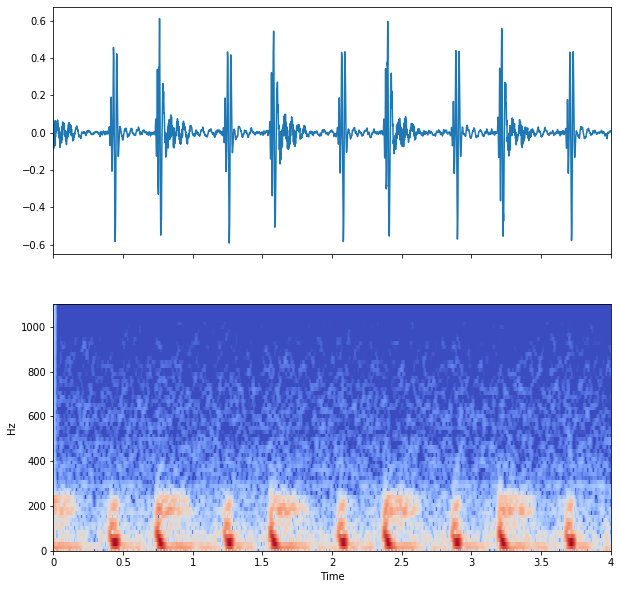

In [86]:
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert into decibels
spec_db = amplitude_to_db(spec)

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time, audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
plt.show();

Do you notice that the heartbeats come in pairs, as seen by the vertical lines in the spectrogram?

## Engineering spectral features

As you can probably tell, there is a lot more information in a spectrogram compared to a raw audio file. By computing the `spectral features`, you have a much better idea of what's going on. As such, there are all kinds of spectral features that you can compute using the spectrogram as a base. In this exercise, you'll look at a few of these features.

The spectogram `spec` from the previous exercise is available in your workspace.

- Calculate the spectral bandwidth as well as the spectral centroid of the spectrogram by using functions in librosa.feature.

In [87]:
import librosa as lr

# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

ParameterError: Spectral bandwidth is only defined with real-valued input

- Convert the spectrogram to decibels for visualization.
- Plot the spectrogram over time.

NameError: name 'times_spec' is not defined

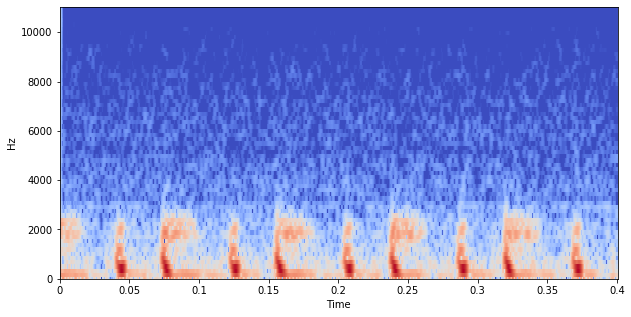

In [88]:
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Display these features on top of the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
ax = specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
ax.set(ylim=[None, 6000])
plt.show();

As you can see, the spectral centroid and bandwidth characterize the spectral content in each sound over time. They give us a summary of the spectral content that we can use in a classifier.

## Combining many features in a classifier

You've spent this lesson engineering many features from the audio data - some contain information about how the audio changes in time, others contain information about the spectral content that is present.

The beauty of machine learning is that it can handle all of these features at the same time. If there is different information present in each feature, it should improve the classifier's ability to distinguish the types of audio. Note that this often requires more advanced techniques such as regularization, which we'll cover in the next chapter.

For the final exercise in the chapter, we've loaded many of the features that you calculated before. Combine all of them into an array that can be fed into the classifier, and see how it does.

- Loop through each spectrogram, calculating the mean spectral bandwidth and centroid of each.

In [89]:
# Loop through each spectrogram
bandwidths = []
centroids = []

for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)  
    centroids.append(this_mean_centroid)

NameError: name 'spectrograms' is not defined

- Column stack all the features to create the array X.
- Score the classifier with cross-validation.

In [90]:
# Create X and y arrays
X = np.column_stack([means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths, centroids])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

NameError: name 'tempo_mean' is not defined

You calculated many different features of the audio, and combined each of them under the assumption that they provide independent information that can be used in classification. You may have noticed that the accuracy of your models varied a lot when using different set of features. This chapter was focused on creating new "features" from raw data and not obtaining the best accuracy. To improve the accuracy, you want to find the right features that provide relevant information and also build models on much larger data.

---
<a id='pred'></a>

## Predicting data over time

<img src="images/ts4_037.png" alt="" style="width: 800px;"/>

<img src="images/ts4_038.png" alt="" style="width: 800px;"/>

<img src="images/ts4_039.png" alt="" style="width: 800px;"/>

<img src="images/ts4_040.png" alt="" style="width: 800px;"/>

<img src="images/ts4_041.png" alt="" style="width: 800px;"/>

<img src="images/ts4_042.png" alt="" style="width: 800px;"/>

<img src="images/ts4_043.png" alt="" style="width: 800px;"/>

<img src="images/ts4_044.png" alt="" style="width: 800px;"/>

<img src="images/ts4_045.png" alt="" style="width: 800px;"/>

<img src="images/ts4_046.png" alt="" style="width: 800px;"/>

<img src="images/ts4_047.png" alt="" style="width: 800px;"/>

## Introducing the dataset

As mentioned in the video, you'll deal with stock market prices that fluctuate over time. In this exercise you've got historical prices from two tech companies (Ebay and Yahoo) in the DataFrame prices. You'll visualize the raw data for the two companies, then generate a scatter plot showing how the values for each company compare with one another. Finally, you'll add in a "time" dimension to your scatter plot so you can see how this relationship changes over time.

The data has been loaded into a DataFrame called `prices`.

- Plot the data in prices. Pay attention to any irregularities you notice.

In [91]:
prices = pd.read_csv(path+'prices2.csv',
                    index_col='date',
                    parse_dates=True
                   )
prices.head()

,EBAY,YHOO
date,,
2010-01-04,23.900000,17.100000
2010-01-05,23.650000,17.230000
2010-01-06,23.500000,17.170000
2010-01-07,23.229998,16.700001
2010-01-08,23.509999,16.700001


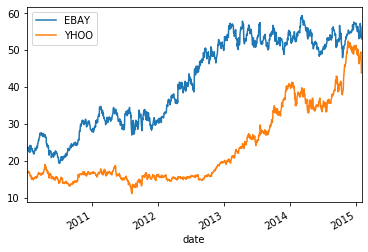

In [92]:
# Plot the raw values over time
prices.plot()
plt.show();

- Generate a scatter plot with the values of Ebay on the x-axis, and Yahoo on the y-axis. Look up the symbols for both companies from the column names of the DataFrame.

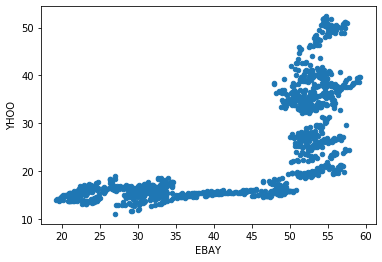

In [93]:
# Scatterplot with one company per axis
prices.plot.scatter('EBAY', 'YHOO')
plt.show();

- Finally, encode time as the color of each datapoint in order to visualize how the relationship between these two variables changes.

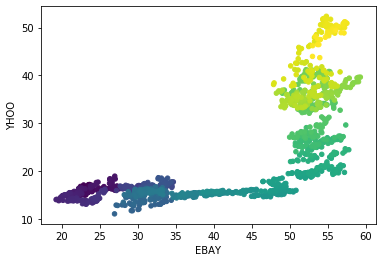

In [95]:
# Scatterplot with color relating to time
prices.plot.scatter('EBAY', 'YHOO', c=prices.index, 
                    cmap=plt.cm.viridis, colorbar=False)
plt.show();

As you can see, these two time series seem somewhat related to each other, though its a complex relationship that changes over time.

## Fitting a simple regression model

Now we'll look at a larger number of companies. Recall that we have historical price values for many companies. Let's use data from several companies to predict the value of a test company. **You'll attempt to predict the value of the Apple stock price using the values of NVidia, Ebay, and Yahoo**. Each of these is stored as a column in the `all_prices` DataFrame. Below is a mapping from company name to column name:

- ebay: "EBAY"
- nvidia: "NVDA"
- yahoo: "YHOO"
- apple: "AAPL"

We'll use these columns to define the input/output arrays in our model.

- Create the X and y arrays by using the column names provided.
- The input values should be from the companies "ebay", "nvidia", and "yahoo"
- The output values should be from the company "apple"
- Use the data to train and score the model with cross-validation.

In [96]:
all_prices = pd.read_csv(path+'all_prices.csv',
                    index_col='date',
                    parse_dates=True
                   )
all_prices.head()

,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,...,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,214.009998,54.459951,29.889999,14.30,16.650013,15.690000,9.01,3.40,28.090001,16.969999,...,46.939999,5.42,23.049999,28.580000,88.139999,33.279869,27.320000,69.150002,8.63,17.100000
2010-01-05,214.379993,54.019953,29.330000,14.19,16.130013,16.200001,9.04,3.53,28.970002,16.740000,...,48.070000,5.60,23.590000,28.440001,87.129997,33.339868,28.070000,69.419998,8.64,17.230000
2010-01-06,210.969995,54.319953,29.139999,14.16,16.970013,16.389999,9.16,3.64,28.650002,16.620001,...,47.599998,5.67,23.420000,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.170000
2010-01-07,210.580000,54.769952,28.580000,14.01,16.610014,16.930000,9.09,3.65,28.720002,16.969999,...,48.980000,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.60,16.700001
2010-01-08,211.980005,55.049952,29.340000,14.55,17.020014,16.780001,9.00,3.59,28.910002,16.920000,...,49.470001,6.18,23.280001,27.100000,87.000000,31.749874,28.860001,69.519997,8.57,16.700001


In [97]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = all_prices[['EBAY', 'NVDA', 'YHOO']]
y = all_prices[['AAPL']]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-6.09050633 -0.3179172  -3.72957284]


As you can see, fitting a model with raw data doesn't give great results.

## Visualizing predicted values

`When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model`.

In this exercise, after splitting the data (stored in the variables X and y) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.

- Split the data (X and y) into training and test sets.
- Use the training data to train the regression model.
- Then use the testing data to generate predictions for the model.

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.8, shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

-0.3380697256228964


- Plot a time series of the predicted and "actual" values of the testing data.

In [121]:
predictions = np.array([ 637.94588601,  624.86792695,  609.2618386 ,  626.22924286,
        611.34101817,  624.91284632,  616.33420161,  586.92283108,
        603.13745767,  589.95200417,  585.79890052,  582.82608087,
        575.08301358,  581.84237741,  564.09198267,  554.89950395,
        560.95870614,  571.90641843,  546.22555712,  557.4336095 ,
        579.10808407,  646.1990694 ,  664.1752718 ,  652.89126871,
        643.28703457,  634.47175879,  642.56751592,  665.05513312,
        674.85770975,  649.60692163,  640.92413717,  640.85936352,
        650.95440818,  653.61615889,  667.19370842,  654.1205163 ,
        639.67576511,  644.10261032,  670.3033987 ,  675.64078471,
        668.5894784 ,  680.0122503 ,  701.53224705,  693.10008902,
        682.49240609,  705.33142772,  704.27364644,  707.54345456,
        707.55861765,  708.57066266,  717.83281016,  703.02479436,
        721.36123075,  721.41595877,  715.07963357,  746.45684823,
        753.83317052,  741.91074045,  736.43161483,  726.21844739,
        740.87745156,  759.32404588,  772.70963014,  759.46958156,
        767.39499214,  762.73283956,  750.9613471 ,  745.07715751,
        725.11854154,  717.76975507,  743.36407842,  728.96318074,
        729.26239969,  731.07351457,  732.69477076,  745.9258994 ,
        735.06696148,  720.71077431,  691.21286515,  703.40030695,
        716.25136094,  724.43046093,  716.77326147,  728.22552984,
        726.24104223,  779.9309075 ,  769.65629479,  774.8329725 ,
        747.12108158,  740.25689881,  728.98195634,  750.74383408,
        726.20568895,  740.13213718,  728.41723562,  735.10686082,
        736.9328448 ,  718.94056908,  709.7537189 ,  709.94052036,
        703.8761062 ,  706.04633811,  683.28657158,  683.29319959,
        699.43610522,  704.86961191,  714.16613112,  717.55120181,
        722.62602727,  765.95785711,  758.90491815,  764.73853223,
        780.85837942,  794.51620801,  783.05871453,  775.71644498,
        777.63445497,  773.5580039 ,  768.79727553,  752.59200864,
        765.7925917 ,  765.60188095,  749.4362283 ,  733.00005796,
        751.35643032,  763.720742  ,  752.21383072,  766.94665322,
        757.04367193,  749.15156507,  733.65630627,  734.8216814 ,
        726.90390322,  744.81215049,  790.5606906 ,  771.45596736,
        774.3492302 ,  796.04928915,  778.79374126,  785.84016921,
        793.98368472,  804.5479041 ,  792.92490496,  780.25706587,
        781.21459007,  804.37415241,  806.86204151,  792.12108407,
        789.91119585,  821.34420965,  846.89754741,  834.92356618,
        837.5980012 ,  835.51859419,  844.93220778])

In [126]:
y_test = np.array([ 587.410027,  585.739975,  577.669991,  582.099998,  570.77002 ,
        572.030022,  574.499985,  569.04998 ,  584.000015,  592.519997,
        599.409981,  609.939995,  605.879982,  613.889992,  608.210022,
        604.430016,  598.900009,  604.970001,  606.910019,  606.93998 ,
        606.260017,  614.320015,  604.300026,  603.830002,  600.919975,
        574.970009,  574.88002 ,  585.159988,  595.030014,  610.759987,
        606.80999 ,  607.789986,  615.70002 ,  622.550003,  620.910019,
        619.860008,  620.729988,  621.699997,  630.      ,  631.690025,
        630.829979,  636.340012,  648.110001,  665.150017,  656.059982,
        668.869995,  662.630013,  663.219986,  675.679977,  674.800011,
        673.469994,  663.869987,  665.240005,  674.970001,  670.230026,
        676.270004,  680.43998 ,  662.739975,  660.590019,  669.790016,
        682.980011,  691.280014,  699.780022,  701.910004,  702.100021,
        698.699997,  700.089989,  690.790016,  673.540009,  665.179977,
        681.32    ,  667.100021,  659.389992,  661.309982,  671.449974,
        666.799988,  652.589996,  638.170013,  635.850014,  640.909996,
        628.099983,  629.710007,  634.760002,  649.789986,  644.610001,
        632.640007,  609.840019,  634.029999,  613.359993,  616.829979,
        609.539986,  603.999992,  595.320007,  596.540009,  576.800011,
        584.620003,  582.849976,  558.000008,  537.749985,  547.059998,
        542.829994,  542.900009,  536.880005,  525.619987,  527.680008,
        565.730011,  560.909981,  561.700012,  571.500023,  589.530022,
        584.780006,  582.940018,  589.359978,  585.279991,  586.190025,
        575.849976,  538.790009,  547.239975,  533.250015,  529.819977,
        541.390015,  539.      ,  529.689987,  509.789986,  518.829979,
        533.900017,  526.30999 ,  521.730019,  519.330017,  520.169983,
        512.999992,  515.060013,  509.589981,  532.169991,  549.029976,
        542.099991,  526.999992,  523.900002,  525.31002 ,  517.100006,
        523.509979,  520.300026,  501.750015,  485.920013,  506.089981,
        502.680023,  500.000015,  504.770004,  514.010002,  450.499977,
        439.880001,  449.830002,  458.269981,  456.830002,  455.489998])

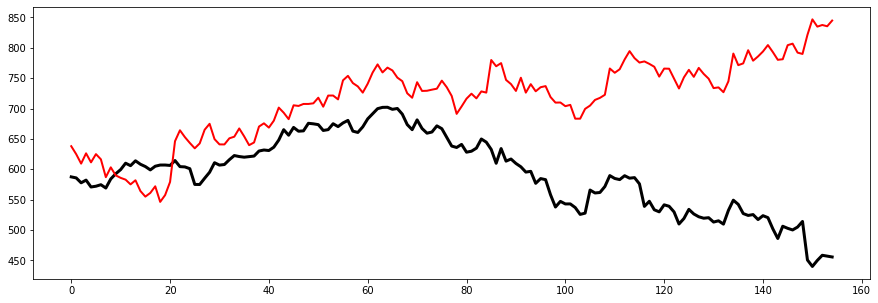

In [128]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show();

- Now you have an explanation for your poor score. The predictions clearly deviate from the true time series values.

## Cleaning and improving your data

<img src="images/ts4_048.png" alt="" style="width: 800px;"/>

<img src="images/ts4_049.png" alt="" style="width: 800px;"/>

<img src="images/ts4_050.png" alt="" style="width: 800px;"/>

<img src="images/ts4_051.png" alt="" style="width: 800px;"/>

<img src="images/ts4_052.png" alt="" style="width: 800px;"/>

<img src="images/ts4_053.png" alt="" style="width: 800px;"/>

<img src="images/ts4_054.png" alt="" style="width: 800px;"/>

<img src="images/ts4_055.png" alt="" style="width: 800px;"/>

<img src="images/ts4_056.png" alt="" style="width: 800px;"/>

<img src="images/ts4_057.png" alt="" style="width: 800px;"/>

<img src="images/ts4_058.png" alt="" style="width: 800px;"/>

<img src="images/ts4_059.png" alt="" style="width: 800px;"/>

<img src="images/ts4_060.png" alt="" style="width: 800px;"/>

<img src="images/ts4_061.png" alt="" style="width: 800px;"/>

## Visualizing messy data

Let's take a look at a new dataset - this one is a bit less-clean than what you've seen before.

As always, you'll first start by visualizing the raw data. Take a close look and try to find datapoints that could be problematic for fitting models.

The data has been loaded into a DataFrame called `prices`.

- Visualize the time series data using Pandas.
- Calculate the number of missing values in each time series. Note any irregularities that you can see. What do you think they are?

In [130]:
prices = pd.read_csv(path+'prices_dirty.csv',
                    index_col='date',
                    parse_dates=True
                   )
prices.head()

,EBAY,NVDA,YHOO
date,,,
2010-01-04,23.900000,18.490000,17.100000
2010-01-05,23.650000,18.760000,17.230000
2010-01-06,23.500000,18.879999,17.170000
2010-01-07,23.229998,18.510000,16.700001
2010-01-08,23.509999,18.549999,16.700001


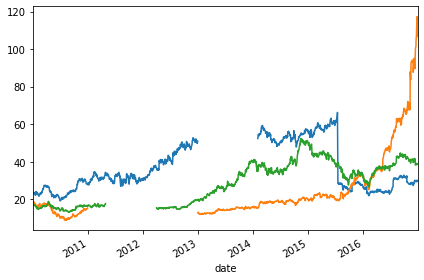

EBAY    273
NVDA    502
YHOO    232
dtype: int64


In [131]:
# Visualize the dataset
prices.plot(legend=False)
plt.tight_layout()
plt.show();

# Count the missing values of each time series
missing_values = prices.isna().sum()
print(missing_values)

In the plot, you can see there are clearly missing chunks of time in your data. There also seem to be a few 'jumps' in the data. How can you deal with this?

## Imputing missing values

When you have missing data points, how can you fill them in?

In this exercise, you'll practice using different `interpolation methods` to fill in some missing values, visualizing the result each time. But first, you will create the function (`interpolate_and_plot()`) you'll use to interpolate missing data points and plot them.

A single time series has been loaded into a DataFrame called `prices`.

- Create a boolean mask for missing values and interpolate the missing values using the interpolation argument of the function.

In [ ]:
prices = pd.read_csv(path+'prices_dirty.csv',
                    index_col='date',
                    parse_dates=True
                   )
prices.head()

In [132]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show();

- Interpolate using the latest non-missing value and plot the results.
- Recall that interpolate_and_plot's second input is a string specifying the kind of interpolation to use.

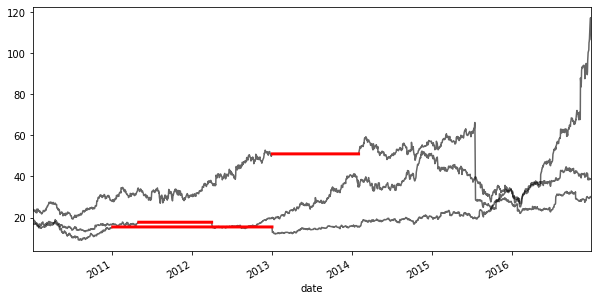

In [133]:
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

- Interpolate linearly and plot the results.

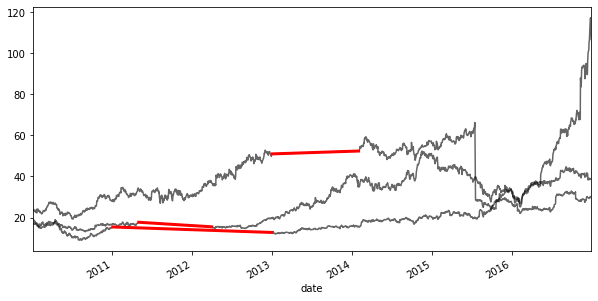

In [134]:
# Interpolate linearly
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type)

- Interpolate with a quadratic function and plot the results.

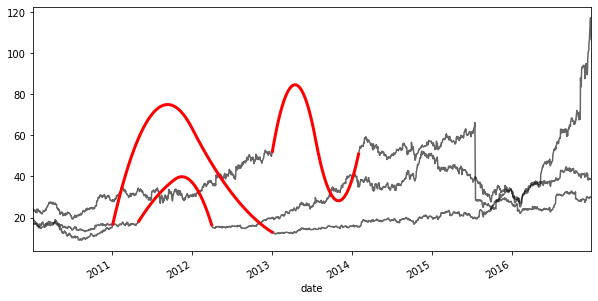

In [135]:
# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

When you interpolate, the pre-existing data is used to infer the values of missing data. As you can see, the method you use for this has a big effect on the outcome.

## Transforming raw data

In the last chapter, you calculated the rolling mean. In this exercise, you will define a function that calculates the `percent change of the latest data point from the mean of a window of previous data points`. This function will help you calculate the `percent change over a rolling window`.

This is a more stable kind of time series that is often useful in machine learning.

- Define a percent_change function that takes an input time series and does the following:
    - Extract all but the last value of the input series (assigned to previous_values) and the only the last value of the timeseries ( assigned to last_value)
    - Calculate the percentage difference between the last value and the mean of earlier values.
- Using a rolling window of 20, apply this function to prices, and visualize it using the given code.

/Users/ksatola/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if sys.path[0] == '':


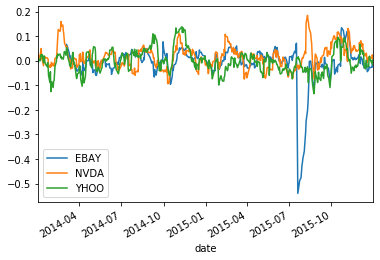

In [136]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.show();

You've converted the data so it's easier to compare one time point to another. This is a cleaner representation of the data.

## Handling outliers

In this exercise, you'll handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers. First you will write a function that replaces outlier data points with the median value from the entire time series.

- Define a function that takes an input series and does the following:
    - Calculates the absolute value of each datapoint's distance from the series mean, then creates a boolean mask for datapoints that are three times the standard deviation from the mean.
    - Use this boolean mask to replace the outliers with the median of the entire series.
- Apply this function to your data and visualize the results using the given code.

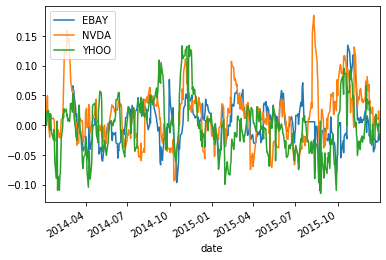

In [137]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show();

Since you've converted the data to % change over time, it was easier to spot and correct the outliers.

In [129]:
<img src="images/ts4_062.png" alt="" style="width: 800px;"/>

SyntaxError: invalid syntax (<ipython-input-129-c1aa6606de1a>, line 1)

In [ ]:
---
<a id='intro'></a>